<a href="https://colab.research.google.com/github/cheng0908/Covid19_Predection_DualLSTM/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import datasets

In [ ]:
# root_dir = '/content/drive/MyDrive/Final_report_dataset'
root_dir = '/content/drive/MyDrive/深度學習--上課/datasets'
overall_dir = os.path.join(root_dir, 'covid_19_data.csv')
confirmed_dir = os.path.join(root_dir, 'time_series_covid_19_confirmed.csv')
deaths_dir = os.path.join(root_dir, 'time_series_covid_19_deaths.csv')
recovered_dir = os.path.join(root_dir, 'time_series_covid_19_recovered.csv')

In [ ]:
overall_df = pd.read_csv(overall_dir)
confirmed_df = pd.read_csv(confirmed_dir)
deaths_df = pd.read_csv(deaths_dir)
recovered_df = pd.read_csv(recovered_dir)

In [ ]:
#overall
print(overall_df.info())
print("\nNull count")
print(overall_df.isnull().sum())
print()
overall_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB
None

Null count
SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64



SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0    1      01/22/2020          Anhui  ...       1.0    0.0        0.0
1    2      01/22/2020        Beijing  ...      14.0    0.0        0.0
2    3      01/22/2020      Chongqing  ...       6.0    0.0        0.0
3    4      01/22/2020         Fujian  ...       1.0    0.0        0.0
4    5      01/22/2020          Gansu  ...       0.0    0.0        0.0

[5 rows x 8 columns]

In [ ]:
#confirmed
print(confirmed_df.info())
print("\nNull count")
print(confirmed_df.isnull().sum())
print()
confirmed_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
None

Null count
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64



Province/State Country/Region       Lat  ...  5/27/21  5/28/21  5/29/21
0            NaN    Afghanistan  33.93911  ...    68366    69130    70111
1            NaN        Albania  41.15330  ...   132264   132285   132297
2            NaN        Algeria  28.03390  ...   127926   128198   128456
3            NaN        Andorra  42.50630  ...    13682    13693    13693
4            NaN         Angola -11.20270  ...    33607    33944    34180

[5 rows x 498 columns]

In [ ]:
#death
print(deaths_df.info())
print("\nNull count")
print(deaths_df.isnull().sum())
print()
deaths_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
None

Null count
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64



Province/State Country/Region       Lat  ...  5/27/21  5/28/21  5/29/21
0            NaN    Afghanistan  33.93911  ...     2869     2881     2899
1            NaN        Albania  41.15330  ...     2447     2448     2449
2            NaN        Algeria  28.03390  ...     3448     3455     3460
3            NaN        Andorra  42.50630  ...      127      127      127
4            NaN         Angola -11.20270  ...      745      749      757

[5 rows x 498 columns]

In [ ]:
#recovered
print(recovered_df.info())
print("\nNull count")
print(recovered_df.isnull().sum())
print()
recovered_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1015.6+ KB
None

Null count
Province/State    191
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64



Province/State Country/Region       Lat  ...  5/27/21  5/28/21  5/29/21
0            NaN    Afghanistan  33.93911  ...    56962    57119    57281
1            NaN        Albania  41.15330  ...   129042   129097   129215
2            NaN        Algeria  28.03390  ...    89040    89232    89419
3            NaN        Andorra  42.50630  ...    13405    13416    13416
4            NaN         Angola -11.20270  ...    27529    27577    27646

[5 rows x 498 columns]

Choose Country

In [ ]:
print("All Country:")
print(overall_df['Country/Region'].unique())
print("\nCount of country datasets")
print(overall_df['Country/Region'].value_counts())

All Country:
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'China' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal'
 'Canada' 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe Islands'
 'Gibraltar' 

#Data Preprocessing With Russia Dataset

### We choose russia as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="Russia"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0         501      01/31/2020  ...     0.0       0.0
1         561      02/01/2020  ...     0.0       0.0
2         633      02/02/2020  ...     0.0       0.0
3         702      02/03/2020  ...     0.0       0.0
4         772      02/04/2020  ...     0.0       0.0
...       ...             ...  ...     ...       ...
30246  306399      05/29/2021  ...  1092.0   42907.0
30247  306401      05/29/2021  ...  2910.0   80119.0
30248  306416      05/29/2021  ...   419.0   37848.0
30249  306418      05/29/2021  ...   605.0   38968.0
30250  306422      05/29/2021  ...   669.0   41650.0

[30251 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                             NaN  ...        0.0     2.0
1          02/01/2020                             NaN  ...        0.0     2.0
2          02/02/2020                             NaN  ...        0.0     2.0
3          02/03/2020                             NaN  ...        0.0     2.0
4          02/04/2020                             NaN  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30129 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate      0
Province/State     122
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30251 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                         unknown  ...        0.0     2.0
1          02/01/2020                         unknown  ...        0.0     2.0
2          02/02/2020                         unknown  ...        0.0     2.0
3          02/03/2020                         unknown  ...        0.0     2.0
4          02/04/2020                         unknown  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed             ...           Active        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
01/01/2021              11103.0    33124.0  ...           1717.0     NaN
01/02/2021              11184.0    33334.0  ...           1847.0     NaN
01/03/2021              11261.0    33542.0  ...           1781.0     NaN
01/04/2021              11341.0    33748.0  ...           1733.0     NaN
01/05/2021              11420.0    33957.0  ...           1723.0     NaN
...                         ...        ...  ...              ...     ...
12/27/2020              10676.0    32062.0  ...           1797.0     NaN
12/28/2020              10767.0    32276.0  ...           1873.0     NaN
12/29/2020              10856.0    32488.0  ...           1844.0     NaN
12/30/2020              10945.0    32699.0  ...           1713.0     NaN
12/31/2020              11025.0    32912.0  ...           1604.0     NaN

[485 rows x 336 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 01/01/2021 to 12/31/2020
Columns: 336 entries, ('Confirmed', 'Adygea Republic') to ('Active', 'unknown')
dtypes: float64(336)
memory usage: 1.2+ MB
None


In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

485 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered    Active
0        01/01/2021  3153960.0  56798.0  2553467.0  543695.0
1        01/02/2021  3179898.0  57235.0  2572279.0  550384.0
2        01/03/2021  3203743.0  57730.0  2591937.0  554076.0
3        01/04/2021  3226758.0  58203.0  2612934.0  555621.0
4        01/05/2021  3250713.0  58706.0  2635242.0  556765.0
..              ...        ...      ...        ...       ...
480      12/27/2020  3019972.0  54080.0  2426094.0  539798.0
481      12/28/2020  3047335.0  54559.0  2446412.0  546364.0
482      12/29/2020  3073923.0  55107.0  2470783.0  548033.0
483      12/30/2020  3100018.0  55692.0  2499465.0  544861.0
484      12/31/2020  3127347.0  56271.0  2527722.0  543354.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4960174.0  117197.0  4579421.0  263556.0
481      2021-05-26  4968421.0  117595.0  4588421.0  262405.0
482      2021-05-27  4977332.0  117990.0  4598014.0  261328.0
483      2021-05-28  4986458.0  118386.0  4607276.0  260796.0
484      2021-05-29  4995613.0  118781.0  4616422.0  260410.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4960174.0  117197.0  4579421.0  263556.0
481      2021-05-26  4968421.0  117595.0  4588421.0  262405.0
482      2021-05-27  4977332.0  117990.0  4598014.0  261328.0
483      2021-05-28  4986458.0  118386.0  4607276.0  260796.0
484      2021-05-29  4995613.0  118781.0  4616422.0  260410.0

[485 rows x 5 columns]

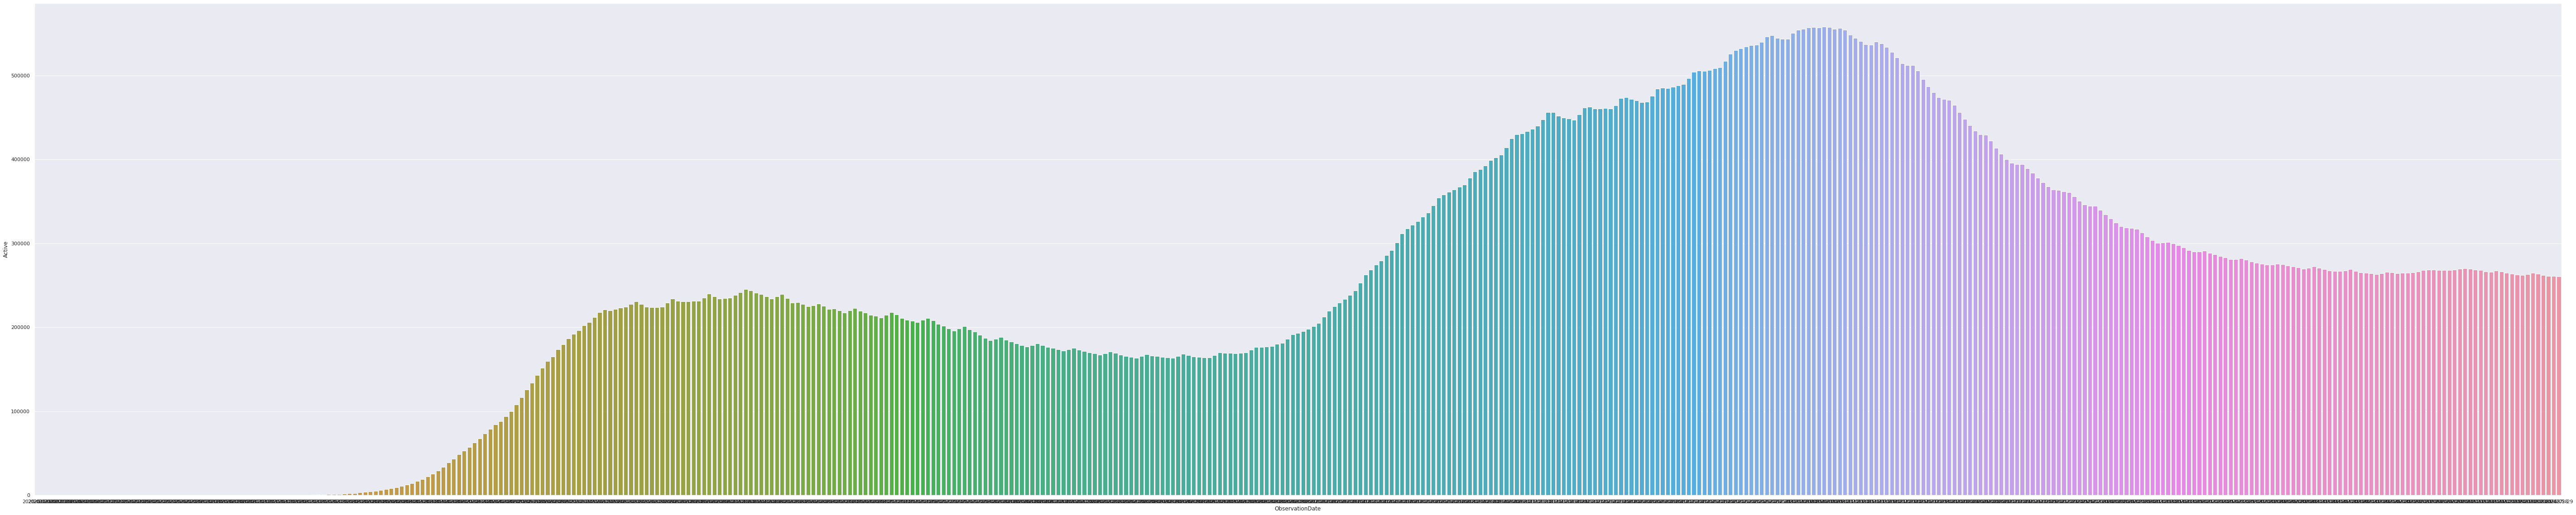

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered  Next_Day_Active
0        2020-01-31        2.0       0.0        0.0              2.0
1        2020-02-01        2.0       0.0        0.0              2.0
2        2020-02-02        2.0       0.0        0.0              2.0
3        2020-02-03        2.0       0.0        0.0              2.0
4        2020-02-04        2.0       0.0        0.0              2.0
..              ...        ...       ...        ...              ...
479      2021-05-24  4952412.0  116812.0  4570842.0         263556.0
480      2021-05-25  4960174.0  117197.0  4579421.0         262405.0
481      2021-05-26  4968421.0  117595.0  4588421.0         261328.0
482      2021-05-27  4977332.0  117990.0  4598014.0         260796.0
483      2021-05-28  4986458.0  118386.0  4607276.0         260410.0

[484 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       [-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       [-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       ...,
       [ 1.76415887,  2.09968277,  1.85747044,  0.06494239],
       [ 1.76930278,  2.11006308,  1.8634816 ,  0.06160025],
       [ 1.7745708 ,  2.12046967,  1.86928536,  0.05917531]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(484, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (470, 14, 4).
trainY shape == (470, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape) #47，10， 14， 4

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(37, 10)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])
9 torch.Size([10, 14, 4])
9 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768]],

        [[-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-

#Design a LSTM model

In [ ]:
input_size = 4
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class LSTMNetwork(nn.Module):
  """
  input_size = 4
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork, self).__init__()  #繼承
    # self.lstm = nn.Sequential(
    #     nn.LSTM(input_size=input_size, hidden_size=input_size, num_layers=1, batch_first=True),
    #     nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True),
    #     nn.Dropout(0.2),
    #     nn.Linear(in_features=hidden_size, out_features=num_class)
    # )
    self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)  #(1, 14, 4)> (1, 14, 64)
    self.fc1 = nn.Linear(in_features=hidden_size, out_features=hidden_size//2) # (1, 14, 64) > (1, 14, 32)
    self.lstm2 = nn.LSTM(input_size=hidden_size//2, hidden_size=hidden_size//2, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #（1*14*32， 1）
    self.fc2 = nn.Linear(in_features=1*14*32, out_features=num_class) #（1*14*32， 1） > (1,1)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2,device=x.device))
    c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2, device=x.device))
    out, (h, c) = self.lstm1(x, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    out = self.fc1(out)
    # print("fc1", out.shape)
    out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model = LSTMNetwork(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model

LSTMNetwork(
  (lstm1): LSTM(4, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (lstm2): LSTM(32, 32, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=448, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model.parameters(), lr=0.001)

#Train Model Base On Russia Datasets

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])


In [ ]:
feature_tensor=[]
labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  feature_tensor.append(segs_tensor)
  labels_tensor.append(lab_tensor)

In [ ]:
print(feature_tensor[0].shape)
print(labels_tensor[0].shape)
print(len(feature_tensor))

torch.Size([10, 14, 4])
torch.Size([10, 1, 1])
38


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:500, Batch:1, Loss:0.0871
Epoch:500, Batch:4, Loss:0.0338
Epoch:500, Batch:7, Loss:0.0288
Epoch:500, Batch:10, Loss:0.0498
Epoch:500, Batch:13, Loss:0.0285
Epoch:500, Batch:16, Loss:0.0083
Epoch:500, Batch:19, Loss:0.0010
Epoch:500, Batch:22, Loss:0.0011
Epoch:500, Batch:25, Loss:0.0309
Epoch:500, Batch:28, Loss:0.0097
Epoch:500, Batch:31, Loss:0.0097
Epoch:500, Batch:34, Loss:0.0123
Epoch:500, Batch:37, Loss:0.0151
Epoch:1000, Batch:1, Loss:0.0111
Epoch:1000, Batch:4, Loss:0.0031
Epoch:1000, Batch:7, Loss:0.0151
Epoch:1000, Batch:10, Loss:0.0224
Epoch:1000, Batch:13, Loss:0.0080
Epoch:1000, Batch:16, Loss:0.0022
Epoch:1000, Batch:19, Loss:0.0006
Epoch:1000, Batch:22, Loss:0.0029
Epoch:1000, Batch:25, Loss:0.0394
Epoch:1000, Batch:28, Loss:0.0123
Epoch:1000, Batch:31, Loss:0.0191
Epoch:1000, Batch:34, Loss:0.0172
Epoch:1000, Batch:37, Loss:0.0193
Epoch:1500, Batch:1, Loss:0.0251
Epoch:1500, Batch:4, Loss:0.0088
Epoch:1500, Batch:7, Loss:0.0189
Epoch:1500, Batch:10, Loss:0.0099
Ep

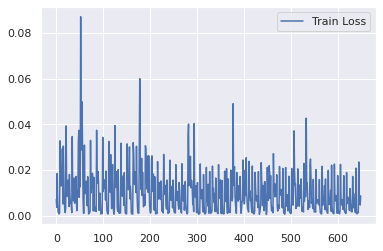

In [ ]:
train_loss =[]
# train_data_X_tensor = torch.tensor(train_data_X)
# train_data_Y_tensor = torch.tensor(train_data_y)
# print(train_data_X_tensor.shape)
num_epoch = 5000
size = int(len(feature_tensor)/10)

for epoch in range(num_epoch):
  for i in range(len(feature_tensor)):
    # segs = np.array(train_data_X[i]).astype("float32").reshape(14, 3, 1)
    # labels = np.array(train_data_y[i]).astype("float32").reshape(1, 1, 1)
    # segs_tensor = torch.tensor(segs)
    # labels_tensor = torch.tensor(labels)
    optimizer.zero_grad()
    # print(segs_tensor.shape)
    temp_feature = Variable(feature_tensor[i])
    # temp_feature = temp_feature.to(device)
    outputs = lstm_model(temp_feature)
    # outputs = lstm_model(Variable(feature_tensor[i]))
    # temp_label = Variable(labels_tensor[i]).to(device)
    temp_label = Variable(labels_tensor[i])
    loss = loss_fn(outputs, Variable(temp_label))
    # loss = loss_fn(outputs, Variable(labels_tensor[i]))
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epoch/10)== 0 and i%size==0:
    # if (epoch+1)%(num_epoch/10)== 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    # if (epoch+1)%(num_epoch/10)== 0:
    if (epoch+1)%100 == 0 and i%size==0:
      loss_data_temp = loss.data
      loss_data_temp = loss_data_temp.cpu()
      train_loss.append(loss_data_temp.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

#Test result(Russia)

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

# for i in range(len(train_data_X)):
#   try:
#     segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
#     labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
#   except Exception as e:
#     print(i)
#     print(e)
#   segs_tensor = torch.tensor(segs)
#   segs_tensor = segs_tensor.to(device)
#   # segs_tensor = segs_tensor.cuda()
#   lab_tensor = torch.tensor(labels)
#   lab_tensor = lab_tensor.to(device)
#   test_feature_tensor.append(segs_tensor)
#   test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

9 torch.Size([10, 14, 4])
9 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
print(len(prediction))
print(russia_datasets_overall_forDemo.shape[1])

90
5


In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   0.623913  0.588264
1   0.622624  0.558568
2   0.545321  0.524494
3   0.562242  0.492706
4   0.479793  0.462124
..       ...       ...
85  0.022831  0.078939
86  0.030256  0.071708
87  0.031098  0.064942
88  0.015115  0.061600
89  0.015849  0.059175

[90 rows x 2 columns]

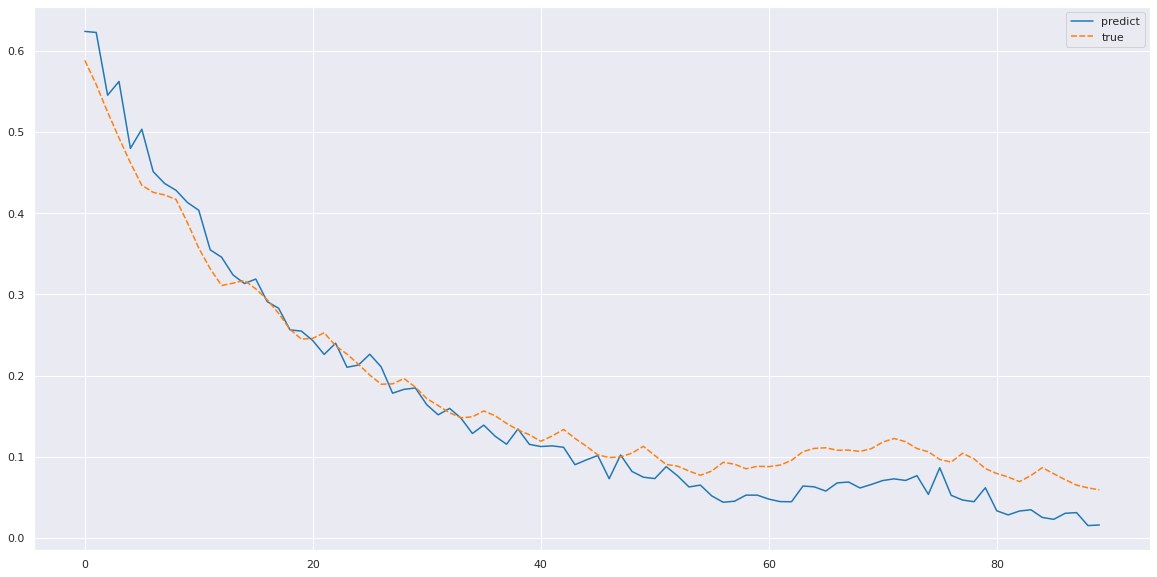

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['temp1'] = pd.DataFrame(prediction)[:][0]
temp_plot['temp2'] = pd.DataFrame(prediction)[:][0]
temp_plot['temp3'] = pd.DataFrame(prediction)[:][0]
temp_plot_pred = temp_plot
#====================================================#
temp_plot = pd.DataFrame()
temp_plot['true label'] = pd.DataFrame(true_label)[:][0]
temp_plot['temp1'] = pd.DataFrame(true_label)[:][0]
temp_plot['temp2'] = pd.DataFrame(true_label)[:][0]
temp_plot['temp3'] = pd.DataFrame(true_label)[:][0]
temp_plot_truelabel = temp_plot
print(temp_plot_pred)
print(temp_plot_truelabel)

     predict     temp1     temp2     temp3
0   0.623913  0.623913  0.623913  0.623913
1   0.622624  0.622624  0.622624  0.622624
2   0.545321  0.545321  0.545321  0.545321
3   0.562242  0.562242  0.562242  0.562242
4   0.479793  0.479793  0.479793  0.479793
..       ...       ...       ...       ...
85  0.022831  0.022831  0.022831  0.022831
86  0.030256  0.030256  0.030256  0.030256
87  0.031098  0.031098  0.031098  0.031098
88  0.015115  0.015115  0.015115  0.015115
89  0.015849  0.015849  0.015849  0.015849

[90 rows x 4 columns]
    true label     temp1     temp2     temp3
0     0.588264  0.588264  0.588264  0.588264
1     0.558568  0.558568  0.558568  0.558568
2     0.524494  0.524494  0.524494  0.524494
3     0.492706  0.492706  0.492706  0.492706
4     0.462124  0.462124  0.462124  0.462124
..         ...       ...       ...       ...
85    0.078939  0.078939  0.078939  0.078939
86    0.071708  0.071708  0.071708  0.071708
87    0.064942  0.064942  0.064942  0.064942
88    0.061

In [ ]:
inverse_scaled = scaler.inverse_transform(temp_plot_pred)
inverse_scaled_prediction = inverse_scaled.astype("int")[:,-1]
inverse_scaled = scaler.inverse_transform(temp_plot_truelabel)
inverse_scaled_truelabel = inverse_scaled.astype("int")[:,-1]

print(inverse_scaled_prediction)
print(inverse_scaled_truelabel)

temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(inverse_scaled_prediction)[:][0]
temp_plot['true'] = pd.DataFrame(inverse_scaled_truelabel)[:][0]
temp_plot

[350304 350099 337794 340487 327363 331122 322805 320485 319148 316768
 315218 307478 306024 302555 300867 301741 297321 296015 291775 291533
 289673 286962 289159 284445 284875 287001 284510 279358 280110 280382
 277090 275117 276373 274472 271456 273100 270913 269349 272344 269321
 268900 269033 268753 265337 266278 267130 262591 267247 264017 262885
 262613 264953 263161 260971 261338 259221 257972 258176 259368 259366
 258588 258098 258075 261155 260992 260163 261763 261941 260771 261466
 262229 262561 262247 263185 259519 264736 259339 258409 258079 260821
 256302 255491 256256 256499 254990 254624 255806 255940 253396 253513]
[344629 339903 334478 329418 324550 320131 318748 318233 317363 312818
 307802 303772 300483 300931 301470 299811 297691 295004 291881 289955
 290113 291208 288648 287036 285035 282916 281117 281188 282240 280534
 278305 276927 275528 274542 274722 275882 274928 273436 272166 271217
 269930 270966 272257 270496 268959 267270 266748 266851 267612 268938
 2671

predict    true
0    350304  344629
1    350099  339903
2    337794  334478
3    340487  329418
4    327363  324550
..      ...     ...
85   254624  263556
86   255806  262404
87   255940  261328
88   253396  260796
89   253513  260409

[90 rows x 2 columns]

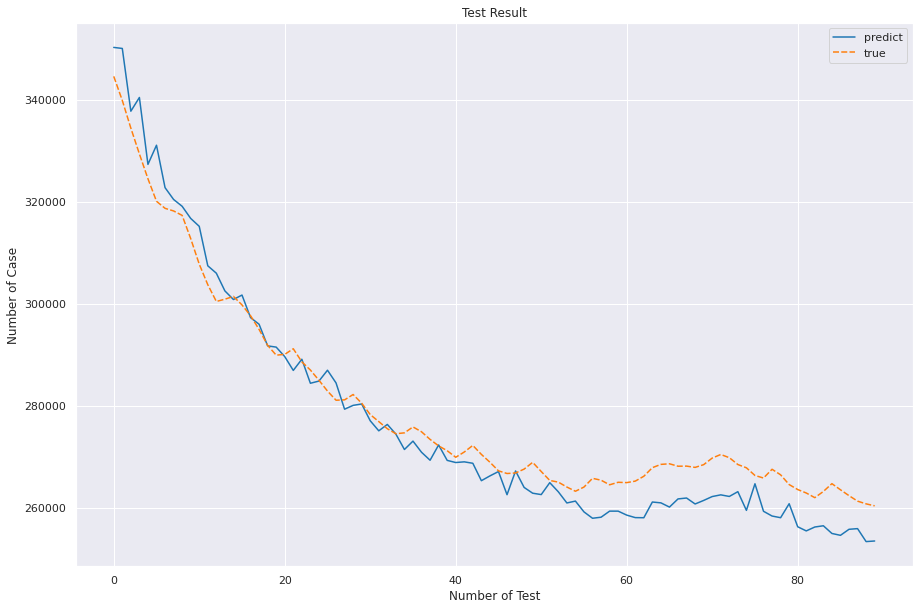

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plt.title('Test Result')
plt.ylabel('Number of Case')
plt.xlabel('Number of Test')
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict    true  difference
0    350304  344629        5675
1    350099  339903       10196
2    337794  334478        3316
3    340487  329418       11069
4    327363  324550        2813
..      ...     ...         ...
85   254624  263556        8932
86   255806  262404        6598
87   255940  261328        5388
88   253396  260796        7400
89   253513  260409        6896

[90 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

             predict           true    difference
count      90.000000      90.000000     90.000000
mean   277101.955556  279592.022222   4452.688889
std     24284.933647   20237.180879   2956.079238
min    253396.000000  260409.000000     70.000000
25%    260315.000000  265947.000000   1896.250000
50%    266704.000000  269890.500000   4086.000000
75%    286991.250000  288245.000000   6986.750000
max    350304.000000  344629.000000  11069.000000


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

400742.0
4452.688888888889


In [ ]:
# plt.figure(figsize=(10,5))
# sns.lineplot(data=trainY, palette="tab10")
# plt.show()

In [ ]:
# for i in range (len(temp_plot)):
#   temp_value = temp_plot['true'][i]
#   temp_plot['true'][i] = temp_value * 10

In [ ]:
# # temp_plot['true'] = temp_plot['true']*1.5
# sns.set_theme(style="darkgrid")
# plt.figure(figsize=(10,5))
# sns.lineplot(data=temp_plot, palette="tab10")
# plt.show()

# Save model

In [ ]:
filename = 'lstm_model_v1.8(10000)'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
torch.save(lstm_model.state_dict(), path1)
torch.save(lstm_model, path2)

In [ ]:
# filename = input()
# path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
# torch.save(lstm_model.state_dict(), path1)
# torch.save(lstm_model, path2)

lstm_model_v1.6


# Load Model

In [ ]:
filename = input()

# path1 = '/content/drive/MyDrive/Final_report_dataset/' + filename +'_a.pkl' #ievan
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl' #dexu
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))
# lstm_model = torch.load("lstm_model_v1b.pkl")

lstm_model_v1.6


<All keys matched successfully>

#Test result wit UK data (using lstm_model V1.6)

In [ ]:
country = 'UK'

In [ ]:
model_name = 'lstm_model_v1.6'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Data Preprocessing

### We choose UK as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="UK"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0        500      01/31/2020  ...     0.0       0.0
1        562      02/01/2020  ...     0.0       0.0
2        634      02/02/2020  ...     0.0       0.0
3        703      02/03/2020  ...     0.0       0.0
4        773      02/04/2020  ...     0.0       0.0
...      ...             ...  ...     ...       ...
6669  306281      05/29/2021  ...     0.0       4.0
6670  306298      05/29/2021  ...  7668.0       0.0
6671  306355      05/29/2021  ...    17.0    2381.0
6672  306374      05/29/2021  ...     0.0       0.0
6673  306403      05/29/2021  ...  5569.0       0.0

[6674 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate  ...    Active
0         01/31/2020  ...       2.0
1         02/01/2020  ...       2.0
2         02/02/2020  ...       2.0
3         02/03/2020  ...       2.0
4         02/04/2020  ...       2.0
...              ...  ...       ...
6669      05/29/2021  ...       0.0
6670      05/29/2021  ...  227227.0
6671      05/29/2021  ...      14.0
6672      05/29/2021  ...       0.0
6673      05/29/2021  ...  207103.0

[6674 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  6674 non-null   object 
 1   Province/State   6553 non-null   object 
 2   Confirmed        6674 non-null   float64
 3   Deaths           6674 non-null   float64
 4   Recovered        6674 non-null   float64
 5   Active           6674 non-null   float64
dtypes: float64(4), object(2)
memory usage: 313.0+ KB
None
ObservationDate      0
Province/State     121
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6674 entries, 0 to 6673
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  6674 non-null   object 
 1   Province/State   6674 non-null   object 
 2   Confirmed        6674 non-null   float64
 3   Deaths           6674 non-null   float64
 4   Recovered        6674 non-null   float64
 5   Active           6674 non-null   float64
dtypes: float64(4), object(2)
memory usage: 313.0+ KB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed          ...    Active        
Province/State   Anguilla Bermuda  ...     Wales unknown
ObservationDate                    ...                  
01/01/2021           13.0   604.0  ...  145043.0     NaN
01/02/2021           13.0   622.0  ...  147736.0     NaN
01/03/2021           15.0   622.0  ...  151691.0     NaN
01/04/2021           15.0   624.0  ...  153564.0     NaN
01/05/2021           15.0   632.0  ...  155616.0     NaN
...                   ...     ...  ...       ...     ...
12/27/2020           12.0   581.0  ...  136274.0     NaN
12/28/2020           13.0   581.0  ...  138532.0     NaN
12/29/2020           13.0   595.0  ...  141009.0     NaN
12/30/2020           13.0   595.0  ...  143277.0     NaN
12/31/2020           13.0   604.0  ...  145043.0     NaN

[485 rows x 80 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 01/01/2021 to 12/31/2020
Data columns (total 80 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   (Confirmed, Anguilla)                                      428 non-null    float64
 1   (Confirmed, Bermuda)                                       437 non-null    float64
 2   (Confirmed, British Virgin Islands)                        428 non-null    float64
 3   (Confirmed, Cayman Islands)                                440 non-null    float64
 4   (Confirmed, Channel Islands)                               445 non-null    float64
 5   (Confirmed, England)                                       353 non-null    float64
 6   (Confirmed, Falkland Islands (Islas Malvinas))             3 non-null      float64
 7   (Confirmed, Falkland Islands (Malvinas))                   418 non-null    float64
 8  

In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

485 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered     Active
0        01/01/2021  2549693.0  74237.0     5682.0  2469774.0
1        01/02/2021  2607546.0  74682.0     5747.0  2527117.0
2        01/03/2021  2662703.0  75137.0     6097.0  2581469.0
3        01/04/2021  2721626.0  75547.0     6263.0  2639816.0
4        01/05/2021  2782713.0  76428.0     6386.0  2699899.0
..              ...        ...      ...        ...        ...
480      12/27/2020  2295232.0  70860.0     5096.0  2219276.0
481      12/28/2020  2336692.0  71217.0     5105.0  2260370.0
482      12/29/2020  2389967.0  71675.0     5297.0  2312995.0
483      12/30/2020  2440206.0  72657.0     5417.0  2362132.0
484      12/31/2020  2496235.0  73622.0     5482.0  2417131.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed    Deaths  Recovered     Active
0        2020-01-31        2.0       0.0        0.0        2.0
1        2020-02-01        2.0       0.0        0.0        2.0
2        2020-02-02        2.0       0.0        0.0        2.0
3        2020-02-03        2.0       0.0        0.0        2.0
4        2020-02-04        2.0       0.0        0.0        2.0
..              ...        ...       ...        ...        ...
480      2021-05-25  4483177.0  128001.0    15453.0  4339723.0
481      2021-05-26  4486168.0  128010.0    15477.0  4342681.0
482      2021-05-27  4489552.0  128020.0    15480.0  4346052.0
483      2021-05-28  4493582.0  128030.0    15480.0  4350072.0
484      2021-05-29  4496823.0  128037.0    15481.0  4353305.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered     Active
0        2020-01-31        2.0       0.0        0.0        2.0
1        2020-02-01        2.0       0.0        0.0        2.0
2        2020-02-02        2.0       0.0        0.0        2.0
3        2020-02-03        2.0       0.0        0.0        2.0
4        2020-02-04        2.0       0.0        0.0        2.0
..              ...        ...       ...        ...        ...
480      2021-05-25  4483177.0  128001.0    15453.0  4339723.0
481      2021-05-26  4486168.0  128010.0    15477.0  4342681.0
482      2021-05-27  4489552.0  128020.0    15480.0  4346052.0
483      2021-05-28  4493582.0  128030.0    15480.0  4350072.0
484      2021-05-29  4496823.0  128037.0    15481.0  4353305.0

[485 rows x 5 columns]

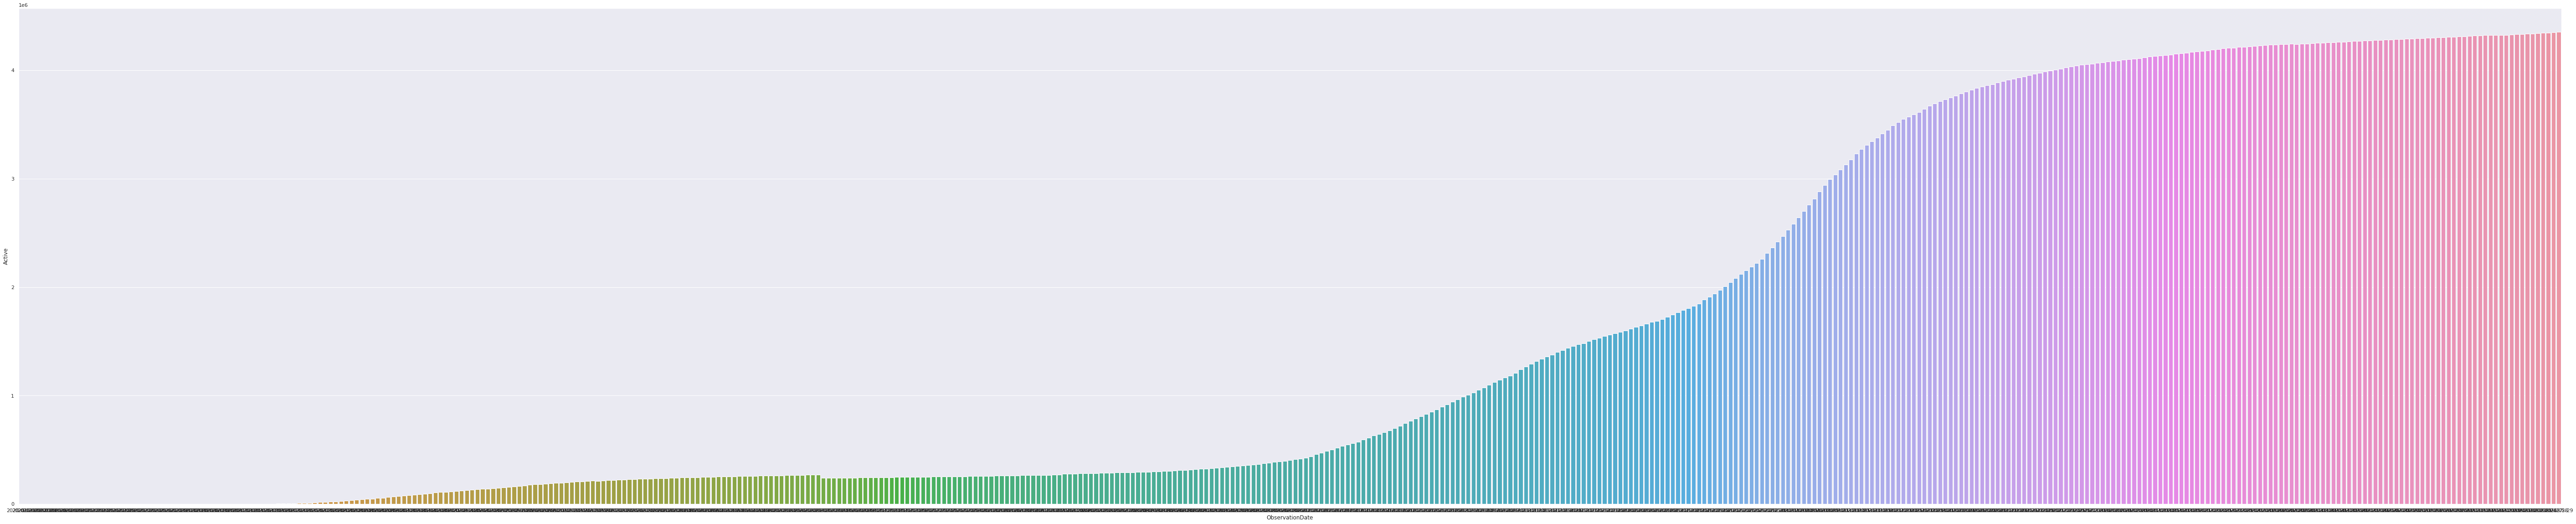

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered  Next_Day_Active
0        2020-01-31        2.0       0.0        0.0              2.0
1        2020-02-01        2.0       0.0        0.0              2.0
2        2020-02-02        2.0       0.0        0.0              2.0
3        2020-02-03        2.0       0.0        0.0              2.0
4        2020-02-04        2.0       0.0        0.0              2.0
..              ...        ...       ...        ...              ...
479      2021-05-24  4480760.0  127986.0    15445.0        4339723.0
480      2021-05-25  4483177.0  128001.0    15453.0        4342681.0
481      2021-05-26  4486168.0  128010.0    15477.0        4346052.0
482      2021-05-27  4489552.0  128020.0    15480.0        4350072.0
483      2021-05-28  4493582.0  128030.0    15480.0        4353305.0

[484 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-0.92624575, -1.41269258, -0.94201766, -0.91655111],
       [-0.92624575, -1.41269258, -0.94201766, -0.91655111],
       [-0.92624575, -1.41269258, -0.94201766, -0.91655111],
       ...,
       [ 1.65449365,  1.60087745,  2.10999454,  1.64621665],
       [ 1.65644035,  1.60111287,  2.11058613,  1.64858715],
       [ 1.65875867,  1.60134828,  2.11058613,  1.65049358]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(484, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (470, 14, 4).
trainY shape == (470, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(37, 10)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])
9 torch.Size([10, 14, 4])
9 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9165],
         [-0.9262, -1.4127, -0.9420, -0.9165],
         [-0.9262, -1.4127, -0.9420, -0.9165],
         [-0.9262, -1.4127, -0.9418, -0.9165],
         [-0.9262, -1.4127, -0.9418, -0.9165]],

        [[-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-0.9262, -1.4127, -0.9420, -0.9166],
         [-

## Testing With UK Datasets

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -0.989202 -0.916548
1   -0.908315 -0.916552
2   -0.928762 -0.916552
3   -0.996515 -0.916552
4   -0.915165 -0.916552
..        ...       ...
465  1.491132  1.642485
466  1.282048  1.644229
467  1.343293  1.646217
468  1.335421  1.648587
469  1.377082  1.650494

[470 rows x 2 columns]

##Result

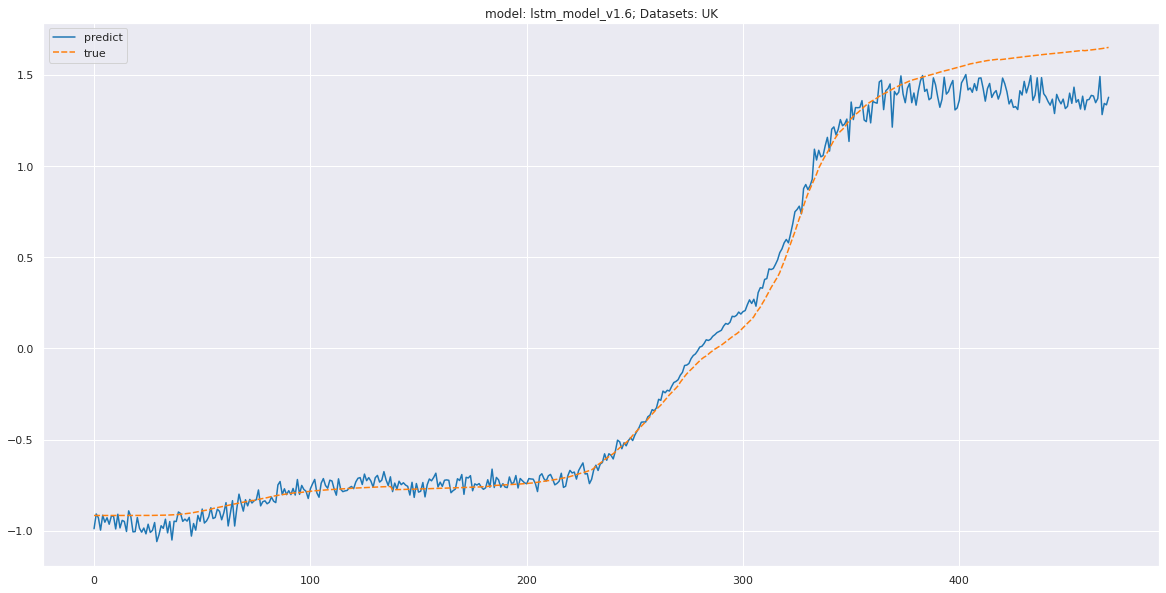

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.title(f"model: {model_name}; Datasets: {country}")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -0.989202 -0.916548    0.072654
1   -0.908315 -0.916552    0.008237
2   -0.928762 -0.916552    0.012210
3   -0.996515 -0.916552    0.079963
4   -0.915165 -0.916552    0.001387
..        ...       ...         ...
465  1.491132  1.642485    0.151352
466  1.282048  1.644229    0.362180
467  1.343293  1.646217    0.302924
468  1.335421  1.648587    0.313166
469  1.377082  1.650494    0.273412

[470 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  470.000000  470.000000  470.000000
mean     0.000587    0.027301    0.071321
std      0.953577    1.003075    0.074682
min     -1.059661   -0.916552    0.000027
25%     -0.769852   -0.773455    0.018362
50%     -0.627104   -0.624736    0.044342
75%      1.254110    1.280467    0.090169
max      1.501724    1.650494    0.362180


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

33.52065264293924
0.0713205375381686


#Test result wit Italy data (using lstm_model V1.6)

In [ ]:
country = 'Italy'

In [ ]:
model_name = 'lstm_model_v1.6'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Data Preprocessing

### We choose Italy as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']==country]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate Province/State  ... Confirmed   Deaths  Recovered
0        499      01/31/2020            NaN  ...       2.0      0.0        0.0
1        560      02/01/2020            NaN  ...       2.0      0.0        0.0
2        631      02/02/2020            NaN  ...       2.0      0.0        0.0
3        700      02/03/2020            NaN  ...       2.0      0.0        0.0
4        770      02/04/2020            NaN  ...       2.0      0.0        0.0
...      ...             ...            ...  ...       ...      ...        ...
8100  306309      05/29/2021        Sicilia  ...  225203.0   5814.0   209401.0
8101  306349      05/29/2021        Toscana  ...  241012.0   6698.0   225696.0
8102  306362      05/29/2021         Umbria  ...   56314.0   1400.0    53323.0
8103  306380      05/29/2021  Valle d'Aosta  ...   11567.0    472.0    10868.0
8104  306389      05/29/2021         Veneto  ...  423117.0  11558.0   402798.0

[8105 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate Province/State  Confirmed   Deaths  Recovered  Active
0         01/31/2020            NaN        2.0      0.0        0.0     2.0
1         02/01/2020            NaN        2.0      0.0        0.0     2.0
2         02/02/2020            NaN        2.0      0.0        0.0     2.0
3         02/03/2020            NaN        2.0      0.0        0.0     2.0
4         02/04/2020            NaN        2.0      0.0        0.0     2.0
...              ...            ...        ...      ...        ...     ...
8100      05/29/2021        Sicilia   225203.0   5814.0   209401.0  9988.0
8101      05/29/2021        Toscana   241012.0   6698.0   225696.0  8618.0
8102      05/29/2021         Umbria    56314.0   1400.0    53323.0  1591.0
8103      05/29/2021  Valle d'Aosta    11567.0    472.0    10868.0   227.0
8104      05/29/2021         Veneto   423117.0  11558.0   402798.0  8761.0

[8105 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  8105 non-null   object 
 1   Province/State   8001 non-null   object 
 2   Confirmed        8105 non-null   float64
 3   Deaths           8105 non-null   float64
 4   Recovered        8105 non-null   float64
 5   Active           8105 non-null   float64
dtypes: float64(4), object(2)
memory usage: 380.0+ KB
None
ObservationDate      0
Province/State     104
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8105 entries, 0 to 8104
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  8105 non-null   object 
 1   Province/State   8105 non-null   object 
 2   Confirmed        8105 non-null   float64
 3   Deaths           8105 non-null   float64
 4   Recovered        8105 non-null   float64
 5   Active           8105 non-null   float64
dtypes: float64(4), object(2)
memory usage: 380.0+ KB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed                      ...        Active                 
Province/State    Abruzzo Basilicata Calabria  ... Valle d'Aosta   Veneto unknown
ObservationDate                                ...                               
01/01/2021        35723.0    10982.0  24265.0  ...         408.0  92582.0     NaN
01/02/2021        35746.0    11021.0  24440.0  ...         413.0  94121.0     NaN
01/03/2021        35953.0    11102.0  24590.0  ...         414.0  95159.0     NaN
01/04/2021        36074.0    11143.0  24811.0  ...         410.0  94956.0     NaN
01/05/2021        36287.0    11199.0  24988.0  ...         408.0  94228.0     NaN
...                   ...        ...      ...  ...           ...      ...     ...
12/27/2020        34496.0    10481.0  22694.0  ...         432.0  90021.0     NaN
12/28/2020        34533.0    10498.0  22906.0  ...         494.0  90942.0     NaN
12/29/2020        34580.0    10566.0  23069.0  ...         413.0  90365.0     NaN
12/30/2020        34858.0    10679.0  23518.0  ...         406.0  90023.0     NaN
12/31/2020        35314.0    10826.0  23920.0  ...         411.0  91073.0     NaN

[485 rows x 88 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 01/01/2021 to 12/31/2020
Data columns (total 88 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   (Confirmed, Abruzzo)                381 non-null    float64
 1   (Confirmed, Basilicata)             381 non-null    float64
 2   (Confirmed, Calabria)               381 non-null    float64
 3   (Confirmed, Campania)               381 non-null    float64
 4   (Confirmed, Emilia-Romagna)         381 non-null    float64
 5   (Confirmed, Friuli Venezia Giulia)  381 non-null    float64
 6   (Confirmed, Lazio)                  381 non-null    float64
 7   (Confirmed, Liguria)                381 non-null    float64
 8   (Confirmed, Lombardia)              381 non-null    float64
 9   (Confirmed, Marche)                 381 non-null    float64
 10  (Confirmed, Molise)                 381 non-null    float64
 11  (Confirmed, P.A. Bolzano)         

In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

485 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered    Active
0        01/01/2021  2129376.0  74621.0  1479988.0  574767.0
1        01/02/2021  2141201.0  74985.0  1489154.0  577062.0
2        01/03/2021  2155446.0  75332.0  1503900.0  576214.0
3        01/04/2021  2166244.0  75680.0  1520106.0  570458.0
4        01/05/2021  2181619.0  76329.0  1536129.0  569161.0
..              ...        ...      ...        ...       ...
480      12/27/2020  2047696.0  71925.0  1394011.0  581760.0
481      12/28/2020  2056277.0  72370.0  1408686.0  575221.0
482      12/29/2020  2067487.0  73029.0  1425730.0  568728.0
483      12/30/2020  2083689.0  73604.0  1445690.0  564395.0
484      12/31/2020  2107166.0  74159.0  1463111.0  569896.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4197892.0  125501.0  3804246.0  268145.0
481      2021-05-26  4201827.0  125622.0  3816176.0  260029.0
482      2021-05-27  4205970.0  125793.0  3826984.0  253193.0
483      2021-05-28  4209707.0  125919.0  3837518.0  246270.0
484      2021-05-29  4213055.0  126002.0  3845087.0  241966.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4197892.0  125501.0  3804246.0  268145.0
481      2021-05-26  4201827.0  125622.0  3816176.0  260029.0
482      2021-05-27  4205970.0  125793.0  3826984.0  253193.0
483      2021-05-28  4209707.0  125919.0  3837518.0  246270.0
484      2021-05-29  4213055.0  126002.0  3845087.0  241966.0

[485 rows x 5 columns]

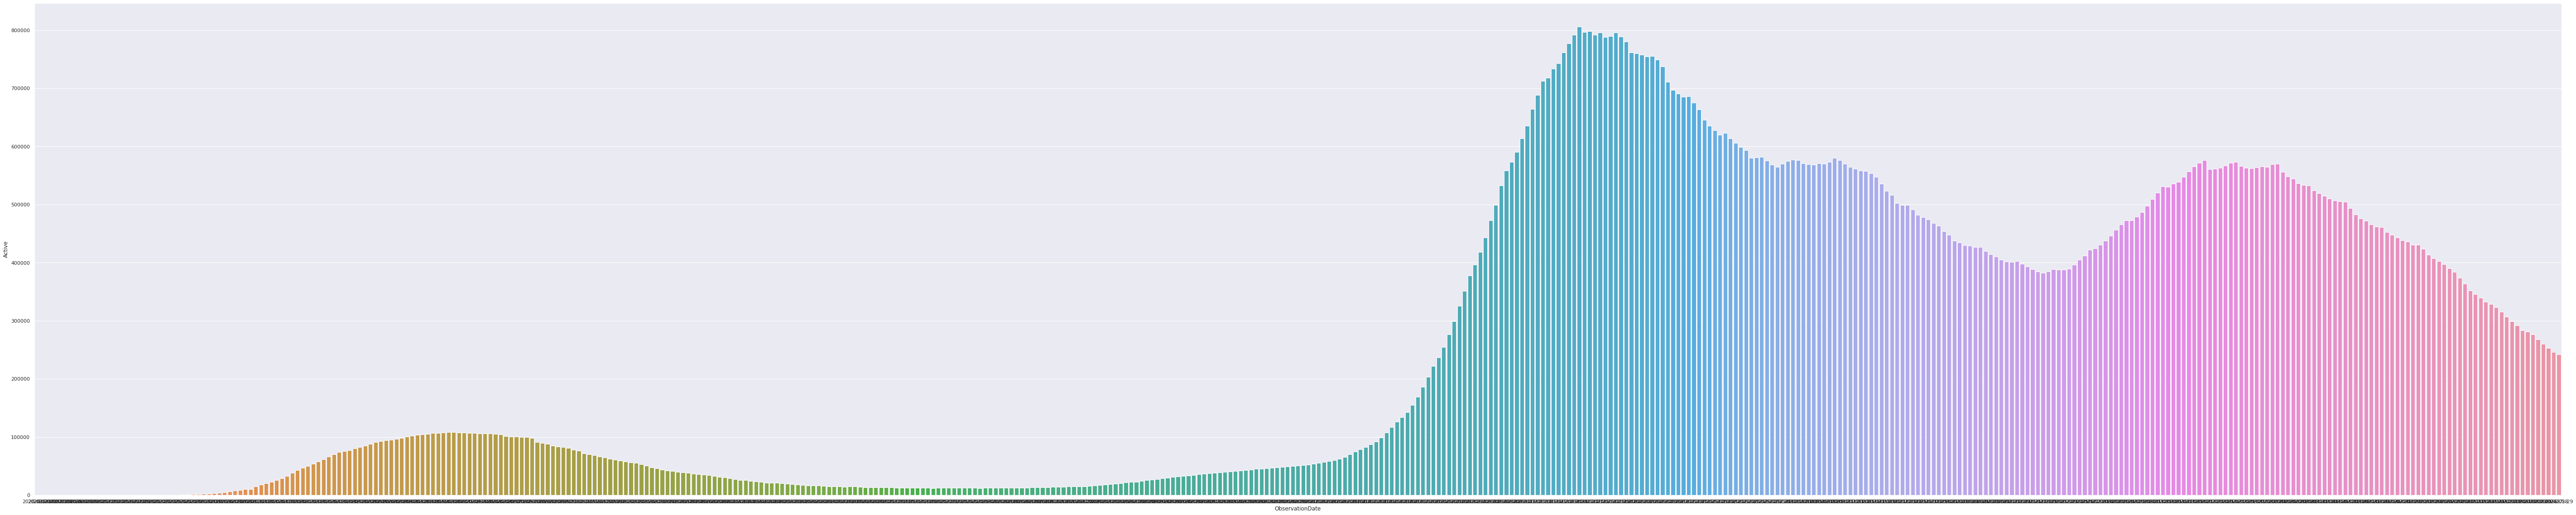

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered  Next_Day_Active
0        2020-01-31        2.0       0.0        0.0              2.0
1        2020-02-01        2.0       0.0        0.0              2.0
2        2020-02-02        2.0       0.0        0.0              2.0
3        2020-02-03        2.0       0.0        0.0              2.0
4        2020-02-04        2.0       0.0        0.0              2.0
..              ...        ...       ...        ...              ...
479      2021-05-24  4194672.0  125335.0  3792898.0         268145.0
480      2021-05-25  4197892.0  125501.0  3804246.0         260029.0
481      2021-05-26  4201827.0  125622.0  3816176.0         253193.0
482      2021-05-27  4205970.0  125793.0  3826984.0         246270.0
483      2021-05-28  4209707.0  125919.0  3837518.0         241966.0

[484 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-0.92028516, -1.43643351, -0.82519491, -1.00582377],
       [-0.92028516, -1.43643351, -0.82519491, -1.00582377],
       [-0.92028516, -1.43643351, -0.82519491, -1.00582377],
       ...,
       [ 2.03880878,  1.93893559,  2.32418846, -0.00285101],
       [ 2.04172644,  1.94353024,  2.333108  , -0.03027529],
       [ 2.04435819,  1.94691576,  2.34180141, -0.04732485]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(484, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (470, 14, 4).
trainY shape == (470, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(37, 10)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])
9 torch.Size([10, 14, 4])
9 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058]],

        [[-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-0.9203, -1.4364, -0.8252, -1.0058],
         [-

## Testing With Italy Datasets

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -1.100338 -1.005820
1   -1.127644 -1.005820
2   -1.001687 -1.005820
3   -1.121318 -1.005820
4   -1.014497 -1.005820
..        ...       ...
465 -0.006078  0.056379
466 -0.037159  0.024229
467 -0.052093 -0.002851
468 -0.085565 -0.030275
469 -0.115282 -0.047325

[470 rows x 2 columns]

##Result

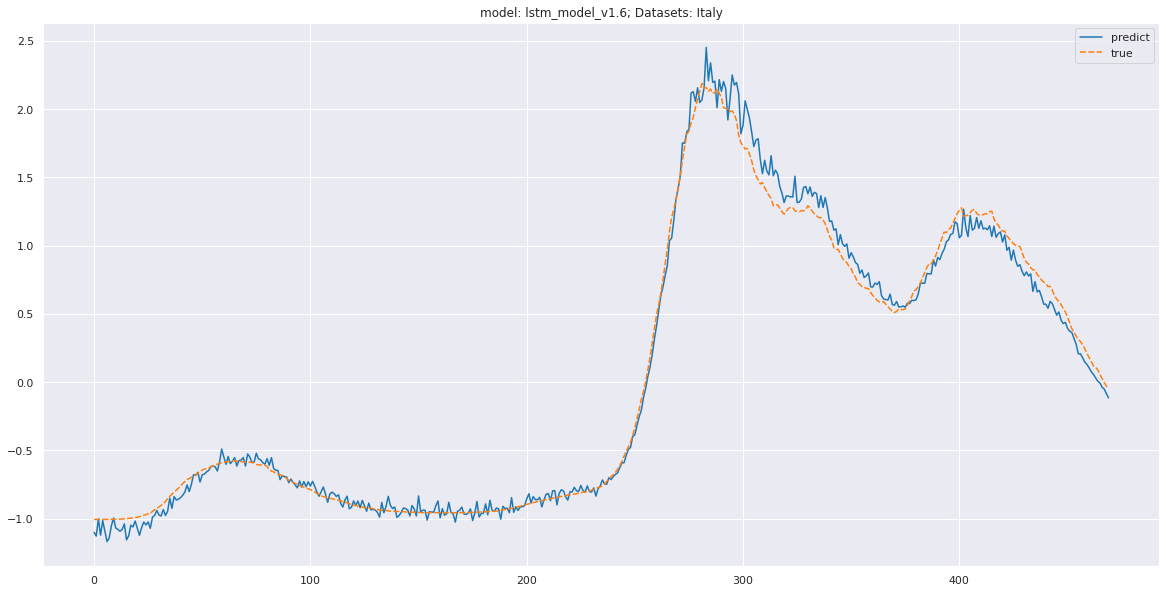

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.title(f"model: {model_name}; Datasets: {country}")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -1.100338 -1.005820    0.094518
1   -1.127644 -1.005820    0.121824
2   -1.001687 -1.005820    0.004133
3   -1.121318 -1.005820    0.115498
4   -1.014497 -1.005820    0.008677
..        ...       ...         ...
465 -0.006078  0.056379    0.062456
466 -0.037159  0.024229    0.061387
467 -0.052093 -0.002851    0.049242
468 -0.085565 -0.030275    0.055289
469 -0.115282 -0.047325    0.067957

[470 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  470.000000  470.000000  470.000000
mean     0.033749    0.029961    0.067718
std      1.027708    1.000442    0.060559
min     -1.168234   -1.005820    0.000179
25%     -0.870558   -0.886067    0.022021
50%     -0.565766   -0.584683    0.050790
75%      0.914964    0.968744    0.093863
max      2.451229    2.186789    0.352885


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

31.82761745341122
0.06771833500725792



## Model 2
---



#Test result wit Malaysia data (using lstm_model V1.6)

In [ ]:
country = 'Malaysia'

In [ ]:
model_name = 'lstm_model_v1.6'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Data Preprocessing

### We choose Italy as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']==country]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate Province/State  ... Confirmed  Deaths  Recovered
0        81      01/23/2020            NaN  ...       0.0     0.0        0.0
1       175      01/25/2020            NaN  ...       3.0     0.0        0.0
2       223      01/26/2020            NaN  ...       4.0     0.0        0.0
3       271      01/27/2020            NaN  ...       4.0     0.0        0.0
4       324      01/28/2020            NaN  ...       4.0     0.0        0.0
..      ...             ...            ...  ...       ...     ...        ...
487  302701      05/25/2021            NaN  ...  525889.0  2369.0   460062.0
488  303466      05/26/2021            NaN  ...  533367.0  2432.0   464727.0
489  304231      05/27/2021            NaN  ...  541224.0  2491.0   469325.0
490  304996      05/28/2021            NaN  ...  549514.0  2552.0   474139.0
491  305761      05/29/2021            NaN  ...  558534.0  2650.0   479666.0

[492 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate Province/State  Confirmed  Deaths  Recovered   Active
0        01/23/2020            NaN        0.0     0.0        0.0      0.0
1        01/25/2020            NaN        3.0     0.0        0.0      3.0
2        01/26/2020            NaN        4.0     0.0        0.0      4.0
3        01/27/2020            NaN        4.0     0.0        0.0      4.0
4        01/28/2020            NaN        4.0     0.0        0.0      4.0
..              ...            ...        ...     ...        ...      ...
487      05/25/2021            NaN   525889.0  2369.0   460062.0  63458.0
488      05/26/2021            NaN   533367.0  2432.0   464727.0  66208.0
489      05/27/2021            NaN   541224.0  2491.0   469325.0  69408.0
490      05/28/2021            NaN   549514.0  2552.0   474139.0  72823.0
491      05/29/2021            NaN   558534.0  2650.0   479666.0  76218.0

[492 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  492 non-null    object 
 1   Province/State   0 non-null      object 
 2   Confirmed        492 non-null    float64
 3   Deaths           492 non-null    float64
 4   Recovered        492 non-null    float64
 5   Active           492 non-null    float64
dtypes: float64(4), object(2)
memory usage: 23.2+ KB
None
ObservationDate      0
Province/State     492
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  492 non-null    object 
 1   Province/State   492 non-null    object 
 2   Confirmed        492 non-null    float64
 3   Deaths           492 non-null    float64
 4   Recovered        492 non-null    float64
 5   Active           492 non-null    float64
dtypes: float64(4), object(2)
memory usage: 23.2+ KB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed  Deaths Recovered   Active
Province/State    unknown unknown   unknown  unknown
ObservationDate                                     
01/01/2021       115078.0   474.0   91171.0  23433.0
01/02/2021       117373.0   483.0   94492.0  22398.0
01/03/2021       119077.0   494.0   97218.0  21365.0
01/04/2021       120818.0   501.0   98228.0  22089.0
01/05/2021       122845.0   509.0   99449.0  22887.0
...                   ...     ...       ...      ...
12/27/2020       105096.0   452.0   84411.0  20233.0
12/28/2020       106690.0   455.0   85592.0  20643.0
12/29/2020       108615.0   457.0   86715.0  21443.0
12/30/2020       110485.0   463.0   87460.0  22562.0
12/31/2020       113010.0   471.0   88941.0  23598.0

[492 rows x 4 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 492 entries, 01/01/2021 to 12/31/2020
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Confirmed, unknown)  492 non-null    float64
 1   (Deaths, unknown)     492 non-null    float64
 2   (Recovered, unknown)  492 non-null    float64
 3   (Active, unknown)     492 non-null    float64
dtypes: float64(4)
memory usage: 19.2+ KB
None


In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

492 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed  Deaths  Recovered   Active
0        01/01/2021   115078.0   474.0    91171.0  23433.0
1        01/02/2021   117373.0   483.0    94492.0  22398.0
2        01/03/2021   119077.0   494.0    97218.0  21365.0
3        01/04/2021   120818.0   501.0    98228.0  22089.0
4        01/05/2021   122845.0   509.0    99449.0  22887.0
..              ...        ...     ...        ...      ...
487      12/27/2020   105096.0   452.0    84411.0  20233.0
488      12/28/2020   106690.0   455.0    85592.0  20643.0
489      12/29/2020   108615.0   457.0    86715.0  21443.0
490      12/30/2020   110485.0   463.0    87460.0  22562.0
491      12/31/2020   113010.0   471.0    88941.0  23598.0

[492 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed  Deaths  Recovered   Active
0        2020-01-23        0.0     0.0        0.0      0.0
1        2020-01-25        3.0     0.0        0.0      3.0
2        2020-01-26        4.0     0.0        0.0      4.0
3        2020-01-27        4.0     0.0        0.0      4.0
4        2020-01-28        4.0     0.0        0.0      4.0
..              ...        ...     ...        ...      ...
487      2021-05-25   525889.0  2369.0   460062.0  63458.0
488      2021-05-26   533367.0  2432.0   464727.0  66208.0
489      2021-05-27   541224.0  2491.0   469325.0  69408.0
490      2021-05-28   549514.0  2552.0   474139.0  72823.0
491      2021-05-29   558534.0  2650.0   479666.0  76218.0

[492 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed  Deaths  Recovered   Active
0        2020-01-23        0.0     0.0        0.0      0.0
1        2020-01-25        3.0     0.0        0.0      3.0
2        2020-01-26        4.0     0.0        0.0      4.0
3        2020-01-27        4.0     0.0        0.0      4.0
4        2020-01-28        4.0     0.0        0.0      4.0
..              ...        ...     ...        ...      ...
487      2021-05-25   525889.0  2369.0   460062.0  63458.0
488      2021-05-26   533367.0  2432.0   464727.0  66208.0
489      2021-05-27   541224.0  2491.0   469325.0  69408.0
490      2021-05-28   549514.0  2552.0   474139.0  72823.0
491      2021-05-29   558534.0  2650.0   479666.0  76218.0

[492 rows x 5 columns]

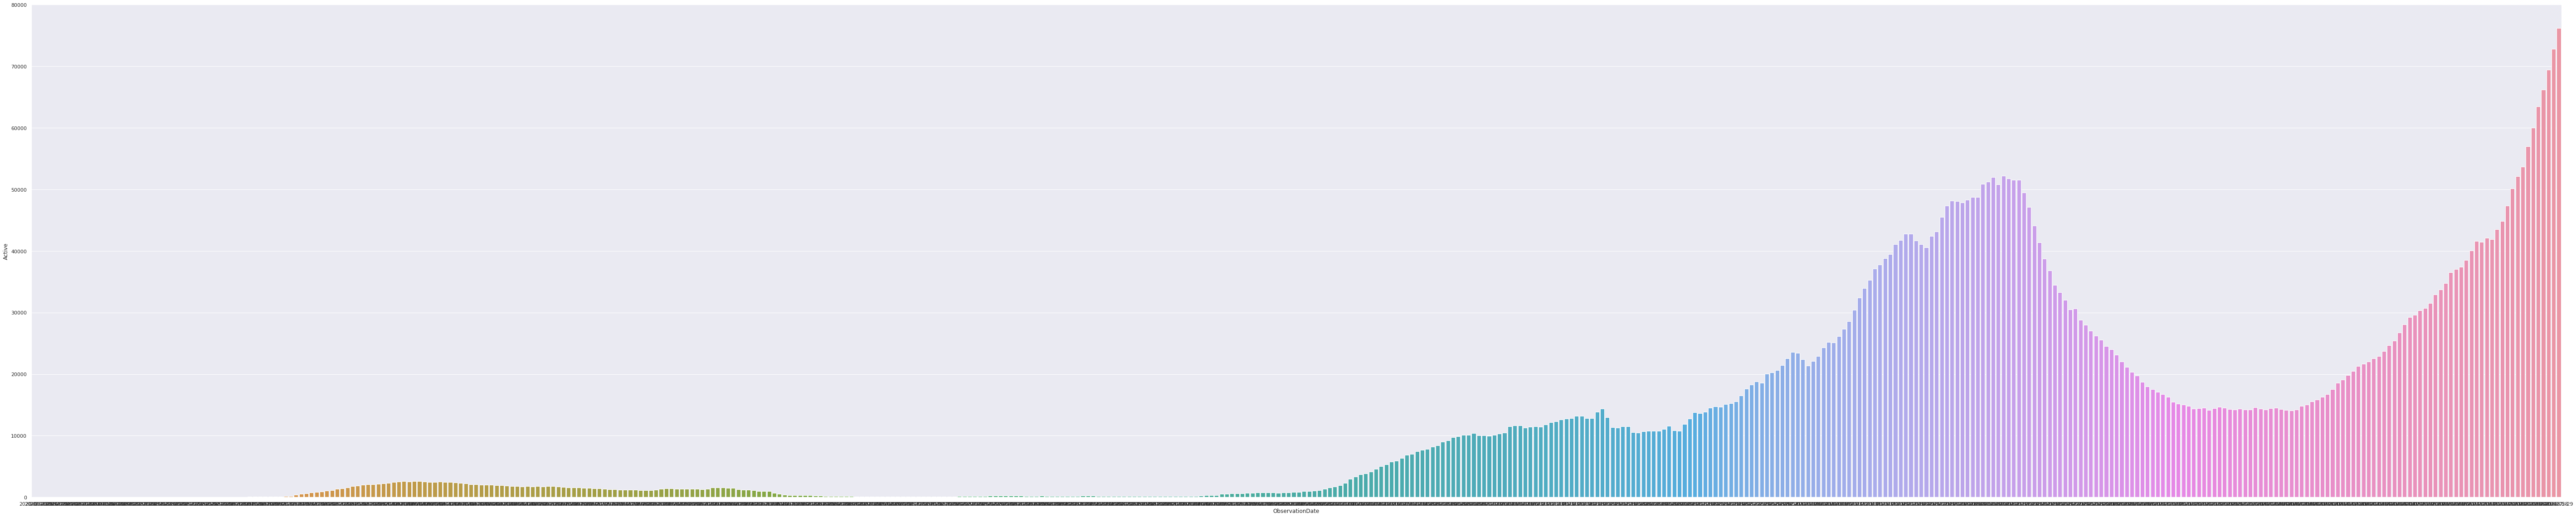

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed  Deaths  Recovered  Next_Day_Active
0        2020-01-23        0.0     0.0        0.0              3.0
1        2020-01-25        3.0     0.0        0.0              4.0
2        2020-01-26        4.0     0.0        0.0              4.0
3        2020-01-27        4.0     0.0        0.0              4.0
4        2020-01-28        4.0     0.0        0.0              7.0
..              ...        ...     ...        ...              ...
486      2021-05-24   518600.0  2309.0   456273.0          63458.0
487      2021-05-25   525889.0  2369.0   460062.0          66208.0
488      2021-05-26   533367.0  2432.0   464727.0          69408.0
489      2021-05-27   541224.0  2491.0   469325.0          72823.0
490      2021-05-28   549514.0  2552.0   474139.0          76218.0

[491 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-0.71883689, -0.83138807, -0.69525358, -0.76142479],
       [-0.71881691, -0.83138807, -0.69525358, -0.76136143],
       [-0.71881024, -0.83138807, -0.69525358, -0.76136143],
       ...,
       [ 2.83385352,  3.53316722,  2.68476223,  3.636572  ],
       [ 2.88618801,  3.63905075,  2.71820404,  3.8529708 ],
       [ 2.94140666,  3.74852356,  2.75321684,  4.06810226]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(491, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (477, 14, 4).
trainY shape == (477, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

48 torch.Size([7, 14, 4])
48 torch.Size([7, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(38, 10)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

39 torch.Size([10, 14, 4])
39 torch.Size([10, 1])
9 torch.Size([10, 14, 4])
9 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7612],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7610],
         [-0.7188, -0.8314, -0.6953, -0.7609],
         [-0.7188, -0.8314, -0.6953, -0.7609],
         [-0.7188, -0.8314, -0.6953, -0.7609]],

        [[-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7614],
         [-0.7188, -0.8314, -0.6953, -0.7612],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-0.7188, -0.8314, -0.6953, -0.7611],
         [-

## Testing With Malaysia Datasets

In [ ]:
# print(len(test_data_X[-2]), test_data_X[-2].shape)
# print(len(test_data_y[-2]), test_data_y[-2].shape)
# print(len(test_data_X[-1]), test_data_X[-1].shape)
# print(len(test_data_y[-1]), test_data_y[-1].shape)

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

8
cannot reshape array of size 392 into shape (10,14,4)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

48 torch.Size([10, 14, 4])
48 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -0.716199 -0.760664
1   -0.798617 -0.760664
2   -0.732805 -0.760538
3   -0.738201 -0.760664
4   -0.773398 -0.760664
..        ...       ...
475  1.417899  2.078944
476  1.405693  2.238186
477  1.603260  2.417578
478  1.575753  2.540194
479  1.832724  2.640060

[480 rows x 2 columns]

##Result

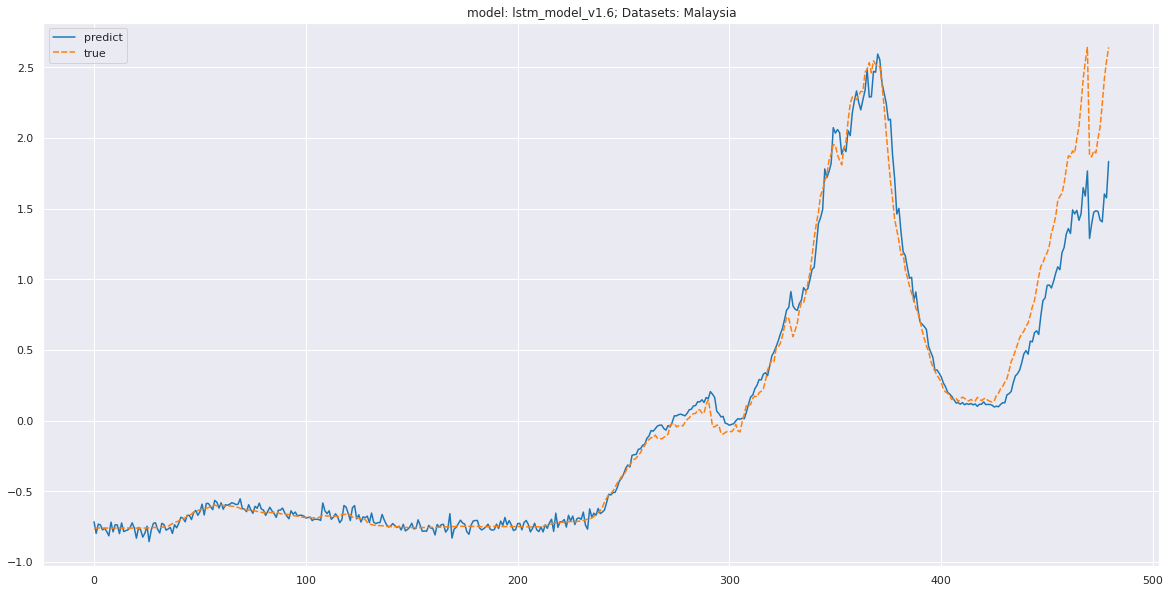

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.title(f"model: {model_name}; Datasets: {country}")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -0.716199 -0.760664    0.044465
1   -0.798617 -0.760664    0.037953
2   -0.732805 -0.760538    0.027733
3   -0.738201 -0.760664    0.022463
4   -0.773398 -0.760664    0.012734
..        ...       ...         ...
475  1.417899  2.078944    0.661045
476  1.405693  2.238186    0.832493
477  1.603260  2.417578    0.814318
478  1.575753  2.540194    0.964440
479  1.832724  2.640060    0.807336

[480 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  480.000000  480.000000  480.000000
mean    -0.014421    0.016589    0.085221
std      0.896621    0.964003    0.146830
min     -0.856235   -0.761361    0.000145
25%     -0.717959   -0.737821    0.017690
50%     -0.578774   -0.597652    0.035900
75%      0.365530    0.424697    0.076203
max      2.593330    2.640060    0.964440


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

40.90602826559916
0.08522089221999825



## Model 2
---



#Test result wit Cuba data (using lstm_model V1.6)

In [ ]:
country = 'Cuba'

In [ ]:
model_name = 'lstm_model_v1.6'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Data Preprocessing

### We choose Italy as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']==country]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate Province/State  ... Confirmed Deaths  Recovered
0      5201      03/12/2020            NaN  ...       3.0    0.0        0.0
1      5344      03/13/2020            NaN  ...       4.0    0.0        0.0
2      5671      03/14/2020            NaN  ...       4.0    0.0        0.0
3      5929      03/15/2020            NaN  ...       4.0    0.0        0.0
4      6206      03/16/2020            NaN  ...       4.0    0.0        0.0
..      ...             ...            ...  ...       ...    ...        ...
439  302641      05/25/2021            NaN  ...  135499.0  901.0   127614.0
440  303406      05/26/2021            NaN  ...  136628.0  912.0   128874.0
441  304171      05/27/2021            NaN  ...  137730.0  921.0   130198.0
442  304936      05/28/2021            NaN  ...  138899.0  933.0   131461.0
443  305701      05/29/2021            NaN  ...  140087.0  943.0   132910.0

[444 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate Province/State  Confirmed  Deaths  Recovered  Active
0        03/12/2020            NaN        3.0     0.0        0.0     3.0
1        03/13/2020            NaN        4.0     0.0        0.0     4.0
2        03/14/2020            NaN        4.0     0.0        0.0     4.0
3        03/15/2020            NaN        4.0     0.0        0.0     4.0
4        03/16/2020            NaN        4.0     0.0        0.0     4.0
..              ...            ...        ...     ...        ...     ...
439      05/25/2021            NaN   135499.0   901.0   127614.0  6984.0
440      05/26/2021            NaN   136628.0   912.0   128874.0  6842.0
441      05/27/2021            NaN   137730.0   921.0   130198.0  6611.0
442      05/28/2021            NaN   138899.0   933.0   131461.0  6505.0
443      05/29/2021            NaN   140087.0   943.0   132910.0  6234.0

[444 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  444 non-null    object 
 1   Province/State   0 non-null      object 
 2   Confirmed        444 non-null    float64
 3   Deaths           444 non-null    float64
 4   Recovered        444 non-null    float64
 5   Active           444 non-null    float64
dtypes: float64(4), object(2)
memory usage: 20.9+ KB
None
ObservationDate      0
Province/State     444
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  444 non-null    object 
 1   Province/State   444 non-null    object 
 2   Confirmed        444 non-null    float64
 3   Deaths           444 non-null    float64
 4   Recovered        444 non-null    float64
 5   Active           444 non-null    float64
dtypes: float64(4), object(2)
memory usage: 20.9+ KB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed  Deaths Recovered  Active
Province/State    unknown unknown   unknown unknown
ObservationDate                                    
01/01/2021        12056.0   146.0   10345.0  1565.0
01/02/2021        12225.0   146.0   10494.0  1585.0
01/03/2021        12424.0   147.0   10676.0  1601.0
01/04/2021        12740.0   147.0   10837.0  1756.0
01/05/2021        12964.0   147.0   11036.0  1781.0
...                   ...     ...       ...     ...
12/27/2020        11205.0   142.0    9705.0  1358.0
12/28/2020        11434.0   143.0    9797.0  1494.0
12/29/2020        11601.0   143.0    9875.0  1583.0
12/30/2020        11687.0   145.0   10003.0  1539.0
12/31/2020        11863.0   146.0   10125.0  1592.0

[444 rows x 4 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 01/01/2021 to 12/31/2020
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Confirmed, unknown)  444 non-null    float64
 1   (Deaths, unknown)     444 non-null    float64
 2   (Recovered, unknown)  444 non-null    float64
 3   (Active, unknown)     444 non-null    float64
dtypes: float64(4)
memory usage: 17.3+ KB
None


In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

444 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed  Deaths  Recovered  Active
0        01/01/2021    12056.0   146.0    10345.0  1565.0
1        01/02/2021    12225.0   146.0    10494.0  1585.0
2        01/03/2021    12424.0   147.0    10676.0  1601.0
3        01/04/2021    12740.0   147.0    10837.0  1756.0
4        01/05/2021    12964.0   147.0    11036.0  1781.0
..              ...        ...     ...        ...     ...
439      12/27/2020    11205.0   142.0     9705.0  1358.0
440      12/28/2020    11434.0   143.0     9797.0  1494.0
441      12/29/2020    11601.0   143.0     9875.0  1583.0
442      12/30/2020    11687.0   145.0    10003.0  1539.0
443      12/31/2020    11863.0   146.0    10125.0  1592.0

[444 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed  Deaths  Recovered  Active
0        2020-03-12        3.0     0.0        0.0     3.0
1        2020-03-13        4.0     0.0        0.0     4.0
2        2020-03-14        4.0     0.0        0.0     4.0
3        2020-03-15        4.0     0.0        0.0     4.0
4        2020-03-16        4.0     0.0        0.0     4.0
..              ...        ...     ...        ...     ...
439      2021-05-25   135499.0   901.0   127614.0  6984.0
440      2021-05-26   136628.0   912.0   128874.0  6842.0
441      2021-05-27   137730.0   921.0   130198.0  6611.0
442      2021-05-28   138899.0   933.0   131461.0  6505.0
443      2021-05-29   140087.0   943.0   132910.0  6234.0

[444 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed  Deaths  Recovered  Active
0        2020-03-12        3.0     0.0        0.0     3.0
1        2020-03-13        4.0     0.0        0.0     4.0
2        2020-03-14        4.0     0.0        0.0     4.0
3        2020-03-15        4.0     0.0        0.0     4.0
4        2020-03-16        4.0     0.0        0.0     4.0
..              ...        ...     ...        ...     ...
439      2021-05-25   135499.0   901.0   127614.0  6984.0
440      2021-05-26   136628.0   912.0   128874.0  6842.0
441      2021-05-27   137730.0   921.0   130198.0  6611.0
442      2021-05-28   138899.0   933.0   131461.0  6505.0
443      2021-05-29   140087.0   943.0   132910.0  6234.0

[444 rows x 5 columns]

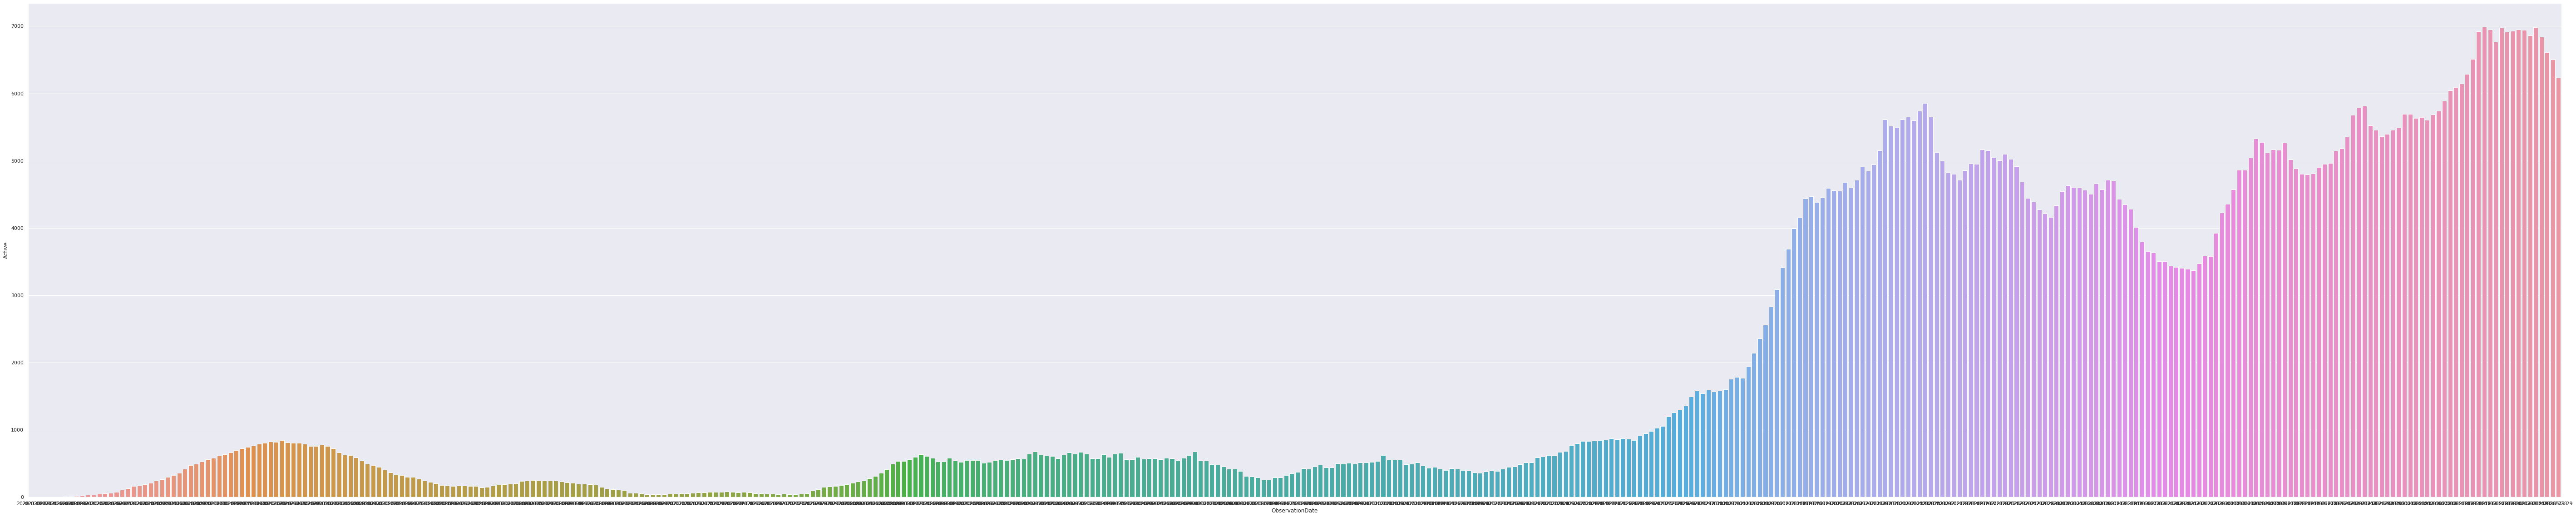

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed  Deaths  Recovered  Next_Day_Active
0        2020-03-12        3.0     0.0        0.0              4.0
1        2020-03-13        4.0     0.0        0.0              4.0
2        2020-03-14        4.0     0.0        0.0              4.0
3        2020-03-15        4.0     0.0        0.0              4.0
4        2020-03-16        4.0     0.0        0.0              5.0
..              ...        ...     ...        ...              ...
438      2021-05-24   134208.0   890.0   126459.0           6984.0
439      2021-05-25   135499.0   901.0   127614.0           6842.0
440      2021-05-26   136628.0   912.0   128874.0           6611.0
441      2021-05-27   137730.0   921.0   130198.0           6505.0
442      2021-05-28   138899.0   933.0   131461.0           6234.0

[443 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-0.67772071, -0.98724688, -0.65891815, -0.86661713],
       [-0.67769334, -0.98724688, -0.65891815, -0.86661713],
       [-0.67769334, -0.98724688, -0.65891815, -0.86661713],
       ...,
       [ 3.06192184,  3.51475132,  3.08705515,  2.14044562],
       [ 3.09208533,  3.55917893,  3.12553978,  2.09220154],
       [ 3.12408271,  3.61841575,  3.16225133,  1.96886054]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(443, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (429, 14, 4).
trainY shape == (429, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

43 torch.Size([9, 14, 4])
43 torch.Size([9, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(34, 9)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

35 torch.Size([10, 14, 4])
35 torch.Size([10, 1])
8 torch.Size([10, 14, 4])
8 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8662],
         [-0.6777, -0.9872, -0.6589, -0.8657],
         [-0.6776, -0.9823, -0.6589, -0.8639],
         [-0.6775, -0.9823, -0.6589, -0.8616],
         [-0.6774, -0.9823, -0.6589, -0.8593],
         [-0.6772, -0.9823, -0.6589, -0.8530],
         [-0.6768, -0.9823, -0.6589, -0.8507],
         [-0.6767, -0.9823, -0.6589, -0.8475],
         [-0.6765, -0.9823, -0.6589, -0.8434],
         [-0.6762, -0.9823, -0.6589, -0.8393]],

        [[-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8666],
         [-0.6777, -0.9872, -0.6589, -0.8662],
         [-0.6777, -0.9872, -0.6589, -0.8657],
         [-0.6776, -0.9823, -0.6589, -0.8639],
         [-0.6775, -0.9823, -0.6589, -0.8616],
         [-

## Testing With Cuba Datasets

In [ ]:
# print(len(test_data_X[-2]), test_data_X[-2].shape)
# print(len(test_data_y[-2]), test_data_y[-2].shape)
# print(len(test_data_X[-1]), test_data_X[-1].shape)
# print(len(test_data_y[-1]), test_data_y[-1].shape)

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

7
cannot reshape array of size 504 into shape (10,14,4)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

43 torch.Size([10, 14, 4])
43 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -0.929738 -0.834758
1   -0.807146 -0.817463
2   -0.852677 -0.808360
3   -0.835262 -0.794706
4   -0.840370 -0.790155
..        ...       ...
425  1.501401  2.312941
426  1.549882  2.293825
427  1.547213  2.211901
428  1.597749  2.307479
429  1.529217  2.277441

[430 rows x 2 columns]

##Result

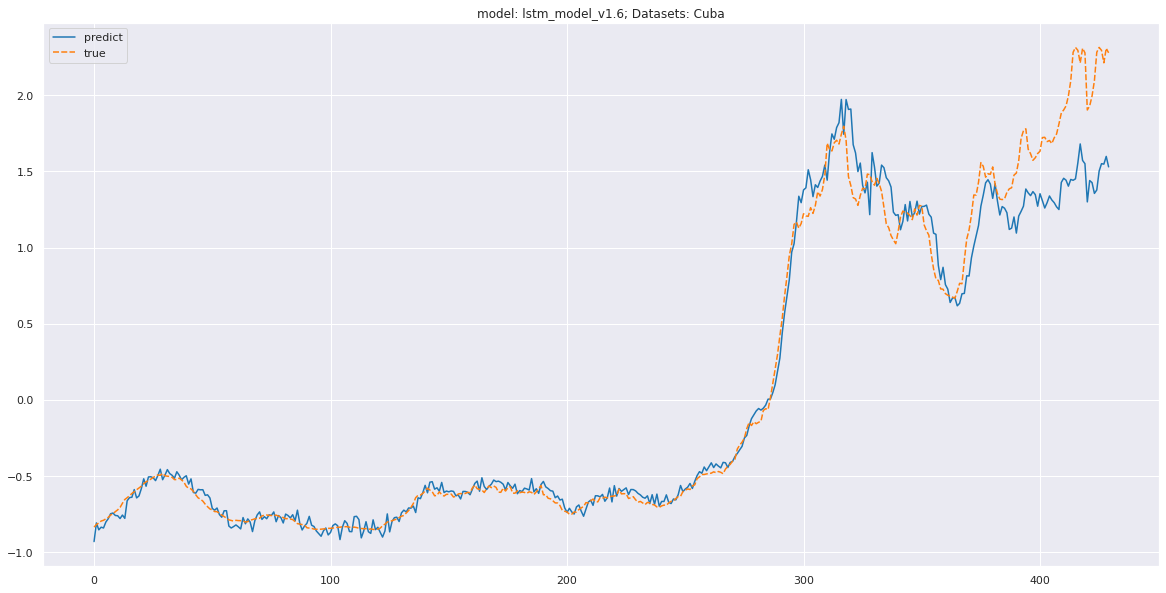

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.title(f"model: {model_name}; Datasets: {country}")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -0.929738 -0.834758    0.094980
1   -0.807146 -0.817463    0.010317
2   -0.852677 -0.808360    0.044317
3   -0.835262 -0.794706    0.040556
4   -0.840370 -0.790155    0.050215
..        ...       ...         ...
425  1.501401  2.312941    0.811540
426  1.549882  2.293825    0.743944
427  1.547213  2.211901    0.664689
428  1.597749  2.307479    0.709730
429  1.529217  2.277441    0.748224

[430 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  430.000000  430.000000  430.000000
mean    -0.004672    0.031955    0.105701
std      0.927282    1.007131    0.164939
min     -0.929738   -0.850232    0.000197
25%     -0.706649   -0.704362    0.017883
50%     -0.561166   -0.584890    0.040980
75%      1.170157    1.150645    0.092197
max      1.971704    2.312941    0.903832


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

45.451356797944754
0.10570082976266222


#Test result wit Indonesia data (using lstm_model V1.6)

##Create a LSTM model

In [ ]:
input_size = 4
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class LSTMNetwork(nn.Module):
  """
  input_size = 4
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork, self).__init__()  #繼承
    # self.lstm = nn.Sequential(
    #     nn.LSTM(input_size=input_size, hidden_size=input_size, num_layers=1, batch_first=True),
    #     nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True),
    #     nn.Dropout(0.2),
    #     nn.Linear(in_features=hidden_size, out_features=num_class)
    # )
    self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=1, batch_first=True)  #(1, 14, 64)
    self.fc1 = nn.Linear(in_features=hidden_size, out_features=hidden_size//2) # (1, 14, 64) > (1, 14, 32)
    self.lstm2 = nn.LSTM(input_size=hidden_size//2, hidden_size=hidden_size//2, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #(1, 14*32)
    self.fc2 = nn.Linear(in_features=1*14*32, out_features=num_class)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2,device=x.device))
    c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2, device=x.device))
    out, (h, c) = self.lstm1(x, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    out = self.fc1(out)
    # print("fc1", out.shape)
    out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model = LSTMNetwork(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model

LSTMNetwork(
  (lstm1): LSTM(4, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (lstm2): LSTM(32, 32, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=448, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model.parameters(), lr=0.001)

##Country

In [ ]:
country = 'Indonesia'

In [ ]:
model_name = 'lstm_model_v1.6'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Data Preprocessing

### We choose Italy as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']==country]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate Province/State  ...  Confirmed   Deaths  Recovered
0      3115      03/02/2020            NaN  ...        2.0      0.0        0.0
1      3259      03/03/2020            NaN  ...        2.0      0.0        0.0
2      3422      03/04/2020            NaN  ...        2.0      0.0        0.0
3      3591      03/05/2020            NaN  ...        2.0      0.0        0.0
4      3761      03/06/2020            NaN  ...        4.0      0.0        0.0
..      ...             ...            ...  ...        ...      ...        ...
449  302675      05/25/2021            NaN  ...  1786187.0  49627.0  1642074.0
450  303440      05/26/2021            NaN  ...  1791221.0  49771.0  1645263.0
451  304205      05/27/2021            NaN  ...  1797499.0  49907.0  1649187.0
452  304970      05/28/2021            NaN  ...  1803361.0  50100.0  1654557.0
453  305735      05/29/2021            NaN  ...  1809926.0  50262.0  1659974.0

[454 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate Province/State  Confirmed   Deaths  Recovered   Active
0        03/02/2020            NaN        2.0      0.0        0.0      2.0
1        03/03/2020            NaN        2.0      0.0        0.0      2.0
2        03/04/2020            NaN        2.0      0.0        0.0      2.0
3        03/05/2020            NaN        2.0      0.0        0.0      2.0
4        03/06/2020            NaN        4.0      0.0        0.0      4.0
..              ...            ...        ...      ...        ...      ...
449      05/25/2021            NaN  1786187.0  49627.0  1642074.0  94486.0
450      05/26/2021            NaN  1791221.0  49771.0  1645263.0  96187.0
451      05/27/2021            NaN  1797499.0  49907.0  1649187.0  98405.0
452      05/28/2021            NaN  1803361.0  50100.0  1654557.0  98704.0
453      05/29/2021            NaN  1809926.0  50262.0  1659974.0  99690.0

[454 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  454 non-null    object 
 1   Province/State   0 non-null      object 
 2   Confirmed        454 non-null    float64
 3   Deaths           454 non-null    float64
 4   Recovered        454 non-null    float64
 5   Active           454 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.4+ KB
None
ObservationDate      0
Province/State     454
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 454 entries, 0 to 453
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  454 non-null    object 
 1   Province/State   454 non-null    object 
 2   Confirmed        454 non-null    float64
 3   Deaths           454 non-null    float64
 4   Recovered        454 non-null    float64
 5   Active           454 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.4+ KB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed   Deaths Recovered    Active
Province/State    unknown  unknown   unknown   unknown
ObservationDate                                       
01/01/2021       751270.0  22329.0  617936.0  111005.0
01/02/2021       758473.0  22555.0  625518.0  110400.0
01/03/2021       765350.0  22734.0  631937.0  110679.0
01/04/2021       772103.0  22911.0  639103.0  110089.0
01/05/2021       779548.0  23109.0  645746.0  110693.0
...                   ...      ...       ...       ...
12/27/2020       713365.0  21237.0  583676.0  108452.0
12/28/2020       719219.0  21452.0  589978.0  107789.0
12/29/2020       727122.0  21703.0  596783.0  108636.0
12/30/2020       735124.0  21944.0  603741.0  109439.0
12/31/2020       743198.0  22138.0  611097.0  109963.0

[454 rows x 4 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 01/01/2021 to 12/31/2020
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   (Confirmed, unknown)  454 non-null    float64
 1   (Deaths, unknown)     454 non-null    float64
 2   (Recovered, unknown)  454 non-null    float64
 3   (Active, unknown)     454 non-null    float64
dtypes: float64(4)
memory usage: 17.7+ KB
None


In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

454 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered    Active
0        01/01/2021   751270.0  22329.0   617936.0  111005.0
1        01/02/2021   758473.0  22555.0   625518.0  110400.0
2        01/03/2021   765350.0  22734.0   631937.0  110679.0
3        01/04/2021   772103.0  22911.0   639103.0  110089.0
4        01/05/2021   779548.0  23109.0   645746.0  110693.0
..              ...        ...      ...        ...       ...
449      12/27/2020   713365.0  21237.0   583676.0  108452.0
450      12/28/2020   719219.0  21452.0   589978.0  107789.0
451      12/29/2020   727122.0  21703.0   596783.0  108636.0
452      12/30/2020   735124.0  21944.0   603741.0  109439.0
453      12/31/2020   743198.0  22138.0   611097.0  109963.0

[454 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered   Active
0        2020-03-02        2.0      0.0        0.0      2.0
1        2020-03-03        2.0      0.0        0.0      2.0
2        2020-03-04        2.0      0.0        0.0      2.0
3        2020-03-05        2.0      0.0        0.0      2.0
4        2020-03-06        4.0      0.0        0.0      4.0
..              ...        ...      ...        ...      ...
449      2021-05-25  1786187.0  49627.0  1642074.0  94486.0
450      2021-05-26  1791221.0  49771.0  1645263.0  96187.0
451      2021-05-27  1797499.0  49907.0  1649187.0  98405.0
452      2021-05-28  1803361.0  50100.0  1654557.0  98704.0
453      2021-05-29  1809926.0  50262.0  1659974.0  99690.0

[454 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed   Deaths  Recovered   Active
0        2020-03-02        2.0      0.0        0.0      2.0
1        2020-03-03        2.0      0.0        0.0      2.0
2        2020-03-04        2.0      0.0        0.0      2.0
3        2020-03-05        2.0      0.0        0.0      2.0
4        2020-03-06        4.0      0.0        0.0      4.0
..              ...        ...      ...        ...      ...
449      2021-05-25  1786187.0  49627.0  1642074.0  94486.0
450      2021-05-26  1791221.0  49771.0  1645263.0  96187.0
451      2021-05-27  1797499.0  49907.0  1649187.0  98405.0
452      2021-05-28  1803361.0  50100.0  1654557.0  98704.0
453      2021-05-29  1809926.0  50262.0  1659974.0  99690.0

[454 rows x 5 columns]

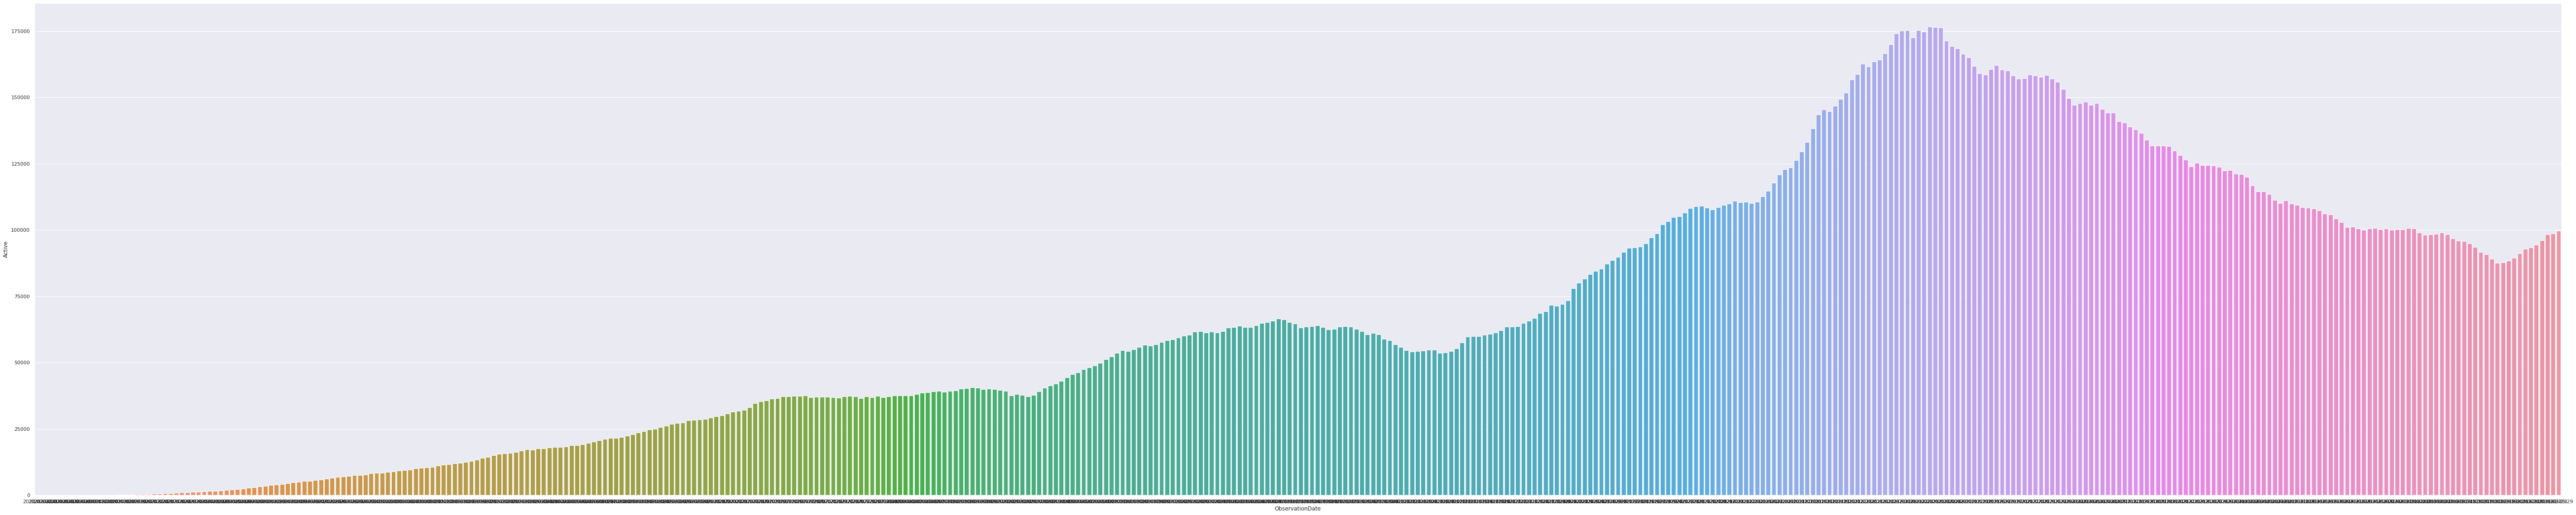

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed   Deaths  Recovered  Next_Day_Active
0        2020-03-02        2.0      0.0        0.0              2.0
1        2020-03-03        2.0      0.0        0.0              2.0
2        2020-03-04        2.0      0.0        0.0              2.0
3        2020-03-05        2.0      0.0        0.0              4.0
4        2020-03-06        4.0      0.0        0.0              4.0
..              ...        ...      ...        ...              ...
448      2021-05-24  1781127.0  49455.0  1638279.0          94486.0
449      2021-05-25  1786187.0  49627.0  1642074.0          96187.0
450      2021-05-26  1791221.0  49771.0  1645263.0          98405.0
451      2021-05-27  1797499.0  49907.0  1649187.0          98704.0
452      2021-05-28  1803361.0  50100.0  1654557.0          99690.0

[453 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-0.96595568, -1.0683515 , -0.91111524, -1.3518545 ],
       [-0.96595568, -1.0683515 , -0.91111524, -1.3518545 ],
       [-0.96595568, -1.0683515 , -0.91111524, -1.3518545 ],
       ...,
       [ 2.01001866,  2.0517424 ,  2.1101939 ,  0.59213478],
       [ 2.02044908,  2.0602681 ,  2.11739981,  0.59804164],
       [ 2.03018835,  2.07236708,  2.1272611 ,  0.61752045]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(453, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
russia_datasets_overall_training.shape[1]

4

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:253])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (439, 14, 4).
trainY shape == (439, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

44 torch.Size([9, 14, 4])
44 torch.Size([9, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(35, 9)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

36 torch.Size([10, 14, 4])
36 torch.Size([10, 1])
8 torch.Size([10, 14, 4])
8 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-0.9660, -1.0684, -0.9111, -1.3519],
         [-0.9660, -1.0684, -0.9111, -1.3519],
         [-0.9660, -1.0684, -0.9111, -1.3519],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9659, -1.0684, -0.9111, -1.3515],
         [-0.9659, -1.0684, -0.9111, -1.3514],
         [-0.9659, -1.0684, -0.9111, -1.3513],
         [-0.9659, -1.0683, -0.9111, -1.3513],
         [-0.9659, -1.0683, -0.9111, -1.3506],
         [-0.9658, -1.0681, -0.9111, -1.3503],
         [-0.9658, -1.0680, -0.9111, -1.3498],
         [-0.9658, -1.0680, -0.9111, -1.3495]],

        [[-0.9660, -1.0684, -0.9111, -1.3519],
         [-0.9660, -1.0684, -0.9111, -1.3519],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9660, -1.0684, -0.9111, -1.3518],
         [-0.9659, -1.0684, -0.9111, -1.3515],
         [-0.9659, -1.0684, -0.9111, -1.3514],
         [-

## Testing With Cuba Datasets

In [ ]:
# print(len(test_data_X[-2]), test_data_X[-2].shape)
# print(len(test_data_y[-2]), test_data_y[-2].shape)
# print(len(test_data_X[-1]), test_data_X[-1].shape)
# print(len(test_data_y[-1]), test_data_y[-1].shape)

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
  labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 4)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

7
cannot reshape array of size 504 into shape (10,14,4)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

44 torch.Size([10, 14, 4])
44 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -1.380309 -1.348753
1   -1.445222 -1.348002
2   -1.319656 -1.346461
3   -1.314297 -1.345533
4   -1.418447 -1.344051
..        ...       ...
435  0.381013  0.441895
436  0.319397  0.408884
437  0.287636  0.376979
438  0.286284  0.383202
439  0.276982  0.395253

[440 rows x 2 columns]

##Result

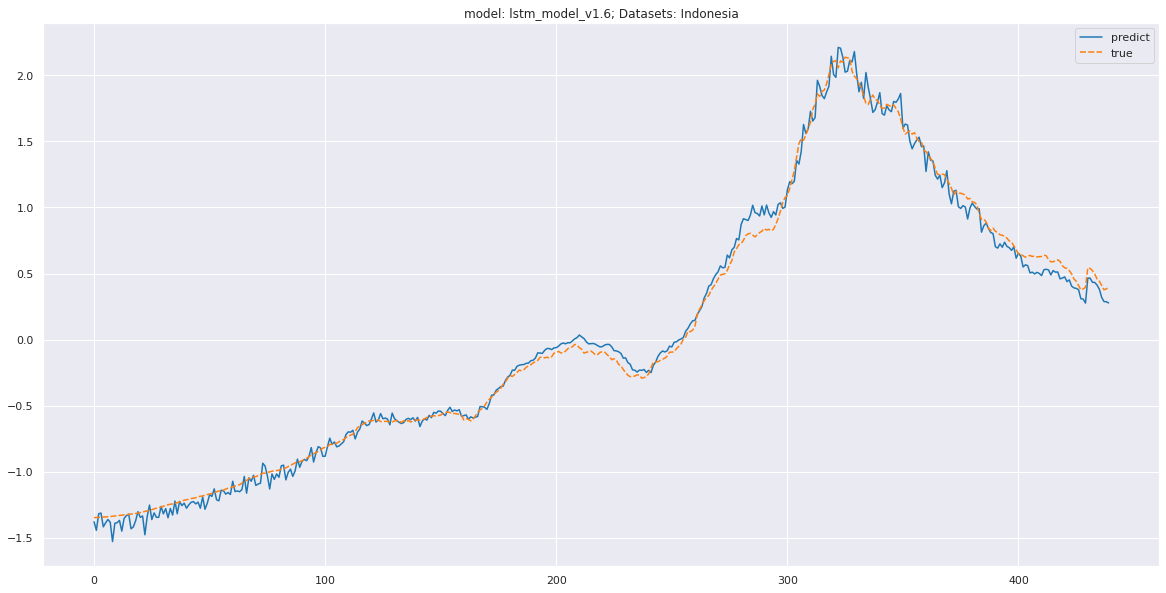

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.title(f"model: {model_name}; Datasets: {country}")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -1.380309 -1.348753    0.031557
1   -1.445222 -1.348002    0.097220
2   -1.319656 -1.346461    0.026805
3   -1.314297 -1.345533    0.031235
4   -1.418447 -1.344051    0.074396
..        ...       ...         ...
435  0.381013  0.441895    0.060882
436  0.319397  0.408884    0.089487
437  0.287636  0.376979    0.089343
438  0.286284  0.383202    0.096918
439  0.276982  0.395253    0.118271

[440 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  440.000000  440.000000  440.000000
mean     0.039916    0.042660    0.055489
std      0.992747    0.985378    0.041452
min     -1.530209   -1.348753    0.000261
25%     -0.726600   -0.733289    0.025147
50%     -0.078866   -0.133836    0.046186
75%      0.774433    0.787570    0.076823
max      2.212308    2.138330    0.232609


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

24.415066271089017
0.05548878697974777



## Create Model 2
---






---


#Model 2

## Create New Russia Data

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="Russia"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0         501      01/31/2020  ...     0.0       0.0
1         561      02/01/2020  ...     0.0       0.0
2         633      02/02/2020  ...     0.0       0.0
3         702      02/03/2020  ...     0.0       0.0
4         772      02/04/2020  ...     0.0       0.0
...       ...             ...  ...     ...       ...
30246  306399      05/29/2021  ...  1092.0   42907.0
30247  306401      05/29/2021  ...  2910.0   80119.0
30248  306416      05/29/2021  ...   419.0   37848.0
30249  306418      05/29/2021  ...   605.0   38968.0
30250  306422      05/29/2021  ...   669.0   41650.0

[30251 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                             NaN  ...        0.0     2.0
1          02/01/2020                             NaN  ...        0.0     2.0
2          02/02/2020                             NaN  ...        0.0     2.0
3          02/03/2020                             NaN  ...        0.0     2.0
4          02/04/2020                             NaN  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30129 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate      0
Province/State     122
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30251 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed             ...           Active        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
01/01/2021              11103.0    33124.0  ...           1717.0     NaN
01/02/2021              11184.0    33334.0  ...           1847.0     NaN
01/03/2021              11261.0    33542.0  ...           1781.0     NaN
01/04/2021              11341.0    33748.0  ...           1733.0     NaN
01/05/2021              11420.0    33957.0  ...           1723.0     NaN
...                         ...        ...  ...              ...     ...
12/27/2020              10676.0    32062.0  ...           1797.0     NaN
12/28/2020              10767.0    32276.0  ...           1873.0     NaN
12/29/2020              10856.0    32488.0  ...           1844.0     NaN
12/30/2020              10945.0    32699.0  ...           1713.0     NaN
12/31/2020              11025.0    32912.0  ...           1604.0     NaN

[485 rows x 336 columns]

In [ ]:
new_russia_datasets = russia_datasets
new_russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                         unknown  ...        0.0     2.0
1          02/01/2020                         unknown  ...        0.0     2.0
2          02/02/2020                         unknown  ...        0.0     2.0
3          02/03/2020                         unknown  ...        0.0     2.0
4          02/04/2020                         unknown  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

In [ ]:
russia_active_cases = pd.DataFrame()
russia_active_cases['ObservationDate'] = new_russia_datasets['ObservationDate']
russia_active_cases['Active'] = new_russia_datasets['Active']
russia_active_cases

ObservationDate  Active
0          01/31/2020     2.0
1          02/01/2020     2.0
2          02/02/2020     2.0
3          02/03/2020     2.0
4          02/04/2020     2.0
...               ...     ...
30246      05/29/2021  2024.0
30247      05/29/2021  1643.0
30248      05/29/2021   796.0
30249      05/29/2021  1330.0
30250      05/29/2021   807.0

[30251 rows x 2 columns]

In [ ]:
russia_active_cases = russia_active_cases.groupby(['ObservationDate'],as_index = False).sum()
russia_active_cases["ObservationDate"] = pd.to_datetime(russia_active_cases["ObservationDate"])
russia_active_cases = russia_active_cases.sort_values(['ObservationDate'])
russia_active_cases = russia_active_cases.reset_index(drop=True)
russia_active_cases['ObservationDate'] = russia_active_cases['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_active_cases = russia_active_cases.set_index(russia_active_cases['ObservationDate'])
russia_active_cases = russia_active_cases.drop('ObservationDate', axis=1)
russia_active_cases

Active
ObservationDate          
2020-01-31            2.0
2020-02-01            2.0
2020-02-02            2.0
2020-02-03            2.0
2020-02-04            2.0
...                   ...
2021-05-25       263556.0
2021-05-26       262405.0
2021-05-27       261328.0
2021-05-28       260796.0
2021-05-29       260410.0

[485 rows x 1 columns]

In [ ]:
new_russia_datasets_without_active = new_russia_datasets.iloc[:,:-1]
new_russia_datasets_without_active

ObservationDate                  Province/State  ...  Deaths  Recovered
0          01/31/2020                         unknown  ...     0.0        0.0
1          02/01/2020                         unknown  ...     0.0        0.0
2          02/02/2020                         unknown  ...     0.0        0.0
3          02/03/2020                         unknown  ...     0.0        0.0
4          02/04/2020                         unknown  ...     0.0        0.0
...               ...                             ...  ...     ...        ...
30246      05/29/2021                  Vologda Oblast  ...  1092.0    42907.0
30247      05/29/2021                 Voronezh Oblast  ...  2910.0    80119.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...   419.0    37848.0
30249      05/29/2021                Yaroslavl Oblast  ...   605.0    38968.0
30250      05/29/2021                Zabaykalsky Krai  ...   669.0    41650.0

[30251 rows x 5 columns]

In [ ]:
print(new_russia_datasets_without_active.isnull().sum())
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value="unknown")
print("\nAfter：\n##########")
print(new_russia_datasets_without_active.isnull().sum())

ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

After：
##########
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [ ]:
new_russia_datasets_without_active = new_russia_datasets_without_active.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value=0)
new_russia_datasets_without_active.index = pd.to_datetime(new_russia_datasets_without_active.index)
new_russia_datasets_without_active = new_russia_datasets_without_active.sort_index()
new_russia_datasets_without_active.index = new_russia_datasets_without_active.index.strftime('%Y-%m-%d')
new_russia_datasets_without_active

Confirmed             ...        Recovered        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
2020-01-31                  0.0        0.0  ...              0.0     0.0
2020-02-01                  0.0        0.0  ...              0.0     0.0
2020-02-02                  0.0        0.0  ...              0.0     0.0
2020-02-03                  0.0        0.0  ...              0.0     0.0
2020-02-04                  0.0        0.0  ...              0.0     0.0
...                         ...        ...  ...              ...     ...
2021-05-25              14628.0    51283.0  ...          41544.0     0.0
2021-05-26              14636.0    51343.0  ...          41561.0     0.0
2021-05-27              14645.0    51404.0  ...          41605.0     0.0
2021-05-28              14654.0    51463.0  ...          41627.0     0.0
2021-05-29              14661.0    51521.0  ...          41650.0     0.0

[485 rows x 252 columns]

In [ ]:
new_russia_datasets = new_russia_datasets_without_active
new_russia_datasets['Active'] = russia_active_cases
new_russia_datasets

Confirmed             ... Recovered    Active
Province/State  Adygea Republic Altai Krai  ...   unknown          
ObservationDate                             ...                    
2020-01-31                  0.0        0.0  ...       0.0       2.0
2020-02-01                  0.0        0.0  ...       0.0       2.0
2020-02-02                  0.0        0.0  ...       0.0       2.0
2020-02-03                  0.0        0.0  ...       0.0       2.0
2020-02-04                  0.0        0.0  ...       0.0       2.0
...                         ...        ...  ...       ...       ...
2021-05-25              14628.0    51283.0  ...       0.0  263556.0
2021-05-26              14636.0    51343.0  ...       0.0  262405.0
2021-05-27              14645.0    51404.0  ...       0.0  261328.0
2021-05-28              14654.0    51463.0  ...       0.0  260796.0
2021-05-29              14661.0    51521.0  ...       0.0  260410.0

[485 rows x 253 columns]

In [ ]:
# print(new_russia_datasets.columns.values)

In [ ]:
# print(new_russia_datasets[('Confirmed', 'Adygea Republic')].values)
# print(new_russia_datasets.index.values)

##Create new datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(new_russia_datasets)[:] #not include date
russia_table_columns

[('Confirmed', 'Adygea Republic'),
 ('Confirmed', 'Altai Krai'),
 ('Confirmed', 'Altai Republic'),
 ('Confirmed', 'Amur Oblast'),
 ('Confirmed', 'Arkhangelsk Oblast'),
 ('Confirmed', 'Astrakhan Oblast'),
 ('Confirmed', 'Bashkortostan Republic'),
 ('Confirmed', 'Belgorod Oblast'),
 ('Confirmed', 'Bryansk Oblast'),
 ('Confirmed', 'Buryatia Republic'),
 ('Confirmed', 'Chechen Republic'),
 ('Confirmed', 'Chelyabinsk Oblast'),
 ('Confirmed', 'Chukotka Autonomous Okrug'),
 ('Confirmed', 'Chuvashia Republic'),
 ('Confirmed', 'Dagestan Republic'),
 ('Confirmed', 'Ingushetia Republic'),
 ('Confirmed', 'Irkutsk Oblast'),
 ('Confirmed', 'Ivanovo Oblast'),
 ('Confirmed', 'Jewish Autonomous Okrug'),
 ('Confirmed', 'Kabardino-Balkarian Republic'),
 ('Confirmed', 'Kaliningrad Oblast'),
 ('Confirmed', 'Kalmykia Republic'),
 ('Confirmed', 'Kaluga Oblast'),
 ('Confirmed', 'Kamchatka Krai'),
 ('Confirmed', 'Karachay-Cherkess Republic'),
 ('Confirmed', 'Karelia Republic'),
 ('Confirmed', 'Kemerovo Oblast'

In [ ]:
russia_datasets_overall_training = new_russia_datasets.astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       ...,
       [ 1.50284361,  1.70350292,  1.42207648, ...,  1.69822396,
        -0.22363985,  0.06808957],
       [ 1.50444741,  1.70670828,  1.42465565, ...,  1.69960796,
        -0.22363985,  0.06475252],
       [ 1.50569482,  1.70985931,  1.4275214 , ...,  1.70105486,
        -0.22363985,  0.06233128]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(485, 253)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (471, 14, 253).
trainY shape == (471, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

48 torch.Size([1, 14, 253])
48 torch.Size([1, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(38, 10)

In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0

##Design a new LSTM model

In [ ]:
input_size = 253
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
class LSTMNetwork2(nn.Module):
  """
  input_size = 253
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork2, self).__init__()  #繼承
    self.fc_b1 = nn.Linear(in_features=input_size, out_features=input_size//2)
    self.fc_b2 = nn.Linear(in_features=input_size//2, out_features=hidden_size)
    self.lstm1 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)  #(1, 14, 64)
    self.fc1 = nn.Linear(in_features=hidden_size, out_features=hidden_size//2) # (1, 14, 64) > (1, 14, 32)
    self.lstm2 = nn.LSTM(input_size=hidden_size//2, hidden_size=hidden_size//2, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #(1, 14*32)
    self.fc2 = nn.Linear(in_features=1*14*32, out_features=num_class)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2,device=x.device))
    c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size//2, device=x.device))

    out = self.fc_b1(x)
    out = self.fc_b2(out)
    out, (h, c) = self.lstm1(out, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    out = self.fc1(out)
    # print("fc1", out.shape)
    out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model_2 = LSTMNetwork2(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model_2

LSTMNetwork2(
  (fc_b1): Linear(in_features=253, out_features=126, bias=True)
  (fc_b2): Linear(in_features=126, out_features=64, bias=True)
  (lstm1): LSTM(64, 64, batch_first=True)
  (fc1): Linear(in_features=64, out_features=32, bias=True)
  (lstm2): LSTM(32, 32, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=448, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model_2.parameters(), lr=0.001)

##Load Model

In [ ]:
model_name = '2LayerLinear_lstm_model'
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model_2.load_state_dict(torch.load(path1))

<All keys matched successfully>

## Train model



In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

39 torch.Size([10, 14, 253])
39 torch.Size([10, 1])


In [ ]:
# train_data_X[0].shape
b =np.array(train_data_X[1]).astype("float32")
b = b.reshape(10, 14 ,253)
b.shape

(10, 14, 253)

In [ ]:
feature_tensor = []
labels_tensor = []
for i in range(len(train_data_X)):
  try:
    b =np.array(train_data_X[i]).astype("float32")
    b = b.reshape(10, 14 ,253)
    # print("seqs",b.shape)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
    # print("labels",labels.shape)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(b)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  feature_tensor.append(segs_tensor)
  labels_tensor.append(lab_tensor)

In [ ]:
len(feature_tensor)

39

In [ ]:
# print(feature_tensor[0].shape)
# print(labels_tensor[0].shape)
# print(len(feature_tensor))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:300, Batch:1, Loss:0.0221
Epoch:300, Batch:4, Loss:0.0069
Epoch:300, Batch:7, Loss:0.0597
Epoch:300, Batch:10, Loss:0.0146
Epoch:300, Batch:13, Loss:0.1132
Epoch:300, Batch:16, Loss:0.0252
Epoch:300, Batch:19, Loss:0.0093
Epoch:300, Batch:22, Loss:0.0182
Epoch:300, Batch:25, Loss:0.0813
Epoch:300, Batch:28, Loss:0.1266
Epoch:300, Batch:31, Loss:0.0369
Epoch:300, Batch:34, Loss:0.0213
Epoch:300, Batch:37, Loss:0.0742
Epoch:600, Batch:1, Loss:0.0202
Epoch:600, Batch:4, Loss:0.0129
Epoch:600, Batch:7, Loss:0.0413
Epoch:600, Batch:10, Loss:0.0377
Epoch:600, Batch:13, Loss:0.1514
Epoch:600, Batch:16, Loss:0.0344
Epoch:600, Batch:19, Loss:0.0109
Epoch:600, Batch:22, Loss:0.0231
Epoch:600, Batch:25, Loss:0.0306
Epoch:600, Batch:28, Loss:0.0144
Epoch:600, Batch:31, Loss:0.0696
Epoch:600, Batch:34, Loss:0.1217
Epoch:600, Batch:37, Loss:0.0406
Epoch:900, Batch:1, Loss:0.0053
Epoch:900, Batch:4, Loss:0.0122
Epoch:900, Batch:7, Loss:0.0363
Epoch:900, Batch:10, Loss:0.0074
Epoch:900, Batch:13

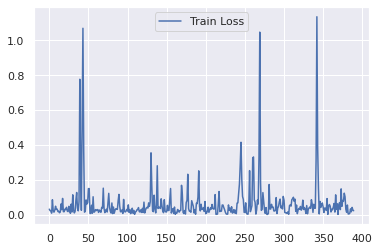

In [ ]:
train_loss =[]
# train_data_X_tensor = torch.tensor(train_data_X)
# train_data_Y_tensor = torch.tensor(train_data_y)
# print(train_data_X_tensor.shape)
num_epoch = 3000
size = int(len(feature_tensor)/10)

for epoch in range(num_epoch):
  for i in range(len(feature_tensor)):
    # segs = np.array(train_data_X[i]).astype("float32").reshape(14, 3, 1)
    # labels = np.array(train_data_y[i]).astype("float32").reshape(1, 1, 1)
    # segs_tensor = torch.tensor(segs)
    # labels_tensor = torch.tensor(labels)
    optimizer.zero_grad()
    # print(segs_tensor.shape)
    temp_feature = Variable(feature_tensor[i])
    # temp_feature = temp_feature.to(device)
    outputs = lstm_model_2(temp_feature)
    # outputs = lstm_model(Variable(feature_tensor[i]))
    # temp_label = Variable(labels_tensor[i]).to(device)
    temp_label = Variable(labels_tensor[i])
    loss = loss_fn(outputs, Variable(temp_label))
    # loss = loss_fn(outputs, Variable(labels_tensor[i]))
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epoch/10)== 0 and i%size==0:
    # if (epoch+1)%(num_epoch/10)== 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    # if (epoch+1)%(num_epoch/10)== 0:
    if (epoch+1)%100 == 0 and i%size==0:
      loss_data_temp = loss.data
      loss_data_temp = loss_data_temp.cpu()
      train_loss.append(loss_data_temp.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

##Test model

In [ ]:
test_data_X[1].shape

torch.Size([10, 14, 253])

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  try:
    segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, 253)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 253)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

8
cannot reshape array of size 3542 into shape (10,14,253)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

48 torch.Size([10, 14, 253])
48 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model_2(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -1.654738 -1.571131
1   -1.554070 -1.571131
2   -1.643362 -1.571131
3   -1.657255 -1.571131
4   -1.866059 -1.571131
..        ...       ...
475  0.622811  0.089605
476  0.859374  0.082065
477  0.861685  0.074845
478  0.800396  0.068090
479  0.798123  0.064753

[480 rows x 2 columns]

##Result

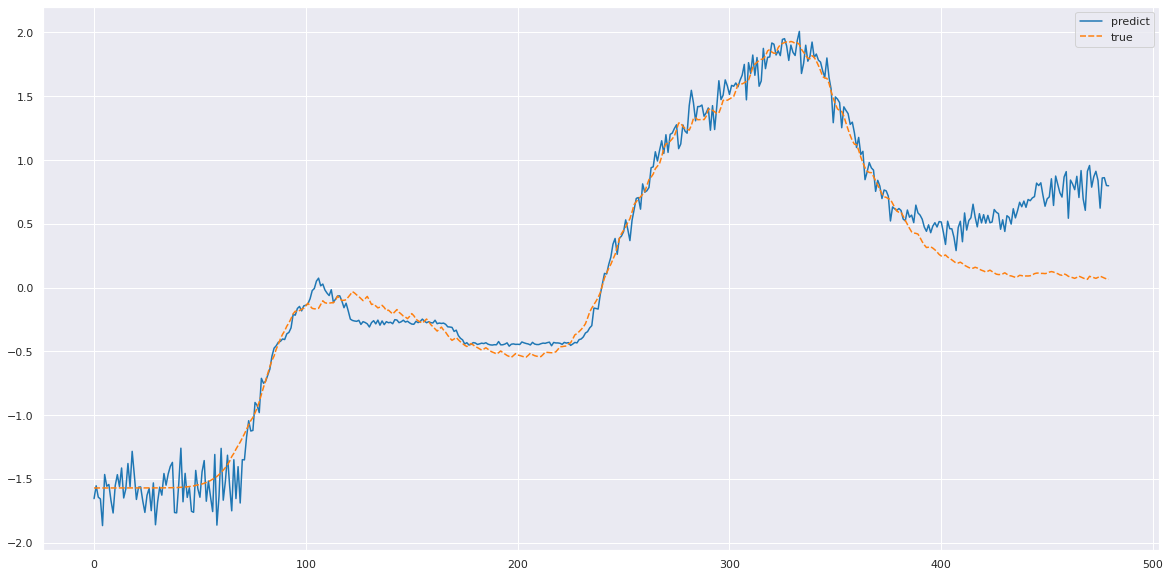

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -1.654738 -1.571131    0.083606
1   -1.554070 -1.571131    0.017062
2   -1.643362 -1.571131    0.072231
3   -1.657255 -1.571131    0.086123
4   -1.866059 -1.571131    0.294928
..        ...       ...         ...
475  0.622811  0.089605    0.533207
476  0.859374  0.082065    0.777309
477  0.861685  0.074845    0.786840
478  0.800396  0.068090    0.732307
479  0.798123  0.064753    0.733370

[480 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  480.000000  480.000000  480.000000
mean     0.138163    0.047321    0.159383
std      1.016644    0.968636    0.194239
min     -1.866059   -1.571131    0.000188
25%     -0.436012   -0.483824    0.038545
50%      0.062385   -0.007741    0.085653
75%      0.840261    0.678256    0.184552
max      2.008497    1.929933    0.868732


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

76.50380582921207
0.15938292881085847


##Save model

In [ ]:
# filename = '2LayerLinear_lstm_model'
filename = '2LayerLinear_lstm_model'
# filename = input()
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
torch.save(lstm_model_2.state_dict(), path1)
torch.save(lstm_model_2, path2)




---


#double lstm(lstm only) datasets 2

## Create New Russia Data

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="Russia"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0         501      01/31/2020  ...     0.0       0.0
1         561      02/01/2020  ...     0.0       0.0
2         633      02/02/2020  ...     0.0       0.0
3         702      02/03/2020  ...     0.0       0.0
4         772      02/04/2020  ...     0.0       0.0
...       ...             ...  ...     ...       ...
30246  306399      05/29/2021  ...  1092.0   42907.0
30247  306401      05/29/2021  ...  2910.0   80119.0
30248  306416      05/29/2021  ...   419.0   37848.0
30249  306418      05/29/2021  ...   605.0   38968.0
30250  306422      05/29/2021  ...   669.0   41650.0

[30251 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                             NaN  ...        0.0     2.0
1          02/01/2020                             NaN  ...        0.0     2.0
2          02/02/2020                             NaN  ...        0.0     2.0
3          02/03/2020                             NaN  ...        0.0     2.0
4          02/04/2020                             NaN  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30129 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate      0
Province/State     122
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30251 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed             ...           Active        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
01/01/2021              11103.0    33124.0  ...           1717.0     NaN
01/02/2021              11184.0    33334.0  ...           1847.0     NaN
01/03/2021              11261.0    33542.0  ...           1781.0     NaN
01/04/2021              11341.0    33748.0  ...           1733.0     NaN
01/05/2021              11420.0    33957.0  ...           1723.0     NaN
...                         ...        ...  ...              ...     ...
12/27/2020              10676.0    32062.0  ...           1797.0     NaN
12/28/2020              10767.0    32276.0  ...           1873.0     NaN
12/29/2020              10856.0    32488.0  ...           1844.0     NaN
12/30/2020              10945.0    32699.0  ...           1713.0     NaN
12/31/2020              11025.0    32912.0  ...           1604.0     NaN

[485 rows x 336 columns]

In [ ]:
new_russia_datasets = russia_datasets
new_russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                         unknown  ...        0.0     2.0
1          02/01/2020                         unknown  ...        0.0     2.0
2          02/02/2020                         unknown  ...        0.0     2.0
3          02/03/2020                         unknown  ...        0.0     2.0
4          02/04/2020                         unknown  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

In [ ]:
russia_active_cases = pd.DataFrame()
russia_active_cases['ObservationDate'] = new_russia_datasets['ObservationDate']
russia_active_cases['Active'] = new_russia_datasets['Active']
russia_active_cases

ObservationDate  Active
0          01/31/2020     2.0
1          02/01/2020     2.0
2          02/02/2020     2.0
3          02/03/2020     2.0
4          02/04/2020     2.0
...               ...     ...
30246      05/29/2021  2024.0
30247      05/29/2021  1643.0
30248      05/29/2021   796.0
30249      05/29/2021  1330.0
30250      05/29/2021   807.0

[30251 rows x 2 columns]

In [ ]:
russia_active_cases = russia_active_cases.groupby(['ObservationDate'],as_index = False).sum()
russia_active_cases["ObservationDate"] = pd.to_datetime(russia_active_cases["ObservationDate"])
russia_active_cases = russia_active_cases.sort_values(['ObservationDate'])
russia_active_cases = russia_active_cases.reset_index(drop=True)
russia_active_cases['ObservationDate'] = russia_active_cases['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_active_cases = russia_active_cases.set_index(russia_active_cases['ObservationDate'])
russia_active_cases = russia_active_cases.drop('ObservationDate', axis=1)
russia_active_cases

Active
ObservationDate          
2020-01-31            2.0
2020-02-01            2.0
2020-02-02            2.0
2020-02-03            2.0
2020-02-04            2.0
...                   ...
2021-05-25       263556.0
2021-05-26       262405.0
2021-05-27       261328.0
2021-05-28       260796.0
2021-05-29       260410.0

[485 rows x 1 columns]

In [ ]:
new_russia_datasets_without_active = new_russia_datasets.iloc[:,:-1]
new_russia_datasets_without_active

ObservationDate                  Province/State  ...  Deaths  Recovered
0          01/31/2020                         unknown  ...     0.0        0.0
1          02/01/2020                         unknown  ...     0.0        0.0
2          02/02/2020                         unknown  ...     0.0        0.0
3          02/03/2020                         unknown  ...     0.0        0.0
4          02/04/2020                         unknown  ...     0.0        0.0
...               ...                             ...  ...     ...        ...
30246      05/29/2021                  Vologda Oblast  ...  1092.0    42907.0
30247      05/29/2021                 Voronezh Oblast  ...  2910.0    80119.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...   419.0    37848.0
30249      05/29/2021                Yaroslavl Oblast  ...   605.0    38968.0
30250      05/29/2021                Zabaykalsky Krai  ...   669.0    41650.0

[30251 rows x 5 columns]

In [ ]:
print(new_russia_datasets_without_active.isnull().sum())
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value="unknown")
print("\nAfter：\n##########")
print(new_russia_datasets_without_active.isnull().sum())

ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

After：
##########
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [ ]:
new_russia_datasets_without_active = new_russia_datasets_without_active.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value=0)
new_russia_datasets_without_active.index = pd.to_datetime(new_russia_datasets_without_active.index)
new_russia_datasets_without_active = new_russia_datasets_without_active.sort_index()
new_russia_datasets_without_active.index = new_russia_datasets_without_active.index.strftime('%Y-%m-%d')
new_russia_datasets_without_active

Confirmed             ...        Recovered        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
2020-01-31                  0.0        0.0  ...              0.0     0.0
2020-02-01                  0.0        0.0  ...              0.0     0.0
2020-02-02                  0.0        0.0  ...              0.0     0.0
2020-02-03                  0.0        0.0  ...              0.0     0.0
2020-02-04                  0.0        0.0  ...              0.0     0.0
...                         ...        ...  ...              ...     ...
2021-05-25              14628.0    51283.0  ...          41544.0     0.0
2021-05-26              14636.0    51343.0  ...          41561.0     0.0
2021-05-27              14645.0    51404.0  ...          41605.0     0.0
2021-05-28              14654.0    51463.0  ...          41627.0     0.0
2021-05-29              14661.0    51521.0  ...          41650.0     0.0

[485 rows x 252 columns]

In [ ]:
new_russia_datasets = new_russia_datasets_without_active
new_russia_datasets['Active'] = russia_active_cases
new_russia_datasets

Confirmed             ... Recovered    Active
Province/State  Adygea Republic Altai Krai  ...   unknown          
ObservationDate                             ...                    
2020-01-31                  0.0        0.0  ...       0.0       2.0
2020-02-01                  0.0        0.0  ...       0.0       2.0
2020-02-02                  0.0        0.0  ...       0.0       2.0
2020-02-03                  0.0        0.0  ...       0.0       2.0
2020-02-04                  0.0        0.0  ...       0.0       2.0
...                         ...        ...  ...       ...       ...
2021-05-25              14628.0    51283.0  ...       0.0  263556.0
2021-05-26              14636.0    51343.0  ...       0.0  262405.0
2021-05-27              14645.0    51404.0  ...       0.0  261328.0
2021-05-28              14654.0    51463.0  ...       0.0  260796.0
2021-05-29              14661.0    51521.0  ...       0.0  260410.0

[485 rows x 253 columns]

In [ ]:
# print(new_russia_datasets.columns.values)

In [ ]:
# print(new_russia_datasets[('Confirmed', 'Adygea Republic')].values)
# print(new_russia_datasets.index.values)

##Create new datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(new_russia_datasets)[:] #not include date
russia_table_columns

[('Confirmed', 'Adygea Republic'),
 ('Confirmed', 'Altai Krai'),
 ('Confirmed', 'Altai Republic'),
 ('Confirmed', 'Amur Oblast'),
 ('Confirmed', 'Arkhangelsk Oblast'),
 ('Confirmed', 'Astrakhan Oblast'),
 ('Confirmed', 'Bashkortostan Republic'),
 ('Confirmed', 'Belgorod Oblast'),
 ('Confirmed', 'Bryansk Oblast'),
 ('Confirmed', 'Buryatia Republic'),
 ('Confirmed', 'Chechen Republic'),
 ('Confirmed', 'Chelyabinsk Oblast'),
 ('Confirmed', 'Chukotka Autonomous Okrug'),
 ('Confirmed', 'Chuvashia Republic'),
 ('Confirmed', 'Dagestan Republic'),
 ('Confirmed', 'Ingushetia Republic'),
 ('Confirmed', 'Irkutsk Oblast'),
 ('Confirmed', 'Ivanovo Oblast'),
 ('Confirmed', 'Jewish Autonomous Okrug'),
 ('Confirmed', 'Kabardino-Balkarian Republic'),
 ('Confirmed', 'Kaliningrad Oblast'),
 ('Confirmed', 'Kalmykia Republic'),
 ('Confirmed', 'Kaluga Oblast'),
 ('Confirmed', 'Kamchatka Krai'),
 ('Confirmed', 'Karachay-Cherkess Republic'),
 ('Confirmed', 'Karelia Republic'),
 ('Confirmed', 'Kemerovo Oblast'

In [ ]:
russia_datasets_overall_training = new_russia_datasets.astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       ...,
       [ 1.50284361,  1.70350292,  1.42207648, ...,  1.69822396,
        -0.22363985,  0.06808957],
       [ 1.50444741,  1.70670828,  1.42465565, ...,  1.69960796,
        -0.22363985,  0.06475252],
       [ 1.50569482,  1.70985931,  1.4275214 , ...,  1.70105486,
        -0.22363985,  0.06233128]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(485, 253)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (471, 14, 253).
trainY shape == (471, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

48 torch.Size([1, 14, 253])
48 torch.Size([1, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(38, 10)

In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0

##Design a new LSTM model

In [ ]:
input_size = 253
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class LSTMNetwork3(nn.Module):
  """
  input_size = 253
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork3, self).__init__()  #繼承

    self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=input_size, num_layers=1, batch_first=True)  #(1, 14, 64)
    self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size) # (1, 14, 64) > (1, 14, 32)
    self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #(1, 14*32)
    self.fc2 = nn.Linear(in_features=1*14*hidden_size, out_features=num_class)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))

    out, (h, c) = self.lstm1(x, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    out = self.fc1(out)
    # print("fc1", out.shape)
    out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model_3 = LSTMNetwork3(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model_3

LSTMNetwork3(
  (lstm1): LSTM(253, 253, batch_first=True)
  (fc1): Linear(in_features=253, out_features=64, bias=True)
  (lstm2): LSTM(64, 64, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=896, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model_3.parameters(), lr=0.001)

## Train model



In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

39 torch.Size([10, 14, 253])
39 torch.Size([10, 1])


In [ ]:
feature_tensor = []
labels_tensor = []
for i in range(len(train_data_X)):
  try:
    segs =np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14 ,input_size)
    # print("seqs",b.shape)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
    # print("labels",labels.shape)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  feature_tensor.append(segs_tensor)
  labels_tensor.append(lab_tensor)

In [ ]:
# feature_tensor

In [ ]:
# print(feature_tensor[0].shape)
# print(labels_tensor[0].shape)
# print(len(feature_tensor))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:100, Batch:1, Loss:0.1338
Epoch:100, Batch:4, Loss:0.0205
Epoch:100, Batch:7, Loss:0.0529
Epoch:100, Batch:10, Loss:0.0093
Epoch:100, Batch:13, Loss:0.0098
Epoch:100, Batch:16, Loss:0.0082
Epoch:100, Batch:19, Loss:0.0179
Epoch:100, Batch:22, Loss:0.0047
Epoch:100, Batch:25, Loss:0.0301
Epoch:100, Batch:28, Loss:0.0282
Epoch:100, Batch:31, Loss:0.0317
Epoch:100, Batch:34, Loss:0.0450
Epoch:100, Batch:37, Loss:0.1692
Epoch:200, Batch:1, Loss:0.0406
Epoch:200, Batch:4, Loss:0.0543
Epoch:200, Batch:7, Loss:0.0537
Epoch:200, Batch:10, Loss:0.0043
Epoch:200, Batch:13, Loss:0.0454
Epoch:200, Batch:16, Loss:0.0234
Epoch:200, Batch:19, Loss:0.0063
Epoch:200, Batch:22, Loss:0.0031
Epoch:200, Batch:25, Loss:0.0895
Epoch:200, Batch:28, Loss:0.0350
Epoch:200, Batch:31, Loss:0.0323
Epoch:200, Batch:34, Loss:0.0536
Epoch:200, Batch:37, Loss:0.0264
Epoch:300, Batch:1, Loss:0.0108
Epoch:300, Batch:4, Loss:0.0272
Epoch:300, Batch:7, Loss:0.0607
Epoch:300, Batch:10, Loss:0.0374
Epoch:300, Batch:13

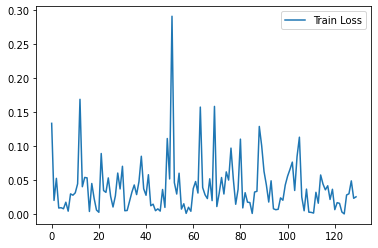

In [ ]:
train_loss =[]
# train_data_X_tensor = torch.tensor(train_data_X)
# train_data_Y_tensor = torch.tensor(train_data_y)
# print(train_data_X_tensor.shape)
num_epoch = 1000
size = int(len(feature_tensor)/10)

for epoch in range(num_epoch):
  for i in range(len(feature_tensor)):
    # segs = np.array(train_data_X[i]).astype("float32").reshape(14, 3, 1)
    # labels = np.array(train_data_y[i]).astype("float32").reshape(1, 1, 1)
    # segs_tensor = torch.tensor(segs)
    # labels_tensor = torch.tensor(labels)
    optimizer.zero_grad()
    # print(segs_tensor.shape)
    temp_feature = Variable(feature_tensor[i])
    # temp_feature = temp_feature.to(device)
    outputs = lstm_model_3(temp_feature)
    # outputs = lstm_model(Variable(feature_tensor[i]))
    # temp_label = Variable(labels_tensor[i]).to(device)
    temp_label = Variable(labels_tensor[i])
    loss = loss_fn(outputs, Variable(temp_label))
    # loss = loss_fn(outputs, Variable(labels_tensor[i]))
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epoch/10)== 0 and i%size==0:
    # if (epoch+1)%(num_epoch/10)== 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    # if (epoch+1)%(num_epoch/10)== 0:
    if (epoch+1)%100 == 0 and i%size==0:
      loss_data_temp = loss.data
      loss_data_temp = loss_data_temp.cpu()
      train_loss.append(loss_data_temp.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

##Test model

In [ ]:
test_data_X[1].shape

torch.Size([10, 14, 253])

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, 253)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

8
cannot reshape array of size 3542 into shape (10,14,253)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

9 torch.Size([10, 14, 253])
9 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model_3(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   0.631255  0.391075
1   0.617441  0.359611
2   0.738306  0.334332
3   0.775651  0.313695
4   0.675693  0.316512
..       ...       ...
85  0.491235  0.089605
86  0.742841  0.082065
87  0.723177  0.074845
88  0.435108  0.068090
89  0.571818  0.064753

[90 rows x 2 columns]

##Result

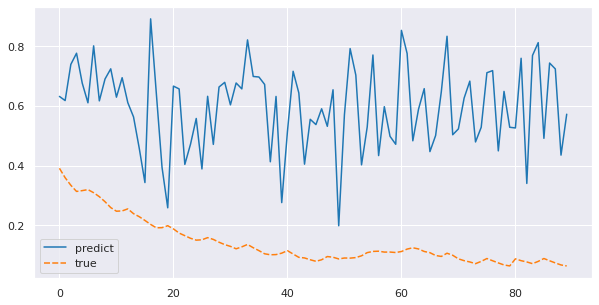

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   0.631255  0.391075    0.240180
1   0.617441  0.359611    0.257830
2   0.738306  0.334332    0.403973
3   0.775651  0.313695    0.461956
4   0.675693  0.316512    0.359181
..       ...       ...         ...
85  0.491235  0.089605    0.401630
86  0.742841  0.082065    0.660776
87  0.723177  0.074845    0.648331
88  0.435108  0.068090    0.367018
89  0.571818  0.064753    0.507065

[90 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

         predict       true  difference
count  90.000000  90.000000   90.000000
mean    0.594926   0.142325    0.452600
std     0.141215   0.077757    0.150518
min     0.199021   0.064753    0.059774
25%     0.498628   0.089605    0.357925
50%     0.616924   0.111114    0.459411
75%     0.692757   0.164303    0.553271
max     0.890491   0.391075    0.739020


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

40.734029442071915
0.4526003271341324


##Load Model

In [ ]:
model_name = input()
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + model_name +'_a.pkl'
# path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
lstm_model_3.load_state_dict(torch.load(path1))

russia_datasest2_2lstmOnly(lr0.0001_epoch1000)


RuntimeError: ignored

##Save model

In [ ]:
filename = 'russia_datasest2_2lstmOnly(lr0.001_epoch1000)'
# filename = input()
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
torch.save(lstm_model_3.state_dict(), path1)
torch.save(lstm_model_3, path2)

# single lstm model

### We choose russia as forecast target

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="Russia"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0         501      01/31/2020  ...     0.0       0.0
1         561      02/01/2020  ...     0.0       0.0
2         633      02/02/2020  ...     0.0       0.0
3         702      02/03/2020  ...     0.0       0.0
4         772      02/04/2020  ...     0.0       0.0
...       ...             ...  ...     ...       ...
30246  306399      05/29/2021  ...  1092.0   42907.0
30247  306401      05/29/2021  ...  2910.0   80119.0
30248  306416      05/29/2021  ...   419.0   37848.0
30249  306418      05/29/2021  ...   605.0   38968.0
30250  306422      05/29/2021  ...   669.0   41650.0

[30251 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                             NaN  ...        0.0     2.0
1          02/01/2020                             NaN  ...        0.0     2.0
2          02/02/2020                             NaN  ...        0.0     2.0
3          02/03/2020                             NaN  ...        0.0     2.0
4          02/04/2020                             NaN  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30129 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate      0
Province/State     122
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30251 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed             ...           Active        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
01/01/2021              11103.0    33124.0  ...           1717.0     NaN
01/02/2021              11184.0    33334.0  ...           1847.0     NaN
01/03/2021              11261.0    33542.0  ...           1781.0     NaN
01/04/2021              11341.0    33748.0  ...           1733.0     NaN
01/05/2021              11420.0    33957.0  ...           1723.0     NaN
...                         ...        ...  ...              ...     ...
12/27/2020              10676.0    32062.0  ...           1797.0     NaN
12/28/2020              10767.0    32276.0  ...           1873.0     NaN
12/29/2020              10856.0    32488.0  ...           1844.0     NaN
12/30/2020              10945.0    32699.0  ...           1713.0     NaN
12/31/2020              11025.0    32912.0  ...           1604.0     NaN

[485 rows x 336 columns]

In [ ]:
# overall_2= overall_df.drop("SNo", axis=1)
# overall_2= overall_2.drop("Last Update", axis=1)
# overall_2 = overall_2[overall_2['Country/Region']=="Russia"]
# overall_2= overall_2.drop("Country/Region", axis=1)
# overall_2 = overall_2.reset_index(drop=True)
# overall_2['Active'] = overall_2['Confirmed'] - overall_2['Deaths'] - overall_2['Recovered']
# y = overall_2.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State').fillna(0)
# y

In [ ]:
print(russia_datasets_2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 485 entries, 01/01/2021 to 12/31/2020
Columns: 336 entries, ('Confirmed', 'Adygea Republic') to ('Active', 'unknown')
dtypes: float64(336)
memory usage: 1.2+ MB
None


In [ ]:
# overall2= overall_df.drop("SNo", axis=1)
# overall2= overall2.drop("Last Update", axis=1)
# overall2 = overall2[overall2['Country/Region']=="Russia"]
# overall2= overall2.drop("Province/State", axis=1)
# overall2= overall2.drop("Country/Region", axis=1)
# overall2 = overall2.reset_index(drop=True)
# overall2['Active'] = overall2['Confirmed'] - overall2['Deaths'] - overall2['Recovered']
# overall2

In [ ]:
print(len(russia_datasets['ObservationDate'].unique()), "days data collected")

485 days data collected


In [ ]:
russia_datasets_overall = russia_datasets.groupby(['ObservationDate'],as_index = False).sum()
russia_datasets_overall

ObservationDate  Confirmed   Deaths  Recovered    Active
0        01/01/2021  3153960.0  56798.0  2553467.0  543695.0
1        01/02/2021  3179898.0  57235.0  2572279.0  550384.0
2        01/03/2021  3203743.0  57730.0  2591937.0  554076.0
3        01/04/2021  3226758.0  58203.0  2612934.0  555621.0
4        01/05/2021  3250713.0  58706.0  2635242.0  556765.0
..              ...        ...      ...        ...       ...
480      12/27/2020  3019972.0  54080.0  2426094.0  539798.0
481      12/28/2020  3047335.0  54559.0  2446412.0  546364.0
482      12/29/2020  3073923.0  55107.0  2470783.0  548033.0
483      12/30/2020  3100018.0  55692.0  2499465.0  544861.0
484      12/31/2020  3127347.0  56271.0  2527722.0  543354.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall["ObservationDate"] = pd.to_datetime(russia_datasets_overall["ObservationDate"])
russia_datasets_overall = russia_datasets_overall.sort_values(['ObservationDate'])
russia_datasets_overall = russia_datasets_overall.reset_index(drop=True)
russia_datasets_overall

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4960174.0  117197.0  4579421.0  263556.0
481      2021-05-26  4968421.0  117595.0  4588421.0  262405.0
482      2021-05-27  4977332.0  117990.0  4598014.0  261328.0
483      2021-05-28  4986458.0  118386.0  4607276.0  260796.0
484      2021-05-29  4995613.0  118781.0  4616422.0  260410.0

[485 rows x 5 columns]

In [ ]:
russia_datasets_overall_forDemo =  russia_datasets_overall
russia_datasets_overall_forDemo['ObservationDate'] = russia_datasets_overall_forDemo['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered    Active
0        2020-01-31        2.0       0.0        0.0       2.0
1        2020-02-01        2.0       0.0        0.0       2.0
2        2020-02-02        2.0       0.0        0.0       2.0
3        2020-02-03        2.0       0.0        0.0       2.0
4        2020-02-04        2.0       0.0        0.0       2.0
..              ...        ...       ...        ...       ...
480      2021-05-25  4960174.0  117197.0  4579421.0  263556.0
481      2021-05-26  4968421.0  117595.0  4588421.0  262405.0
482      2021-05-27  4977332.0  117990.0  4598014.0  261328.0
483      2021-05-28  4986458.0  118386.0  4607276.0  260796.0
484      2021-05-29  4995613.0  118781.0  4616422.0  260410.0

[485 rows x 5 columns]

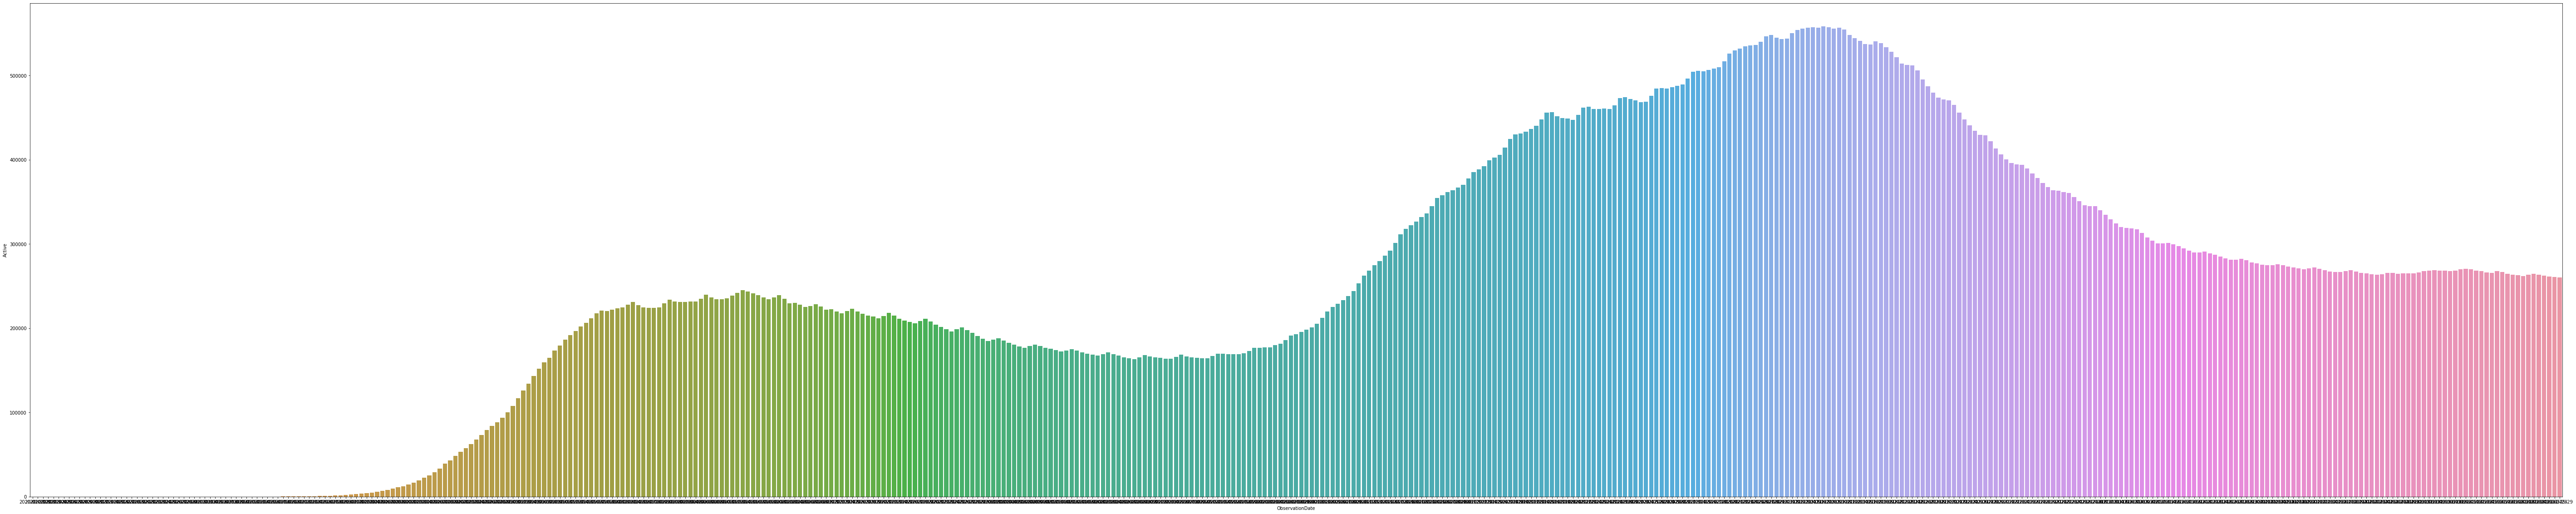

In [ ]:
plt.figure(figsize=(100,20))
sns.barplot(data=russia_datasets_overall_forDemo, x="ObservationDate", y='Active')
plt.show()

In [ ]:
next_day_cases = russia_datasets_overall_forDemo['Active'][1:]
next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Active")
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo.drop("Active", axis=1)
russia_datasets_overall_forDemo = pd.concat([russia_datasets_overall_forDemo, next_day_cases], axis=1)
russia_datasets_overall_forDemo = russia_datasets_overall_forDemo[:-1]
russia_datasets_overall_forDemo

ObservationDate  Confirmed    Deaths  Recovered  Next_Day_Active
0        2020-01-31        2.0       0.0        0.0              2.0
1        2020-02-01        2.0       0.0        0.0              2.0
2        2020-02-02        2.0       0.0        0.0              2.0
3        2020-02-03        2.0       0.0        0.0              2.0
4        2020-02-04        2.0       0.0        0.0              2.0
..              ...        ...       ...        ...              ...
479      2021-05-24  4952412.0  116812.0  4570842.0         263556.0
480      2021-05-25  4960174.0  117197.0  4579421.0         262405.0
481      2021-05-26  4968421.0  117595.0  4588421.0         261328.0
482      2021-05-27  4977332.0  117990.0  4598014.0         260796.0
483      2021-05-28  4986458.0  118386.0  4607276.0         260410.0

[484 rows x 5 columns]

### Create Datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(russia_datasets_overall_forDemo)[1:] #not include date
russia_table_columns

['Confirmed', 'Deaths', 'Recovered', 'Next_Day_Active']

In [ ]:
# russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)

In [ ]:
# russia_datasets_overall_training

In [ ]:
russia_datasets_overall_training = russia_datasets_overall_forDemo[russia_table_columns].astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

array([[-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       [-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       [-1.10388224, -0.99062709, -1.01772569, -1.57676691],
       ...,
       [ 1.76415887,  2.09968277,  1.85747044,  0.06494239],
       [ 1.76930278,  2.11006308,  1.8634816 ,  0.06160025],
       [ 1.7745708 ,  2.12046967,  1.86928536,  0.05917531]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(484, 4)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (470, 14, 4).
trainY shape == (470, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

47 torch.Size([10, 14, 4])
47 torch.Size([10, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(37, 10)

In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

print(len(test_data_X), test_data_X[0].shape)
print(len(test_data_y), test_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])
9 torch.Size([10, 14, 4])
9 torch.Size([10, 1])


In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768]],

        [[-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-1.1039, -0.9906, -1.0177, -1.5768],
         [-

##Design a new LSTM model

In [ ]:
input_size = 4
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class LSTMNetwork3(nn.Module):
  """
  input_size = 4
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork3, self).__init__()  #繼承

    self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=input_size, num_layers=1, batch_first=True)  #(1, 14, 64)
    # self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size) # (1, 14, 64) > (1, 14, 32)
    # self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #(1, 14*32)
    self.fc2 = nn.Linear(in_features=1*14*input_size, out_features=num_class)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    # h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    # c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))

    out, (h, c) = self.lstm1(x, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    # out = self.fc1(out)
    # print("fc1", out.shape)
    # out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model_3 = LSTMNetwork3(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model_3

LSTMNetwork3(
  (lstm1): LSTM(4, 4, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=56, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model_3.parameters(), lr=0.001)

## Train model



In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

38 torch.Size([10, 14, 4])
38 torch.Size([10, 1])


In [ ]:
feature_tensor = []
labels_tensor = []
for i in range(len(train_data_X)):
  try:
    segs =np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14 ,4)
    # print("seqs",b.shape)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
    # print("labels",labels.shape)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  feature_tensor.append(segs_tensor)
  labels_tensor.append(lab_tensor)

In [ ]:
# feature_tensor

In [ ]:
# print(feature_tensor[0].shape)
# print(labels_tensor[0].shape)
# print(len(feature_tensor))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:150, Batch:1, Loss:0.0167
Epoch:150, Batch:4, Loss:0.0084
Epoch:150, Batch:7, Loss:0.0268
Epoch:150, Batch:10, Loss:0.0075
Epoch:150, Batch:13, Loss:0.0014
Epoch:150, Batch:16, Loss:0.0026
Epoch:150, Batch:19, Loss:0.0048
Epoch:150, Batch:22, Loss:0.0019
Epoch:150, Batch:25, Loss:0.0363
Epoch:150, Batch:28, Loss:0.0142
Epoch:150, Batch:31, Loss:0.0110
Epoch:150, Batch:34, Loss:0.0228
Epoch:150, Batch:37, Loss:0.0161
Epoch:300, Batch:1, Loss:0.0184
Epoch:300, Batch:4, Loss:0.0141
Epoch:300, Batch:7, Loss:0.0328
Epoch:300, Batch:10, Loss:0.0126
Epoch:300, Batch:13, Loss:0.0032
Epoch:300, Batch:16, Loss:0.0037
Epoch:300, Batch:19, Loss:0.0128
Epoch:300, Batch:22, Loss:0.0091
Epoch:300, Batch:25, Loss:0.0309
Epoch:300, Batch:28, Loss:0.0186
Epoch:300, Batch:31, Loss:0.0179
Epoch:300, Batch:34, Loss:0.0223
Epoch:300, Batch:37, Loss:0.0162
Epoch:450, Batch:1, Loss:0.0581
Epoch:450, Batch:4, Loss:0.0237
Epoch:450, Batch:7, Loss:0.0221
Epoch:450, Batch:10, Loss:0.0072
Epoch:450, Batch:13

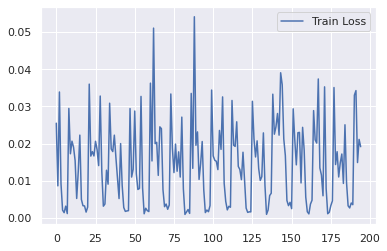

In [ ]:
train_loss =[]
# train_data_X_tensor = torch.tensor(train_data_X)
# train_data_Y_tensor = torch.tensor(train_data_y)
# print(train_data_X_tensor.shape)
num_epoch = 1500
size = int(len(feature_tensor)/10)

for epoch in range(num_epoch):
  for i in range(len(feature_tensor)):
    # segs = np.array(train_data_X[i]).astype("float32").reshape(14, 3, 1)
    # labels = np.array(train_data_y[i]).astype("float32").reshape(1, 1, 1)
    # segs_tensor = torch.tensor(segs)
    # labels_tensor = torch.tensor(labels)
    optimizer.zero_grad()
    # print(segs_tensor.shape)
    temp_feature = Variable(feature_tensor[i])
    # temp_feature = temp_feature.to(device)
    outputs = lstm_model_3(temp_feature)
    # outputs = lstm_model(Variable(feature_tensor[i]))
    # temp_label = Variable(labels_tensor[i]).to(device)
    temp_label = Variable(labels_tensor[i])
    loss = loss_fn(outputs, Variable(temp_label))
    # loss = loss_fn(outputs, Variable(labels_tensor[i]))
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epoch/10)== 0 and i%size==0:
    # if (epoch+1)%(num_epoch/10)== 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    # if (epoch+1)%(num_epoch/10)== 0:
    if (epoch+1)%100 == 0 and i%size==0:
      loss_data_temp = loss.data
      loss_data_temp = loss_data_temp.cpu()
      train_loss.append(loss_data_temp.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

##Test model

In [ ]:
test_data_X[1].shape

torch.Size([10, 14, 4])

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, input_size)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

9 torch.Size([10, 14, 4])
9 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model_3(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   0.503142  0.588264
1   0.597213  0.558568
2   0.520048  0.524494
3   0.515291  0.492706
4   0.645698  0.462124
..       ...       ...
85  0.401586  0.078939
86  0.349996  0.071708
87  0.443871  0.064942
88  0.213816  0.061600
89  0.162173  0.059175

[90 rows x 2 columns]

##Result

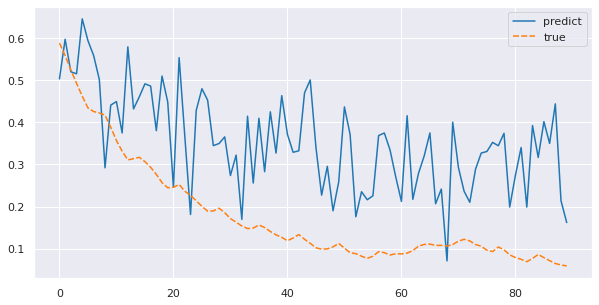

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   0.503142  0.588264    0.085122
1   0.597213  0.558568    0.038645
2   0.520048  0.524494    0.004445
3   0.515291  0.492706    0.022586
4   0.645698  0.462124    0.183574
..       ...       ...         ...
85  0.401586  0.078939    0.322647
86  0.349996  0.071708    0.278288
87  0.443871  0.064942    0.378929
88  0.213816  0.061600    0.152216
89  0.162173  0.059175    0.102998

[90 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

         predict       true  difference
count  90.000000  90.000000   90.000000
mean    0.355670   0.179685    0.182541
std     0.116917   0.127135    0.090831
min     0.071144   0.059175    0.000224
25%     0.271569   0.093965    0.119089
50%     0.349871   0.118737    0.179312
75%     0.439861   0.234043    0.257620
max     0.645698   0.588264    0.387778


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

16.42866264283657
0.18254069603151746


##Save model

In [ ]:
# filename = 'single_lstm_datasets2(lr0.001_epoch3000)'
filename = input()
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
torch.save(lstm_model_3.state_dict(), path1)
torch.save(lstm_model_3, path2)

# single lstm model(dataset 2)

## Create New Russia Data

In [ ]:
russia_datasets = overall_df[overall_df['Country/Region']=="Russia"]
russia_datasets = russia_datasets.reset_index(drop=True)
russia_datasets

SNo ObservationDate  ...  Deaths Recovered
0         501      01/31/2020  ...     0.0       0.0
1         561      02/01/2020  ...     0.0       0.0
2         633      02/02/2020  ...     0.0       0.0
3         702      02/03/2020  ...     0.0       0.0
4         772      02/04/2020  ...     0.0       0.0
...       ...             ...  ...     ...       ...
30246  306399      05/29/2021  ...  1092.0   42907.0
30247  306401      05/29/2021  ...  2910.0   80119.0
30248  306416      05/29/2021  ...   419.0   37848.0
30249  306418      05/29/2021  ...   605.0   38968.0
30250  306422      05/29/2021  ...   669.0   41650.0

[30251 rows x 8 columns]

drop unwanted column and add "active cases" column

In [ ]:
russia_datasets= russia_datasets.drop("SNo", axis=1)
russia_datasets= russia_datasets.drop("Last Update", axis=1)
russia_datasets= russia_datasets.drop("Country/Region", axis=1)
russia_datasets['Active'] = russia_datasets['Confirmed'] - russia_datasets['Deaths'] - russia_datasets['Recovered']
russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                             NaN  ...        0.0     2.0
1          02/01/2020                             NaN  ...        0.0     2.0
2          02/02/2020                             NaN  ...        0.0     2.0
3          02/03/2020                             NaN  ...        0.0     2.0
4          02/04/2020                             NaN  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

how many null value

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30129 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate      0
Province/State     122
Confirmed            0
Deaths               0
Recovered            0
Active               0
dtype: int64


repalce null value with "unknown"

In [ ]:
russia_datasets = russia_datasets.fillna(value="unknown")

In [ ]:
print(russia_datasets.info())
print(russia_datasets.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30251 entries, 0 to 30250
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ObservationDate  30251 non-null  object 
 1   Province/State   30251 non-null  object 
 2   Confirmed        30251 non-null  float64
 3   Deaths           30251 non-null  float64
 4   Recovered        30251 non-null  float64
 5   Active           30251 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.4+ MB
None
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
Active             0
dtype: int64


In [ ]:
russia_datasets_2 = russia_datasets.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
russia_datasets_2

Confirmed             ...           Active        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
01/01/2021              11103.0    33124.0  ...           1717.0     NaN
01/02/2021              11184.0    33334.0  ...           1847.0     NaN
01/03/2021              11261.0    33542.0  ...           1781.0     NaN
01/04/2021              11341.0    33748.0  ...           1733.0     NaN
01/05/2021              11420.0    33957.0  ...           1723.0     NaN
...                         ...        ...  ...              ...     ...
12/27/2020              10676.0    32062.0  ...           1797.0     NaN
12/28/2020              10767.0    32276.0  ...           1873.0     NaN
12/29/2020              10856.0    32488.0  ...           1844.0     NaN
12/30/2020              10945.0    32699.0  ...           1713.0     NaN
12/31/2020              11025.0    32912.0  ...           1604.0     NaN

[485 rows x 336 columns]

In [ ]:
new_russia_datasets = russia_datasets
new_russia_datasets

ObservationDate                  Province/State  ...  Recovered  Active
0          01/31/2020                         unknown  ...        0.0     2.0
1          02/01/2020                         unknown  ...        0.0     2.0
2          02/02/2020                         unknown  ...        0.0     2.0
3          02/03/2020                         unknown  ...        0.0     2.0
4          02/04/2020                         unknown  ...        0.0     2.0
...               ...                             ...  ...        ...     ...
30246      05/29/2021                  Vologda Oblast  ...    42907.0  2024.0
30247      05/29/2021                 Voronezh Oblast  ...    80119.0  1643.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...    37848.0   796.0
30249      05/29/2021                Yaroslavl Oblast  ...    38968.0  1330.0
30250      05/29/2021                Zabaykalsky Krai  ...    41650.0   807.0

[30251 rows x 6 columns]

In [ ]:
russia_active_cases = pd.DataFrame()
russia_active_cases['ObservationDate'] = new_russia_datasets['ObservationDate']
russia_active_cases['Active'] = new_russia_datasets['Active']
russia_active_cases

ObservationDate  Active
0          01/31/2020     2.0
1          02/01/2020     2.0
2          02/02/2020     2.0
3          02/03/2020     2.0
4          02/04/2020     2.0
...               ...     ...
30246      05/29/2021  2024.0
30247      05/29/2021  1643.0
30248      05/29/2021   796.0
30249      05/29/2021  1330.0
30250      05/29/2021   807.0

[30251 rows x 2 columns]

In [ ]:
russia_active_cases = russia_active_cases.groupby(['ObservationDate'],as_index = False).sum()
russia_active_cases["ObservationDate"] = pd.to_datetime(russia_active_cases["ObservationDate"])
russia_active_cases = russia_active_cases.sort_values(['ObservationDate'])
russia_active_cases = russia_active_cases.reset_index(drop=True)
russia_active_cases['ObservationDate'] = russia_active_cases['ObservationDate'].dt.strftime('%Y-%m-%d')
russia_active_cases = russia_active_cases.set_index(russia_active_cases['ObservationDate'])
russia_active_cases = russia_active_cases.drop('ObservationDate', axis=1)
russia_active_cases

Active
ObservationDate          
2020-01-31            2.0
2020-02-01            2.0
2020-02-02            2.0
2020-02-03            2.0
2020-02-04            2.0
...                   ...
2021-05-25       263556.0
2021-05-26       262405.0
2021-05-27       261328.0
2021-05-28       260796.0
2021-05-29       260410.0

[485 rows x 1 columns]

In [ ]:
new_russia_datasets_without_active = new_russia_datasets.iloc[:,:-1]
new_russia_datasets_without_active

ObservationDate                  Province/State  ...  Deaths  Recovered
0          01/31/2020                         unknown  ...     0.0        0.0
1          02/01/2020                         unknown  ...     0.0        0.0
2          02/02/2020                         unknown  ...     0.0        0.0
3          02/03/2020                         unknown  ...     0.0        0.0
4          02/04/2020                         unknown  ...     0.0        0.0
...               ...                             ...  ...     ...        ...
30246      05/29/2021                  Vologda Oblast  ...  1092.0    42907.0
30247      05/29/2021                 Voronezh Oblast  ...  2910.0    80119.0
30248      05/29/2021  Yamalo-Nenets Autonomous Okrug  ...   419.0    37848.0
30249      05/29/2021                Yaroslavl Oblast  ...   605.0    38968.0
30250      05/29/2021                Zabaykalsky Krai  ...   669.0    41650.0

[30251 rows x 5 columns]

In [ ]:
print(new_russia_datasets_without_active.isnull().sum())
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value="unknown")
print("\nAfter：\n##########")
print(new_russia_datasets_without_active.isnull().sum())

ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

After：
##########
ObservationDate    0
Province/State     0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64


In [ ]:
new_russia_datasets_without_active = new_russia_datasets_without_active.groupby(['ObservationDate','Province/State'],as_index = False).sum().pivot('ObservationDate','Province/State')
new_russia_datasets_without_active = new_russia_datasets_without_active.fillna(value=0)
new_russia_datasets_without_active.index = pd.to_datetime(new_russia_datasets_without_active.index)
new_russia_datasets_without_active = new_russia_datasets_without_active.sort_index()
new_russia_datasets_without_active.index = new_russia_datasets_without_active.index.strftime('%Y-%m-%d')
new_russia_datasets_without_active

Confirmed             ...        Recovered        
Province/State  Adygea Republic Altai Krai  ... Zabaykalsky Krai unknown
ObservationDate                             ...                         
2020-01-31                  0.0        0.0  ...              0.0     0.0
2020-02-01                  0.0        0.0  ...              0.0     0.0
2020-02-02                  0.0        0.0  ...              0.0     0.0
2020-02-03                  0.0        0.0  ...              0.0     0.0
2020-02-04                  0.0        0.0  ...              0.0     0.0
...                         ...        ...  ...              ...     ...
2021-05-25              14628.0    51283.0  ...          41544.0     0.0
2021-05-26              14636.0    51343.0  ...          41561.0     0.0
2021-05-27              14645.0    51404.0  ...          41605.0     0.0
2021-05-28              14654.0    51463.0  ...          41627.0     0.0
2021-05-29              14661.0    51521.0  ...          41650.0     0.0

[485 rows x 252 columns]

In [ ]:
new_russia_datasets = new_russia_datasets_without_active
new_russia_datasets['Active'] = russia_active_cases
new_russia_datasets

Confirmed             ... Recovered    Active
Province/State  Adygea Republic Altai Krai  ...   unknown          
ObservationDate                             ...                    
2020-01-31                  0.0        0.0  ...       0.0       2.0
2020-02-01                  0.0        0.0  ...       0.0       2.0
2020-02-02                  0.0        0.0  ...       0.0       2.0
2020-02-03                  0.0        0.0  ...       0.0       2.0
2020-02-04                  0.0        0.0  ...       0.0       2.0
...                         ...        ...  ...       ...       ...
2021-05-25              14628.0    51283.0  ...       0.0  263556.0
2021-05-26              14636.0    51343.0  ...       0.0  262405.0
2021-05-27              14645.0    51404.0  ...       0.0  261328.0
2021-05-28              14654.0    51463.0  ...       0.0  260796.0
2021-05-29              14661.0    51521.0  ...       0.0  260410.0

[485 rows x 253 columns]

In [ ]:
# print(new_russia_datasets.columns.values)

In [ ]:
# print(new_russia_datasets[('Confirmed', 'Adygea Republic')].values)
# print(new_russia_datasets.index.values)

##Create new datasets

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
russia_table_columns = list(new_russia_datasets)[:] #not include date
russia_table_columns

[('Confirmed', 'Adygea Republic'),
 ('Confirmed', 'Altai Krai'),
 ('Confirmed', 'Altai Republic'),
 ('Confirmed', 'Amur Oblast'),
 ('Confirmed', 'Arkhangelsk Oblast'),
 ('Confirmed', 'Astrakhan Oblast'),
 ('Confirmed', 'Bashkortostan Republic'),
 ('Confirmed', 'Belgorod Oblast'),
 ('Confirmed', 'Bryansk Oblast'),
 ('Confirmed', 'Buryatia Republic'),
 ('Confirmed', 'Chechen Republic'),
 ('Confirmed', 'Chelyabinsk Oblast'),
 ('Confirmed', 'Chukotka Autonomous Okrug'),
 ('Confirmed', 'Chuvashia Republic'),
 ('Confirmed', 'Dagestan Republic'),
 ('Confirmed', 'Ingushetia Republic'),
 ('Confirmed', 'Irkutsk Oblast'),
 ('Confirmed', 'Ivanovo Oblast'),
 ('Confirmed', 'Jewish Autonomous Okrug'),
 ('Confirmed', 'Kabardino-Balkarian Republic'),
 ('Confirmed', 'Kaliningrad Oblast'),
 ('Confirmed', 'Kalmykia Republic'),
 ('Confirmed', 'Kaluga Oblast'),
 ('Confirmed', 'Kamchatka Krai'),
 ('Confirmed', 'Karachay-Cherkess Republic'),
 ('Confirmed', 'Karelia Republic'),
 ('Confirmed', 'Kemerovo Oblast'

In [ ]:
russia_datasets_overall_training = new_russia_datasets.astype(float)
scaler = StandardScaler()
scaler = scaler.fit(russia_datasets_overall_training)
russia_datasets_overall_training_scaled = scaler.transform(russia_datasets_overall_training)
russia_datasets_overall_training_scaled

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       [-1.10690427, -1.08917723, -1.0119438 , ..., -0.91909806,
        -0.22363985, -1.57111877],
       ...,
       [ 1.50284361,  1.70350292,  1.42207648, ...,  1.69822396,
        -0.22363985,  0.06808957],
       [ 1.50444741,  1.70670828,  1.42465565, ...,  1.69960796,
        -0.22363985,  0.06475252],
       [ 1.50569482,  1.70985931,  1.4275214 , ...,  1.70105486,
        -0.22363985,  0.06233128]])

In [ ]:
print(russia_datasets_overall_training_scaled.shape)

(485, 253)


In [ ]:
trainX = []
trainY = []
n_future = 1
n_past = 14
batch_size = 10

In [ ]:
for i in range(n_past, len(russia_datasets_overall_training_scaled) - n_future +1): #(14, 484-1+1)
  # train x is to store the 14 past days
  trainX.append(russia_datasets_overall_training_scaled[i - n_past:i, 0:russia_datasets_overall_training.shape[1]]) #([i-14 : i, 0:4]); ([0 : 14, 0:4]), ([1 : 15, 0:4])
  #train y is for the prediction that we want (the next day or the 15th day)
  # 0 means we want to pred the first cols, which is confirmed category
  trainY.append(russia_datasets_overall_training_scaled[i + n_future - 1:i + n_future, -1])  #([i +1-1 :i + 1, 0])(14:15, -1)

In [ ]:
trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
# trainX

In [ ]:
# trainY

In [ ]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (471, 14, 253).
trainY shape == (471, 1).


If we want only use russia dataset to train test

In [ ]:
import torch.utils.data as Data

In [ ]:
trainX = Data.DataLoader(
                dataset= trainX,
                batch_size = batch_size,
                shuffle = False
                )

trainY = Data.DataLoader(
                dataset= trainY,
                batch_size = batch_size,
                shuffle = False
                )

In [ ]:
for i,(seqs) in enumerate(trainX):
  pass
print(len(trainX), seqs.shape)

for i,(seqs) in enumerate(trainY):
  pass
print(len(trainY), seqs.shape)

48 torch.Size([1, 14, 253])
48 torch.Size([1, 1])


In [ ]:
train_data_X = []
test_data_X = []
train_data_y = []
test_data_y = []

training_size=int(len(trainX)*0.8)
test_size=len(trainX)-training_size

for i, (seqs) in enumerate(trainX):
  if i > (training_size):
    test_data_X.append(seqs)
  else:
    train_data_X.append(seqs)

for i, (seqs) in enumerate(trainY):
  if i > (training_size):
    test_data_y.append(seqs)
  else:
    train_data_y.append(seqs)


# train_data_X, test_data_X  = trainX[0:training_size, :, :], trainX[training_size:len(russia_datasets_overall_training_scaled), : , :n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled), : , :1]

In [ ]:
# training_size=int(len(russia_datasets_overall_training_scaled)*0.8)
# test_size=len(russia_datasets_overall_training_scaled)-training_size


# train_data_X, test_data_X  = trainX[0:training_size,:], trainX[training_size:len(russia_datasets_overall_training_scaled),:n_past]
# train_data_y, test_data_y = trainY[0:training_size,:], trainY[training_size:len(russia_datasets_overall_training_scaled),:1]

In [ ]:
training_size,test_size

(38, 10)

In [ ]:
print(train_data_X[0])
print(train_data_y[0])
print("==============================")
print(test_data_X[0])
print(test_data_y[0])

tensor([[[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         ...,
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2235, -1.5711]],

        [[-1.1069, -1.0892, -1.0119,  ..., -0.9191, -0.2236, -1.5711],
         [-1.1069, -1.0892, -1.0119,  ..., -0

##Design a new LSTM model

In [ ]:
input_size = 253
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
class LSTMNetwork3(nn.Module):
  """
  input_size = 253
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork3, self).__init__()  #繼承

    self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=input_size, num_layers=1, batch_first=True)  #(1, 14, 64)
    # self.fc1 = nn.Linear(in_features=input_size, out_features=hidden_size) # (1, 14, 64) > (1, 14, 32)
    # self.lstm2 = nn.LSTM(input_size=hidden_size, hidden_size=hidden_size, num_layers=1, batch_first=True)#(1, 14, 32)
    self.dropout = nn.Dropout(0.2, inplace=False)  #(1, 14, 32)
    self.flatten = nn.Flatten()  #(1, 14*32)
    self.fc2 = nn.Linear(in_features=1*14*input_size, out_features=num_class)

    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    # self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    # self.relu = nn.ReLU(inplace=True)
    # self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    # self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    # self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    # self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    c0_1 = Variable(torch.zeros(num_layers, x.size(0), input_size, device=x.device))
    # h0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))
    # c0_2 = Variable(torch.zeros(num_layers, x.size(0), hidden_size, device=x.device))

    out, (h, c) = self.lstm1(x, (h0_1, c0_1))
    # Maybe it need to add "F.relu()" function ?? @No need, relun is one type of nomalization
    # print("lstm1", out.shape)
    # out = self.fc1(out)
    # print("fc1", out.shape)
    # out, (h2, c2) = self.lstm2(out, (h0_2, c0_2))
    # print("lstm2", out.shape)
    out = self.dropout(out)
    # print(out.shape)
    out = self.flatten(out)
    # print("flatten", out.shape)
    # print(out.shape)
    out = self.fc2(out)
    # print("fc2", out.shape)
    return out

In [ ]:
lstm_model_3 = LSTMNetwork3(input_size=input_size, hidden_size=hidden_size, num_layer=num_layers, num_class=num_class).to(device)
# lstm_model.cuda()  #send to GPU
lstm_model_3

LSTMNetwork3(
  (lstm1): LSTM(253, 253, batch_first=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc2): Linear(in_features=3542, out_features=1, bias=True)
)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(lstm_model_3.parameters(), lr=0.001)

## Train model



In [ ]:
print(len(train_data_X), train_data_X[0].shape)
print(len(train_data_y), train_data_y[0].shape)

39 torch.Size([10, 14, 253])
39 torch.Size([10, 1])


In [ ]:
feature_tensor = []
labels_tensor = []
for i in range(len(train_data_X)):
  try:
    segs =np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14 ,input_size)
    # print("seqs",b.shape)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
    # print("labels",labels.shape)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  feature_tensor.append(segs_tensor)
  labels_tensor.append(lab_tensor)

In [ ]:
# feature_tensor

In [ ]:
# print(feature_tensor[0].shape)
# print(labels_tensor[0].shape)
# print(len(feature_tensor))

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([10, 1, 1])) that is different to the input size (torch.Size([10, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:150, Batch:1, Loss:0.1277
Epoch:150, Batch:4, Loss:0.0412
Epoch:150, Batch:7, Loss:0.0922
Epoch:150, Batch:10, Loss:0.0230
Epoch:150, Batch:13, Loss:0.1042
Epoch:150, Batch:16, Loss:0.0022
Epoch:150, Batch:19, Loss:0.0035
Epoch:150, Batch:22, Loss:0.0052
Epoch:150, Batch:25, Loss:0.0272
Epoch:150, Batch:28, Loss:0.0288
Epoch:150, Batch:31, Loss:0.0730
Epoch:150, Batch:34, Loss:0.0324
Epoch:150, Batch:37, Loss:0.0587
Epoch:300, Batch:1, Loss:0.2294
Epoch:300, Batch:4, Loss:0.0789
Epoch:300, Batch:7, Loss:0.1592
Epoch:300, Batch:10, Loss:0.0140
Epoch:300, Batch:13, Loss:0.0071
Epoch:300, Batch:16, Loss:0.0244
Epoch:300, Batch:19, Loss:0.0584
Epoch:300, Batch:22, Loss:0.0438
Epoch:300, Batch:25, Loss:0.0337
Epoch:300, Batch:28, Loss:0.0550
Epoch:300, Batch:31, Loss:0.0864
Epoch:300, Batch:34, Loss:0.1660
Epoch:300, Batch:37, Loss:0.0638
Epoch:450, Batch:1, Loss:0.0251
Epoch:450, Batch:4, Loss:0.0209
Epoch:450, Batch:7, Loss:0.0473
Epoch:450, Batch:10, Loss:0.0248
Epoch:450, Batch:13

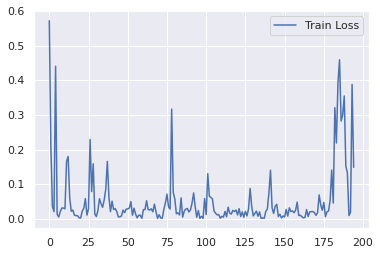

In [ ]:
train_loss =[]
# train_data_X_tensor = torch.tensor(train_data_X)
# train_data_Y_tensor = torch.tensor(train_data_y)
# print(train_data_X_tensor.shape)
num_epoch = 1500
size = int(len(feature_tensor)/10)

for epoch in range(num_epoch):
  for i in range(len(feature_tensor)):
    # segs = np.array(train_data_X[i]).astype("float32").reshape(14, 3, 1)
    # labels = np.array(train_data_y[i]).astype("float32").reshape(1, 1, 1)
    # segs_tensor = torch.tensor(segs)
    # labels_tensor = torch.tensor(labels)
    optimizer.zero_grad()
    # print(segs_tensor.shape)
    temp_feature = Variable(feature_tensor[i])
    # temp_feature = temp_feature.to(device)
    outputs = lstm_model_3(temp_feature)
    # outputs = lstm_model(Variable(feature_tensor[i]))
    # temp_label = Variable(labels_tensor[i]).to(device)
    temp_label = Variable(labels_tensor[i])
    loss = loss_fn(outputs, Variable(temp_label))
    # loss = loss_fn(outputs, Variable(labels_tensor[i]))
    loss.backward()
    optimizer.step()

    if (epoch+1)%(num_epoch/10)== 0 and i%size==0:
    # if (epoch+1)%(num_epoch/10)== 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    # if (epoch+1)%(num_epoch/10)== 0:
    if (epoch+1)%100 == 0 and i%size==0:
      loss_data_temp = loss.data
      loss_data_temp = loss_data_temp.cpu()
      train_loss.append(loss_data_temp.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

##Test model

In [ ]:
test_data_X[1].shape

torch.Size([10, 14, 253])

In [ ]:
test_feature_tensor=[]
test_labels_tensor=[]

for i in range(len(train_data_X)):
  try:
    segs = np.array(train_data_X[i]).astype("float32").reshape(batch_size, 14, input_size)
    labels = np.array(train_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

for i in range(len(test_data_X)):
  try:
    segs = np.array(test_data_X[i]).astype("float32").reshape(batch_size, 14, input_size)
    labels = np.array(test_data_y[i]).astype("float32").reshape(batch_size, 1, 1)
  except Exception as e:
    print(i)
    print(e)
  segs_tensor = torch.tensor(segs)
  segs_tensor = segs_tensor.to(device)
  # segs_tensor = segs_tensor.cuda()
  lab_tensor = torch.tensor(labels)
  lab_tensor = lab_tensor.to(device)
  test_feature_tensor.append(segs_tensor)
  test_labels_tensor.append(lab_tensor)

8
cannot reshape array of size 3542 into shape (10,14,253)


In [ ]:
print(len(test_feature_tensor), test_feature_tensor[0].shape)
print(len(test_feature_tensor), test_labels_tensor[0].shape)

48 torch.Size([10, 14, 253])
48 torch.Size([10, 1, 1])


In [ ]:
prediction = []
true_label = []
correct = 0
total = 0

for i in range(len(test_feature_tensor)):
  seqs = Variable(test_feature_tensor[i])
  outputs = lstm_model_3(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs.cpu()
  # print(pred[0][0].detach().numpy())
  for t in pred.detach().numpy():
    # print(t[0])
    prediction.append(t[0])

  true = test_labels_tensor[i].cpu()
  for t in true.detach().numpy():
    # print(t[0][0])
    true_label.append(t[0][0])

  # prediction.append(float(t) for t in pred[0].detach().numpy())
  # total += (labels.size(0)*labels.size(1)) #總共有多少筆
# print(pred)
# # print(scaler.inverse_transform(pred))
# print("@@@@@@@@@@@@@@@@@@@@@@@@@@")
# print(test_labels_tensor[-1])
# print(scaler.inverse_transform(test_labels_tensor[-1]))
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

# print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

In [ ]:
temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(prediction)[:][0]
temp_plot['true'] = pd.DataFrame(true_label)[:][0]
temp_plot

predict      true
0   -0.596478 -1.571131
1   -0.930878 -1.571131
2   -1.097861 -1.571131
3   -0.816029 -1.571131
4   -1.212622 -1.571131
..        ...       ...
475  0.885732  0.089605
476  0.959163  0.082065
477  0.722079  0.074845
478  0.899828  0.068090
479  0.745125  0.064753

[480 rows x 2 columns]

##Result

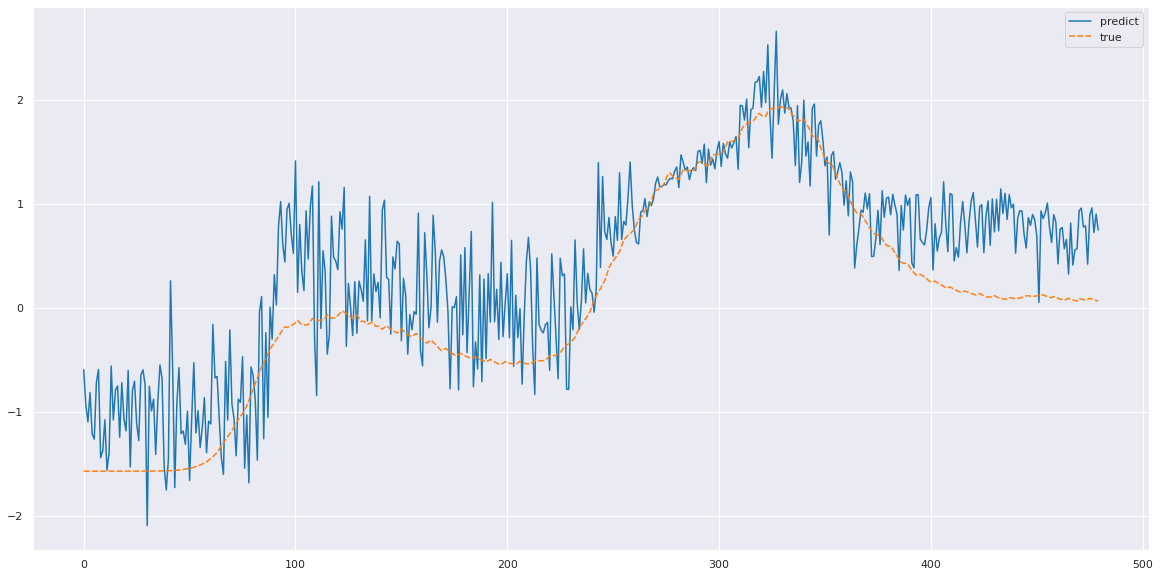

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,10))
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict      true  difference
0   -1.681918 -1.571131    0.110786
1   -0.452492 -1.571131    1.118640
2   -0.189027 -1.571131    1.382104
3   -0.802983 -1.571131    0.768148
4   -1.790787 -1.571131    0.219656
..        ...       ...         ...
475  0.698497  0.089605    0.608893
476  0.745837  0.082065    0.663772
477  0.420434  0.074845    0.345588
478  0.704061  0.068090    0.635971
479  0.748046  0.064753    0.683294

[480 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

          predict        true  difference
count  480.000000  480.000000  480.000000
mean     0.391358    0.047321    0.432769
std      0.928648    0.968636    0.320212
min     -2.218045   -1.571131    0.000014
25%     -0.291295   -0.483824    0.157867
50%      0.535646   -0.007741    0.393111
75%      1.010006    0.678256    0.667117
max      2.748734    1.929933    1.571852


In [ ]:
result = float((temp_plot['difference'].sum()))
print(result)
result = float((temp_plot['difference'].sum())/temp_plot['difference'].count())
print(result)

207.72917001508176
0.432769104198087


In [ ]:
temp_plot = pd.DataFrame()
for i in range(input_size):
  temp_plot[i] = pd.DataFrame(prediction)[:][0]
temp_plot_pred = temp_plot
#====================================================#
temp_plot = pd.DataFrame()
for i in range(input_size):
  temp_plot[i] = pd.DataFrame(true_label)[:][0]
temp_plot_truelabel = temp_plot
print(temp_plot_pred)
print(temp_plot_truelabel)

          0         1         2    ...       250       251       252
0   -1.681918 -1.681918 -1.681918  ... -1.681918 -1.681918 -1.681918
1   -0.452492 -0.452492 -0.452492  ... -0.452492 -0.452492 -0.452492
2   -0.189027 -0.189027 -0.189027  ... -0.189027 -0.189027 -0.189027
3   -0.802983 -0.802983 -0.802983  ... -0.802983 -0.802983 -0.802983
4   -1.790787 -1.790787 -1.790787  ... -1.790787 -1.790787 -1.790787
..        ...       ...       ...  ...       ...       ...       ...
475  0.698497  0.698497  0.698497  ...  0.698497  0.698497  0.698497
476  0.745837  0.745837  0.745837  ...  0.745837  0.745837  0.745837
477  0.420434  0.420434  0.420434  ...  0.420434  0.420434  0.420434
478  0.704061  0.704061  0.704061  ...  0.704061  0.704061  0.704061
479  0.748046  0.748046  0.748046  ...  0.748046  0.748046  0.748046

[480 rows x 253 columns]
          0         1         2    ...       250       251       252
0   -1.571131 -1.571131 -1.571131  ... -1.571131 -1.571131 -1.571131
1   -1.5

In [ ]:
inverse_scaled = scaler.inverse_transform(temp_plot_pred)
inverse_scaled_prediction = inverse_scaled.astype("int")[:,-1]
inverse_scaled = scaler.inverse_transform(temp_plot_truelabel)
inverse_scaled_truelabel = inverse_scaled.astype("int")[:,-1]

print(inverse_scaled_prediction)
print(inverse_scaled_truelabel)

temp_plot = pd.DataFrame()
temp_plot['predict'] = pd.DataFrame(inverse_scaled_prediction)[:][0]
temp_plot['true'] = pd.DataFrame(inverse_scaled_truelabel)[:][0]
temp_plot

[ -17661  178335  220337  122459  -35017  122632  -31340  132991   48550
  125767   34637  140256   94046  120016   66409  111245   86002  -20082
   83835    7939  140351  171005  -36529 -103132   70340  230680   87216
   80590  238036  105624  174227   70044  219976  112092   47770   45492
  116689   11506   12041  182118   66834   40302  184077   93204   81965
  -61389  107870  116983  253870   52786   80752   93313   92896   24308
  142050   51894  143740  104440  166820   99113  169353   27827  101560
  149040   -4580  135548   98128  198444  149998   81987   85811   94569
   46033  111863  148248   14890  104427  102396   -7671   82571   39586
   23490  127963  139850  112787  138139  186639   93240  180510   65605
  111060  272178  172012  324572  306328  309254  365299  295919  409106
  202625  331816  390746  303512  296313  267349  315899  316684  222279
  300098  289762  208622  200038  343415  367397  280383  313292  310172
  224851  423587  249252  357105  291303  319513  3

predict    true
0     -17661       0
1     178335       0
2     220337       0
3     122459       0
4     -35017       0
..       ...     ...
475   361828  264757
476   369375  263555
477   317499  262404
478   362715  261328
479   369728  260795

[480 rows x 2 columns]

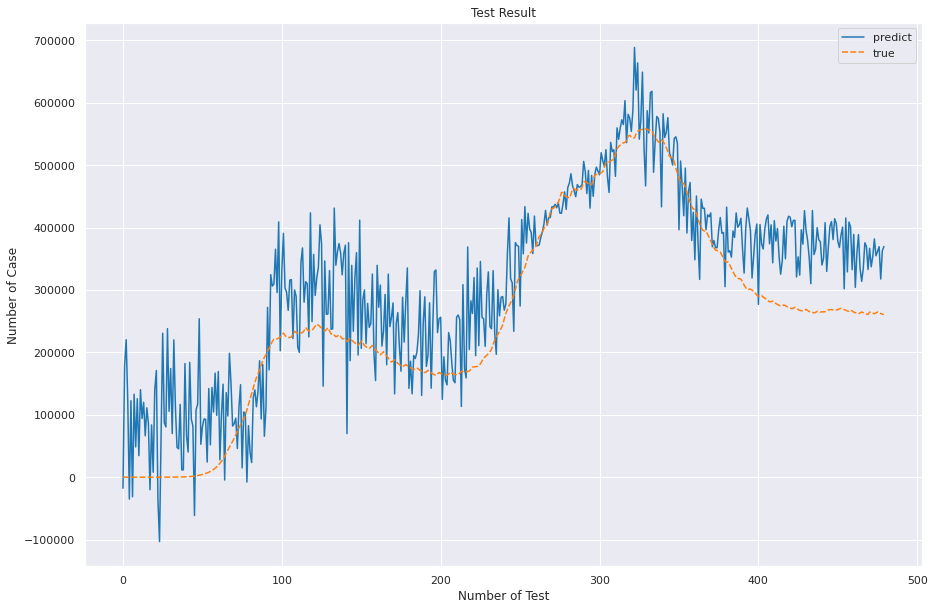

In [ ]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(15,10))
plt.title('Test Result')
plt.ylabel('Number of Case')
plt.xlabel('Number of Test')
sns.lineplot(data=temp_plot, palette="tab10")
plt.show()

In [ ]:
temp_plot['difference'] = abs(temp_plot['predict'] - temp_plot['true'])
temp_plot

predict    true  difference
0     -17661       0       17661
1     178335       0      178335
2     220337       0      220337
3     122459       0      122459
4     -35017       0       35017
..       ...     ...         ...
475   361828  264757       97071
476   369375  263555      105820
477   317499  262404       55095
478   362715  261328      101387
479   369728  260795      108933

[480 rows x 3 columns]

In [ ]:
print(temp_plot.describe())

             predict           true     difference
count     480.000000     480.000000     480.000000
mean   312863.687500  258016.543750   68992.885417
std    148046.993264  154422.014669   51048.821962
min   -103132.000000       0.000000       2.000000
25%    204033.500000  173340.000000   25168.000000
50%    335866.000000  249238.500000   62670.500000
75%    411490.000000  358601.250000  106353.000000
max    688681.000000  558146.000000  250588.000000


##Save model

In [ ]:
filename = 'single_lstm_datasets2(lr0.001_epoch1500)'
# filename = input()
path1 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_a.pkl'
path2 = '/content/drive/MyDrive/深度學習--上課/model_save/' + filename +'_b.pkl'
torch.save(lstm_model_3.state_dict(), path1)
torch.save(lstm_model_3, path2)

# Other

In [ ]:
import torch
import torch.utils.data as Data
import torch.nn as nn
from torch.autograd import Variable
import numpy as np

In [ ]:
class LSTMNetwork(nn.Module):
  """
  input_size = 3
  hidden_size = 64
  num_layers = 1
  num_class = 1
  """
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(LSTMNetwork, self).__init__()  #繼承
    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.num_class = num_class

    self.conv1 = nn.Conv1d(in_channels=1, out_channels=hidden_size, kernel_size=5, stride=1, padding=1)
    self.relu = nn.ReLU(inplace=True)
    self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    self.lstm = nn.LSTM(num_layer, hidden_size, num_layer, batch_first=True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    self.dropout = nn.Dropout(0.2)


  def forward(self, x):
    h0 = Variable(torch.zeros(num_layers, x.size(0), hidden_size)) #initial hidden layer#多少層，多少筆，最後變成的大小會跟hidden size一樣 #size(0)第0個維度的大小
    c0 = Variable(torch.zeros(num_layers, x.size(0), hidden_size)) #initial hidden layer#多少層，多少筆，最後變成的大小會跟hidden size一樣
    # out = self.normal(x)
    out = self.conv1(x)
    # print(out.shape)
    # out = self.relu(out)
    out, (h, c) = self.lstm(out, (h0, c0))
    out = self.dropout(out)
    out = self.fc(out)
    # out = self.sigmoid(out) [0, 1]
    return out

In [ ]:
class RNN(nn.Module):
  def __init__(self, input_size, hidden_size, num_layer, num_class):
    super(RNN, self).__init__()  #繼承
    self.hidden_size = hidden_size
    self.num_layers = num_layer
    self.normal = nn.BatchNorm1d(num_features=5, affine=True)
    self.lstm = nn.LSTM(input_size, hidden_size, num_layer, batch_first=True)
    self.fc = nn.Linear(in_features=hidden_size, out_features=num_class)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    h0 = Variable(torch.zeros(num_layers, x.size(0), hidden_size)) #initial hidden layer#多少層，多少筆，最後變成的大小會跟hidden size一樣 #size(0)第0個維度的大小
    c0 = Variable(torch.zeros(num_layers, x.size(0), hidden_size)) #initial hidden layer#多少層，多少筆，最後變成的大小會跟hidden size一樣
    print("X", x.shape)
    out = self.normal(x)
    out, (h, c) = self.lstm(out, (h0, c0))
    print("out", out.shape)
    out = self.fc(out)
    print("fc", out.shape)
    # out = self.sigmoid(out)
    return out

In [ ]:
def toTensor(x):
  return torch.tensor(x)

In [ ]:
class MyDataset(Data.Dataset):
  def __init__(self, dataframe, seq_length, train=True, transfrom=None):
    df = dataframe
    df_len = len(df)
    df_len = df_len - (df_len%seq_length) #每五個為一組，如果最後一組不足五個，就把他扣掉
    total_size = df_len//seq_length #how many sets we have
    train_size = int(total_size*0.7)

    f = df.iloc[:(train_size*seq_length), 1:4]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
    l = df.iloc[1:(train_size*seq_length)+1, 4:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
    data_size = train_size

    if train == False:
      f = df.iloc[(train_size*seq_length): df_len, 1:4]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
      l = df.iloc[(train_size*seq_length)+1: df_len+1, 4:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
      data_size = total_size - train_size
    print("total_size ", total_size)
    print("data_size ", data_size)
    print("train_size ", train_size)

    self.features = np.array(f).astype("float32").reshape(data_size, seq_length, 3)
    # self.labels = np.array(l).astype("int").reshape(data_size, seq_length, 1)
    self.labels = np.array(l).astype("float32").reshape(data_size, seq_length, 1)
    self.transfrom = transfrom

  def __len__(self):
    return len(self.labels)
    # return len(self.features)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    X = self.features[idx]
    Y = self.labels[idx]

    if self.transfrom:
      X = self.transfrom(X)
      Y = self.transfrom(Y)

    return X, Y
    # return X

In [ ]:
class MyDataset_2(Data.Dataset):
  def __init__(self, dataframe, train=True, transfrom=None):
    df = dataframe
    df_len = len(df)
    total_size = df_len
    train_size = int(total_size*0.7)

    f = df.iloc[:(train_size*1), 1:4]
    l = df.iloc[:(train_size*1), 4:]
    data_size = train_size

    if train == False:
      f = df.iloc[(train_size*1): df_len, 1:4]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
      l = df.iloc[(train_size*1): df_len, 4:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
      data_size = total_size - train_size
    print("total_size ", total_size)
    print("data_size ", data_size)
    print("train_size ", train_size)

    self.features = np.array(f).astype("float32").reshape(data_size, 1, 3)
    # self.labels = np.array(l).astype("int").reshape(data_size, seq_length, 1)
    self.labels = np.array(l).astype("float32").reshape(data_size, 1, 1)
    self.transfrom = transfrom

  def __len__(self):
    return len(self.labels)
    # return len(self.features)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    X = self.features[idx]
    Y = self.labels[idx]

    if self.transfrom:
      X = self.transfrom(X)
      Y = self.transfrom(Y)

    return X, Y
    # return X

In [ ]:
file_path = russia_datasets_overall_forDemo
train_dataset = MyDataset(dataframe=file_path, seq_length=5, train=True, transfrom=toTensor)
test_dataset = MyDataset(dataframe=file_path, seq_length=5, train=False, transfrom=toTensor)

total_size  96
data_size  67
train_size  67
total_size  96
data_size  29
train_size  67


In [ ]:
feature, label = train_dataset[2:9]
print("feature:", feature)
print("feature.shape: ", feature.shape)
print(label)
print(label.shape)

feature: tensor([[[ 2.,  0.,  0.],
         [ 2.,  0.,  0.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.]],

        [[ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.]],

        [[ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.]],

        [[ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.],
         [ 2.,  0.,  2.]],

        [[ 2.,  0.,  2.],
         [ 3.,  0.,  2.],
         [ 3.,  0.,  2.],
         [ 3.,  0.,  2.],
         [ 4.,  0.,  2.]],

        [[13.,  0.,  2.],
         [13.,  0.,  2.],
         [17.,  0.,  3.],
         [17.,  0.,  3.],
         [10.,  0.,  3.]],

        [[20.,  0.,  3.],
         [28.,  0.,  3.],
         [45.,  0.,  3.],
         [59.,  0.,  8.],
         [63.,  0.,  8.]]])
feature.shape:  torch.Size([7, 5, 3])
tensor([[[  0.],
         [  

In [ ]:
train_loader = Data.DataLoader(
                dataset= train_dataset,
                batch_size = 5,
                shuffle = False
                )

test_loader = Data.DataLoader(
                dataset= test_dataset,
                batch_size = 5,
                shuffle = False
                )

In [ ]:
for i,(seqs, labels) in enumerate(train_loader):
  print(seqs.shape)
  print(labels.shape)

seqs

torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([5, 5, 3])
torch.Size([5, 5, 1])
torch.Size([2, 5, 3])
torch.Size([2, 5, 1])


tensor([[[2850042.,   50723., 2273510.],
         [2878382.,   51274., 2297289.],
         [2905196.,   51810., 2321362.],
         [2934695.,   52434., 2347700.],
         [2963290.,   52985., 2374589.]],

        [[2992123.,   53539., 2402122.],
         [3019972.,   54080., 2426094.],
         [3047335.,   54559., 2446412.],
         [3073923.,   55107., 2470783.],
         [3100018.,   55692., 2499465.]]])

In [ ]:
input_size = 3
hidden_size = 64
num_layers = 1
num_class = 1

In [ ]:
rnn = LSTMNetwork(input_size, hidden_size, num_layers, num_class)
rnn

LSTMNetwork(
  (conv1): Conv1d(1, 64, kernel_size=(5,), stride=(1,), padding=(1,))
  (relu): ReLU(inplace=True)
  (normal): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(1, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

In [ ]:
rnn = RNN(input_size, hidden_size, num_layers, num_class)
rnn

RNN(
  (normal): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(3, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
output = rnn(seqs)
output

X torch.Size([2, 5, 3])
out torch.Size([2, 5, 64])
fc torch.Size([2, 5, 1])


tensor([[[-0.0101],
         [-0.0114],
         [-0.0132],
         [-0.0152],
         [-0.0169]],

        [[-0.0105],
         [-0.0121],
         [-0.0142],
         [-0.0164],
         [-0.0182]]], grad_fn=<AddBackward0>)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(rnn.parameters(), lr=0.001)

In [ ]:
import matplotlib.pyplot as plt

X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size([5, 5, 3])
out torch.Size([5, 5, 64])
fc torch.Size([5, 5, 1])
X torch.Size

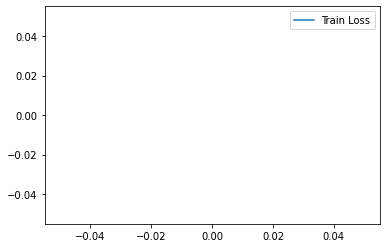

In [ ]:
train_loss =[]
for epoch in range(100):
  for i, (segs, labels) in enumerate(train_loader):
    # print(segs.shape)
    # print(labels.shape)
    segs = Variable(segs)
    labels = Variable(labels)
    # print(segs.shape)
    # print(labels.shape)
    optimizer.zero_grad()
    outputs = rnn(segs)
    loss = loss_fn(outputs, labels)
    # loss = loss_fn(outputs, labels.float()) #orignal label is int, we need turn it to float, beacuse BCEL only support float

    loss.backward()
    optimizer.step()

    if (epoch+1)%1000 == 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))

    if (epoch+1)%1000 == 0:
      train_loss.append(loss.data.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

In [ ]:
correct = 0
total = 0
for seqs, labels in test_loader:
  seqs = Variable(seqs)
  outputs = rnn(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs
  total += (labels.size(0)*labels.size(1)) #總共有多少筆
  print(pred)
  print(labels)
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))

tensor([[[64.3466],
         [81.8573],
         [84.5036],
         [84.8683],
         [84.9178]],

        [[64.4748],
         [81.8690],
         [84.5053],
         [84.8685],
         [84.9178]],

        [[64.5758],
         [81.8781],
         [84.5065],
         [84.8687],
         [84.9178]],

        [[64.6599],
         [81.8857],
         [84.5076],
         [84.8689],
         [84.9179]],

        [[64.7213],
         [81.8912],
         [84.5084],
         [84.8690],
         [84.9179]]], grad_fn=<AddBackward0>)
tensor([[[550384.],
         [554076.],
         [555621.],
         [556765.],
         [557484.]],

        [[556832.],
         [558147.],
         [557316.],
         [555650.],
         [556551.]],

        [[554350.],
         [548231.],
         [544484.],
         [540891.],
         [537095.]],

        [[536523.],
         [540350.],
         [538248.],
         [533666.],
         [528009.]],

        [[521649.],
         [514292.],
         [512345.]

In [ ]:
# from sklearn.model_selection import train_test_split

In [ ]:
# #dividing the dataset into train, test, cv with 0.6, 0.2, 0.2
# x, x_test= train_test_split(new_overall2,test_size=0.2,train_size=0.8)
# x_train, x_cv= train_test_split(x,test_size = 0.25,train_size =0.75)

In [ ]:
# num_train = int(len(new_overall2) * 0.8)
# num_test = len(new_overall2) - num_train
# print(num_train)
# print(num_test)

In [ ]:
# x = new_overall2[:num_train]
# x_test = new_overall2[num_train:]

In [ ]:
# class MyDataset(Data.Dataset):
#   def __init__(self, dataframe, seq_length, train=True, transfrom=None):
#     df = dataframe
#     df_len = len(df)
#     df_len = df_len - (df_len%seq_length) #每五個為一組，如果最後一組不足五個，就把他扣掉
#     total_size = df_len//seq_length #how many sets we have
#     train_size = int(total_size*0.7)

#     f = df.iloc[:(train_size*seq_length), 1:5]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
#     l = df.iloc[1:(train_size*seq_length)+1, 5:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
#     data_size = train_size

#     if train == False:
#       f = df.iloc[(train_size*seq_length): df_len, 1:5]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
#       l = df.iloc[(train_size*seq_length)+1: df_len+1, 5:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
#       data_size = total_size - train_size

#     self.features = np.array(f).astype("float32").reshape(data_size, seq_length, 4)
#     self.labels = np.array(l).astype("int").reshape(data_size, seq_length, 1)
#     # self.labels = np.array(l).astype("float32").reshape(data_size, seq_length, 1)
#     self.transfrom = transfrom

#   def __len__(self):
#     return len(self.labels)
#     # return len(self.features)

#   def __getitem__(self, idx):
#     if torch.is_tensor(idx):
#       idx = idx.tolist()

#     X = self.features[idx]
#     Y = self.labels[idx]

#     if self.transfrom:
#       X = self.transfrom(X)
#       Y = self.transfrom(Y)

#     return X, Y
#     # return X

In [ ]:
# file_path = new_overall2
# train_dataset = MyDataset(file_path, seq_length=5, train=True, transfrom=toTensor)
# test_dataset = MyDataset(file_path, seq_length=5, train=False, transfrom=toTensor)

In [ ]:
# feature = train_dataset[2:9]
# print("feature:", feature)
# print("feature.shape: ", feature.shape)

In [ ]:
# train_loader = Data.DataLoader(
#                 dataset= train_dataset,
#                 batch_size = 5,
#                 shuffle = True
#                 )

# test_loader = Data.DataLoader(
#                 dataset= test_dataset,
#                 batch_size = 5,
#                 shuffle = False
#                 )

In [ ]:
# for i,(seqs) in enumerate(train_loader):
#   print(seqs.shape)
# seqs

In [ ]:
# calculate_df = new_overall2
# calculate_df

In [ ]:
# today_cases = calculate_df['Confirmed']
# today_cases = today_cases.reset_index(drop=True)
# print(len(today_cases))
# today_cases

In [ ]:
# next_day_cases = new_overall2['Confirmed'][1:]
# next_day_cases = next_day_cases.reset_index(drop=True).rename("Next_Day_Confirmed")
# print(len(next_day_cases))
# next_day_cases

In [ ]:
# time_series_data = pd.DataFrame()

In [ ]:
# increase_cases = pd.concat([today_cases,next_day_cases],axis = 1)

In [ ]:
# increase_cases

In [ ]:
# increase_cases = increase_cases[:-1]
# increase_cases

In [ ]:
# new_overall_3 = pd.DataFrame()
# temp = new_overall2.reset_index(drop=True)
# new_overall_3 = pd.concat([temp, next_day_cases], axis=1)
# new_overall_3

In [ ]:
# new_overall_3 = new_overall_3[:-1]
# new_overall_3

In [ ]:
# new_overall_3

In [ ]:
class MyDataset(Data.Dataset):
  def __init__(self, dataframe, seq_length, train=True, transfrom=None):
    df = dataframe
    df_len = len(df)
    df_len = df_len - (df_len%seq_length) #每五個為一組，如果最後一組不足五個，就把他扣掉
    total_size = df_len//seq_length #how many sets we have
    train_size = int(total_size*0.7)

    f = df.iloc[:(train_size*seq_length), 1:5]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
    l = df.iloc[1:(train_size*seq_length)+1, 5:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
    data_size = train_size

    if train == False:
      f = df.iloc[(train_size*seq_length): df_len, 1:5]  #把Feature切出來{開盤、最高、最低、收盤、漲跌}
      l = df.iloc[(train_size*seq_length)+1: df_len+1, 5:] #把每一天的資料切出來{漲跌、從第一個到最後一個}
      data_size = total_size - train_size
    print("total_size ", total_size)
    print("data_size ", data_size)
    print("train_size ", train_size)

    self.features = np.array(f).astype("float32").reshape(data_size, seq_length, 4)
    # self.labels = np.array(l).astype("int").reshape(data_size, seq_length, 1)
    self.labels = np.array(l).astype("float32").reshape(data_size, seq_length, 1)
    self.transfrom = transfrom

  def __len__(self):
    return len(self.labels)
    # return len(self.features)

  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    X = self.features[idx]
    Y = self.labels[idx]

    if self.transfrom:
      X = self.transfrom(X)
      Y = self.transfrom(Y)

    return X, Y
    # return X

In [ ]:
# new_overall_3

In [ ]:
file_path = new_overall_3
train_dataset = MyDataset(file_path, seq_length=5, train=True, transfrom=toTensor)
test_dataset = MyDataset(file_path, seq_length=5, train=False, transfrom=toTensor)

total_size  96
data_size  67
train_size  67
total_size  96
data_size  29
train_size  67


In [ ]:
feature, label = train_dataset[2:9]
print("feature:", feature)
print("feature.shape: ", feature.shape)
print(label)
print(label.shape)

feature: tensor([[[ 2.,  0.,  0.,  2.],
         [ 2.,  0.,  0.,  2.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.]],

        [[ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.]],

        [[ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.]],

        [[ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.],
         [ 2.,  0.,  2.,  0.]],

        [[ 2.,  0.,  2.,  0.],
         [ 3.,  0.,  2.,  1.],
         [ 3.,  0.,  2.,  1.],
         [ 3.,  0.,  2.,  1.],
         [ 4.,  0.,  2.,  2.]],

        [[13.,  0.,  2., 11.],
         [13.,  0.,  2., 11.],
         [17.,  0.,  3., 14.],
         [17.,  0.,  3., 14.],
         [10.,  0.,  3.,  7.]],

        [[20.,  0.,  3., 17.],
         [28.,  0.

In [ ]:
train_loader = Data.DataLoader(
                dataset= train_dataset,
                batch_size = 5,
                shuffle = False
                )

test_loader = Data.DataLoader(
                dataset= test_dataset,
                batch_size = 5,
                shuffle = False
                )

In [ ]:
len(train_loader)

14

In [ ]:
for i,(seqs, labels) in enumerate(train_loader):
  print(seqs.shape)
  print(labels.shape)

seqs

torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([5, 5, 4])
torch.Size([5, 5, 1])
torch.Size([2, 5, 4])
torch.Size([2, 5, 1])


tensor([[[2850042.,   50723., 2273510.,  525809.],
         [2878382.,   51274., 2297289.,  529819.],
         [2905196.,   51810., 2321362.,  532024.],
         [2934695.,   52434., 2347700.,  534561.],
         [2963290.,   52985., 2374589.,  535716.]],

        [[2992123.,   53539., 2402122.,  536462.],
         [3019972.,   54080., 2426094.,  539798.],
         [3047335.,   54559., 2446412.,  546364.],
         [3073923.,   55107., 2470783.,  548033.],
         [3100018.,   55692., 2499465.,  544861.]]])

In [ ]:
input_size = 4
hidden_size = 32
num_layers = 1
num_class = 1

In [ ]:
rnn = RNN(input_size, hidden_size, num_layers, num_class)
rnn

RNN(
  (normal): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (lstm): LSTM(4, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
print(seqs.dtype)

torch.float32


In [ ]:
output = rnn(seqs)
output

tensor([[[0.0543],
         [0.0873],
         [0.0923],
         [0.0930],
         [0.0931]],

        [[0.0543],
         [0.0873],
         [0.0923],
         [0.0930],
         [0.0931]]], grad_fn=<AddBackward0>)

In [ ]:
import torch.optim as opt

In [ ]:
# loss_fn = nn.MSELoss(reduction='sum')
loss_fn = nn.MSELoss()
optimizer = opt.Adam(rnn.parameters(), lr=0.001)

In [ ]:
import matplotlib.pyplot as plt

Epoch:100, Batch:1, Loss:0.4763
Epoch:100, Batch:2, Loss:356.2477
Epoch:100, Batch:3, Loss:114749136.0000
Epoch:100, Batch:4, Loss:15433312256.0000
Epoch:100, Batch:5, Loss:121554550784.0000
Epoch:100, Batch:6, Loss:313372246016.0000
Epoch:100, Batch:7, Loss:536041160704.0000
Epoch:100, Batch:8, Loss:765116219392.0000
Epoch:100, Batch:9, Loss:996018946048.0000
Epoch:100, Batch:10, Loss:1315329802240.0000
Epoch:100, Batch:11, Loss:2095442952192.0000
Epoch:100, Batch:12, Loss:3695630090240.0000
Epoch:100, Batch:13, Loss:6525105995776.0000
Epoch:100, Batch:14, Loss:9193987768320.0000
Epoch:200, Batch:1, Loss:0.4189
Epoch:200, Batch:2, Loss:382.5992
Epoch:200, Batch:3, Loss:114966904.0000
Epoch:200, Batch:4, Loss:15436526592.0000
Epoch:200, Batch:5, Loss:121563881472.0000
Epoch:200, Batch:6, Loss:313402327040.0000
Epoch:200, Batch:7, Loss:536087166976.0000
Epoch:200, Batch:8, Loss:765171138560.0000
Epoch:200, Batch:9, Loss:996081664000.0000
Epoch:200, Batch:10, Loss:1315401891840.0000
Epoc

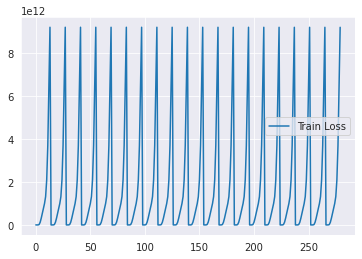

In [ ]:
train_loss =[]
for epoch in range(2000):
  for i, (segs, labels) in enumerate(train_loader):
    # print(segs.shape)
    # print(labels.shape)
    segs = Variable(segs)
    labels = Variable(labels)
    # print(segs.shape)
    # print(labels.shape)
    optimizer.zero_grad()
    outputs = rnn(segs)
    loss = loss_fn(outputs, labels)
    # loss = loss_fn(outputs, labels.float()) #orignal label is int, we need turn it to float, beacuse BCEL only support float

    loss.backward()
    optimizer.step()

    if (epoch+1)%100 == 0:
      print("Epoch:%d, Batch:%d, Loss:%.4f" %(epoch+1, i+1, loss.data))
      train_loss.append(loss.data.numpy())

plt.plot(train_loss, '-', label='Train Loss')
plt.legend()

In [ ]:
train_loss

[array(0.03273782, dtype=float32),
 array(766.4267, dtype=float32),
 array(1.2095714e+08, dtype=float32),
 array(1.5525137e+10, dtype=float32),
 array(1.21838535e+11, dtype=float32),
 array(3.1384476e+11, dtype=float32),
 array(5.366661e+11, dtype=float32),
 array(7.6586444e+11, dtype=float32),
 array(9.9688815e+11, dtype=float32),
 array(1.3163371e+12, dtype=float32),
 array(2.0966788e+12, dtype=float32),
 array(3.6972714e+12, dtype=float32),
 array(6.527287e+12, dtype=float32),
 array(9.196584e+12, dtype=float32),
 array(0.02637024, dtype=float32),
 array(767.06165, dtype=float32),
 array(1.2095331e+08, dtype=float32),
 array(1.5525081e+10, dtype=float32),
 array(1.2183836e+11, dtype=float32),
 array(3.1384447e+11, dtype=float32),
 array(5.366658e+11, dtype=float32),
 array(7.65864e+11, dtype=float32),
 array(9.9688776e+11, dtype=float32),
 array(1.3163367e+12, dtype=float32),
 array(2.096678e+12, dtype=float32),
 array(3.6972703e+12, dtype=float32),
 array(6.5272865e+12, dtype=float

In [ ]:
correct = 0
total = 0
for seqs, labels in test_loader:
  seqs = Variable(seqs)
  outputs = rnn(seqs)
  # pred = outputs.gt(0.5) #比0.5大 == True，反之False
  pred = outputs
  total += (labels.size(0)*labels.size(1)) #總共有多少筆
  print(pred)
  print(labels)
  # correct += (pred.int() == labels).sum() #pred.int()將True False轉成 1，0

  # m, pred = torch.max(outputs.data, 1) #輸出每一個output的結果，放1是因爲爲了告訴他我們的100
  # correct += (pred == labels.type(torch.cuda.LongTensor)).sum() #pred=[0,0,0,0,1,0,0,0,0],再把每個pred結果sum起來, sum=[23,13,24,12,12,10]
  # total += labels.size(0) #拿第一個維度的結果

print("Accuracy:%.3f %%" %(100.0 * float(correct) / float(total)))